In [13]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
import numpy as np
import seaborn as sns

In [3]:
#import dataset
CDC2018 = pd.read_csv("CSV2018.csv")

/Users/bee/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
#how many columns and rows
CDC2018.shape

(3801534, 238)

In [71]:
#first 10 rows
CDC2018.head(10)

,DOB_YY,DOB_MM,DOB_TT,DOB_WK,OCTERR,OCNTYFIPS,OCNTYPOP,BFACIL,F_FACILITY,BFACIL3,...,F_CA_CLEFTLP,F_CA_CLEFT,F_CA_DOWNS,F_CA_CHROM,F_CA_HYPOS,NO_CONGEN,ITRAN,ILIVE,BFED,F_BFED
0,2018,1,1227,2,NaN,NaN,NaN,1,1,1,...,1,1,1,1,1,1,N,Y,Y,1
1,2018,1,1704,2,NaN,NaN,NaN,1,1,1,...,1,1,1,1,1,1,N,Y,Y,1
2,2018,1,336,2,NaN,NaN,NaN,1,1,1,...,1,1,1,1,1,1,N,Y,Y,1
3,2018,1,938,2,NaN,NaN,NaN,1,1,1,...,1,1,1,1,1,1,N,Y,N,1
4,2018,1,830,3,NaN,NaN,NaN,1,1,1,...,1,1,1,1,1,1,N,Y,Y,1
5,2018,1,28,2,NaN,NaN,NaN,2,1,2,...,1,1,1,1,1,1,N,Y,Y,1
6,2018,1,341,3,NaN,NaN,NaN,1,1,1,...,1,1,1,1,1,1,N,Y,Y,1
7,2018,1,1615,4,NaN,NaN,NaN,1,1,1,...,1,1,1,1,1,1,N,Y,Y,1
8,2018,1,1754,5,NaN,NaN,NaN,1,1,1,...,1,1,1,1,1,1,N,Y,Y,1
9,2018,1,1111,6,NaN,NaN,NaN,1,1,1,...,1,1,1,1,1,1,N,Y,Y,1


In [5]:
#Only use the useful columns
CDC2018s = CDC2018[['DOB_YY','DOB_MM','DOB_TT','DOB_WK','BFACIL3','MAGER9','RESTATUS','MRACEHISP','MAR_P','DMAR','MEDUC','FAGEREC11','FRACEHISP','FEDUC','PRIORLIVE','PRIORDEAD','PRIORTERM','LBO_REC','TBO_REC','ILLB_R11','PRECARE','PREVIS','WIC','CIG0_R','CIG1_R','CIG2_R','CIG3_R','BMI_R','WTGAIN_REC','RF_PDIAB','RF_GDIAB','RF_PHYPE','RF_GHYPE','RF_EHYPE','RF_PPTERM','RF_INFTR','RF_FEDRG','RF_ARTEC','RF_CESAR','RF_CESARN','IP_GON','IP_SYPH','IP_CHLAM','IP_HEPB','IP_HEPC','OB_ECVS','LD_INDL','LD_AUGM','LD_STER','LD_ANTB','LD_CHOR','LD_ANES','ME_PRES','ME_ROUT','ME_TRIAL','MM_MTR','MM_PLAC','MM_RUPT','MM_UHYST','MM_AICU','ATTEND','MTRAN','PAY_REC','APGAR5','APGAR10','DPLURAL','SEX','GESTREC10','BWTR12','AB_AVEN1','AB_AVEN6','AB_NICU','AB_SURF','AB_ANTI','AB_SEIZ','CA_ANEN','CA_MNSB','CA_CCHD','CA_CDH','CA_OMPH','CA_GAST','CA_LIMB','CA_CLEFT','CA_CLPAL','CA_DOWN','CA_DISOR','CA_HYPO','ITRAN','ILIVE','BFED']]

In [8]:
#any missing
CDC2018s.columns[CDC2018s.isna().any()].tolist()

['MAR_P', 'DMAR']

In [56]:
#types of columns
CDC2018s.dtypes

DOB_YY          int64
DOB_MM          int64
DOB_TT          int64
DOB_WK          int64
BFACIL3         int64
MAGER9          int64
RESTATUS        int64
MRACEHISP       int64
MAR_P          object
DMAR          float64
MEDUC           int64
FAGEREC11       int64
FRACEHISP       int64
FEDUC           int64
PRIORLIVE       int64
PRIORDEAD       int64
PRIORTERM       int64
LBO_REC         int64
TBO_REC         int64
ILLB_R11        int64
PRECARE         int64
PREVIS          int64
WIC            object
CIG0_R          int64
CIG1_R          int64
CIG2_R          int64
CIG3_R          int64
BMI_R           int64
WTGAIN_REC      int64
RF_PDIAB       object
               ...   
ATTEND          int64
MTRAN          object
PAY_REC         int64
APGAR5          int64
APGAR10         int64
DPLURAL         int64
SEX            object
GESTREC10       int64
BWTR12          int64
AB_AVEN1       object
AB_AVEN6       object
AB_NICU        object
AB_SURF        object
AB_ANTI        object
AB_SEIZ   

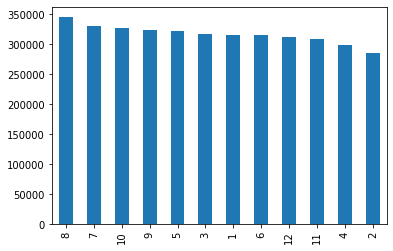

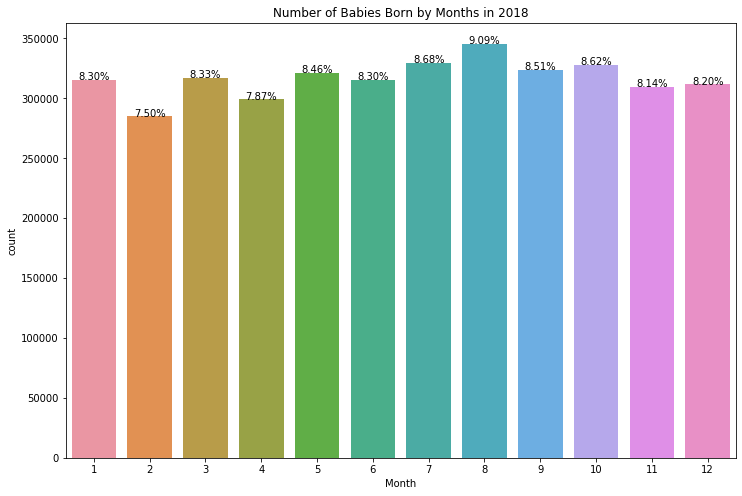

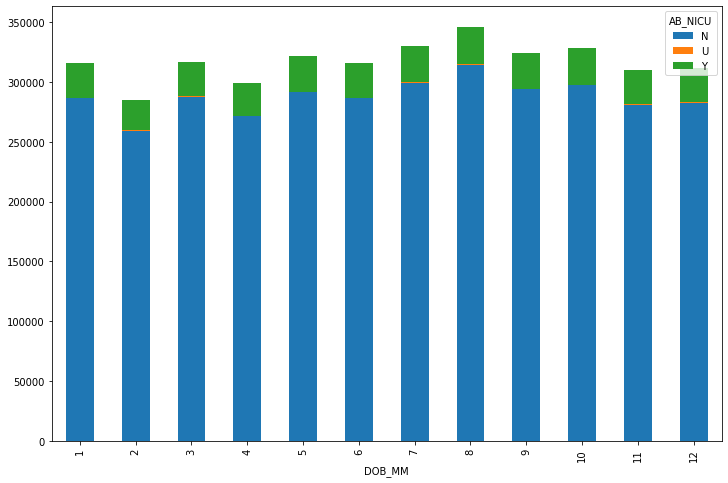

In [109]:
#plots - by months
CDC2018s['DOB_MM'].value_counts().plot(kind='bar')
plt.figure(figsize=(12,8))
ax = sns.countplot(x='DOB_MM', data=CDC2018s, order=[1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("Number of Babies Born by Months in 2018")
plt.xlabel('Month')

total = float(len(CDC2018s))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

DOB_MM_NICU = pd.crosstab(index=CDC2018s['DOB_MM'],columns=CDC2018s['AB_NICU'])
DOB_MM_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

(0, 2359)

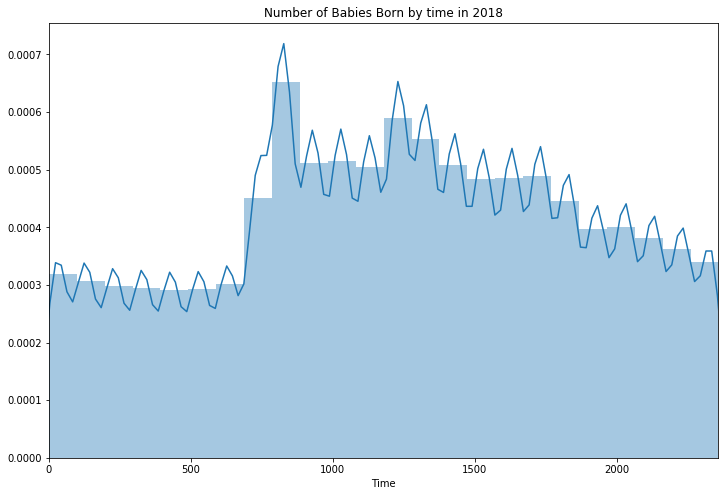

In [37]:
#plots - by time
filtertime = CDC2018s.DOB_TT[(CDC2018s.DOB_TT >= 0) & (CDC2018s.DOB_TT < 2400)]
plt.figure(figsize=(12,8))
ax = sns.distplot(filtertime, bins=24)
plt.title("Number of Babies Born by time in 2018")
plt.xlabel('Time')
plt.xlim(0,2359)

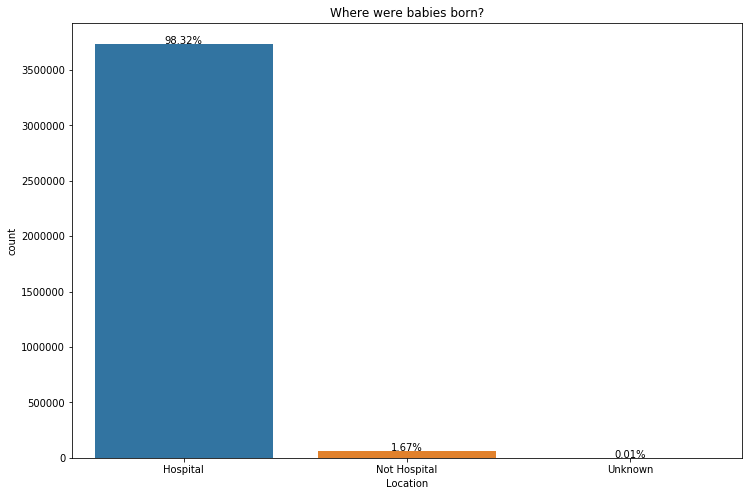

Text(0.5, 0, 'Location')

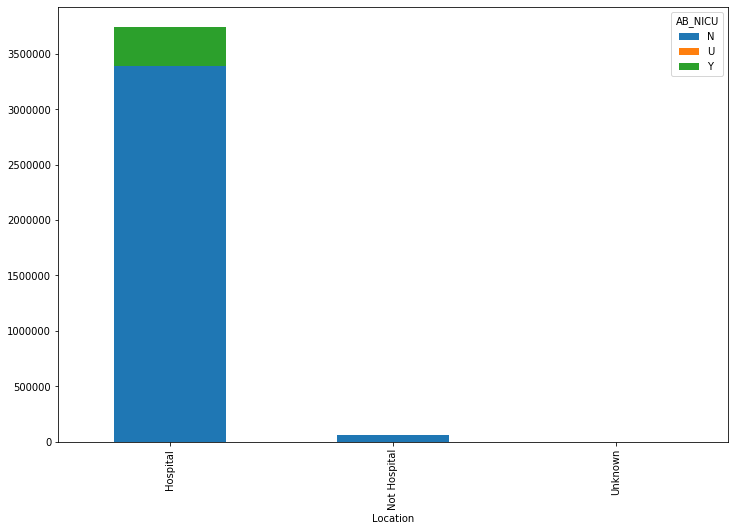

In [110]:
#BFACIL3 -> where were babies born? (hospital, not hospital, unknown)
plt.figure(figsize=(12,8))
ax = sns.countplot(x='BFACIL3', data=CDC2018s)
plt.title("Where were babies born?")
plt.xlabel('Location')

label_text = ['Hospital','Not Hospital','Unknown']
ax.set_xticklabels(label_text, fontsize=10)

total = float(len(CDC2018s))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

BFACIL3_NICU = pd.crosstab(index=CDC2018s['BFACIL3'],columns=CDC2018s['AB_NICU'])
BFACIL3_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)
label_text = ['Hospital','Not Hospital','Unknown']
plt.xlabel('Location')

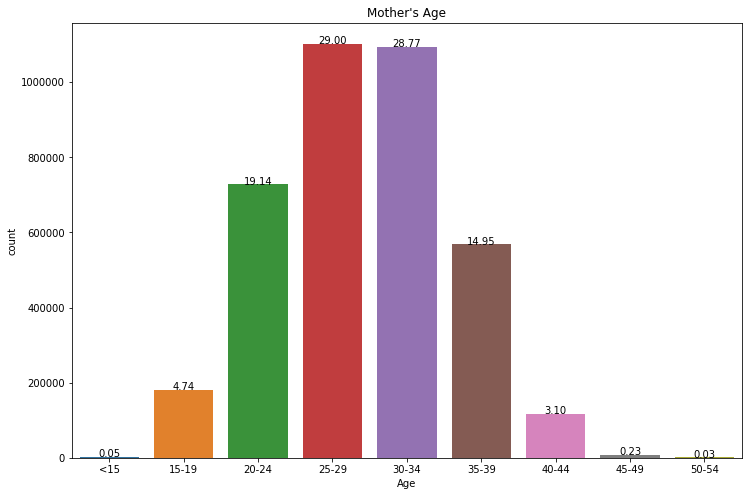

Text(0.5, 0, 'Age')

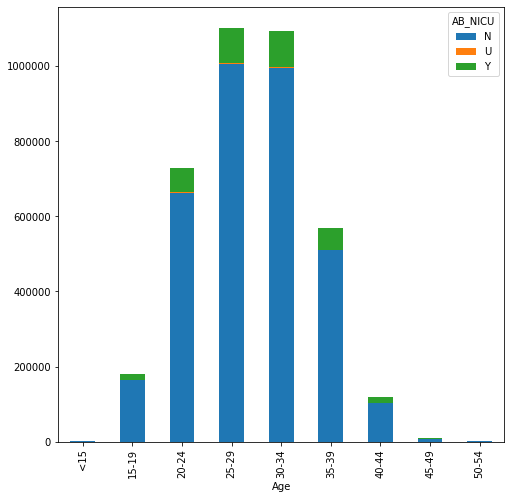

In [106]:
#Mother's age 
plt.figure(figsize=(12,8))
ax = sns.countplot(x='MAGER9', data=CDC2018s)
plt.title("Mother's Age")
plt.xlabel('Age')

label_text = ['<15','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54']
ax.set_xticklabels(label_text, fontsize=10)

total = float(len(CDC2018s))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total*100),
            ha="center") 
show()

label_text = ['<15','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54']
MAGER9_NICU = pd.crosstab(index=CDC2018s['MAGER9'],columns=CDC2018s['AB_NICU'])
MAGER9_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)
plt.xlabel('Age')

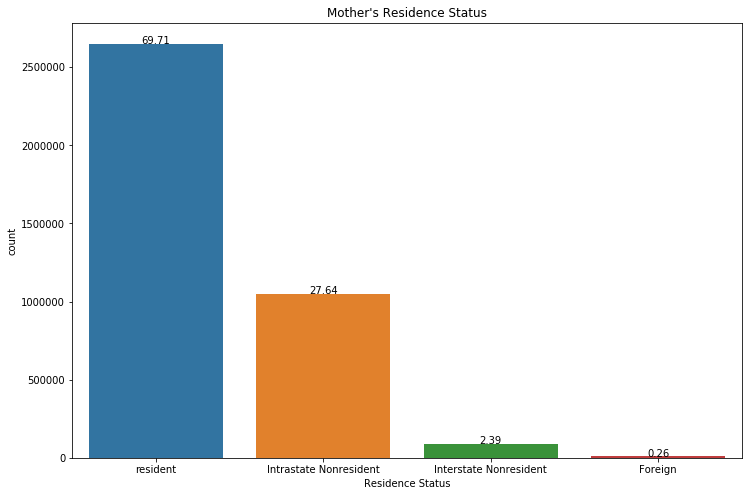

Text(0.5, 0, 'Residence Status')

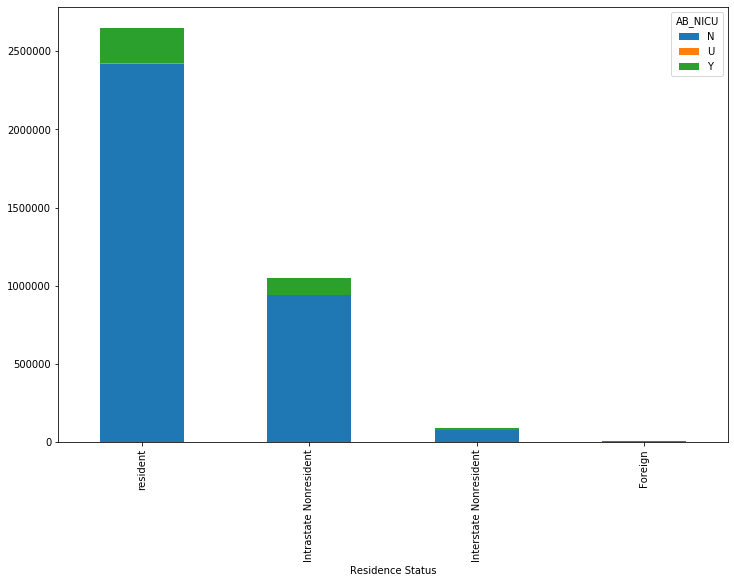

In [111]:
#Residence status 
plt.figure(figsize=(12,8))
ax = sns.countplot(x='RESTATUS', data=CDC2018s)
plt.title("Mother's Residence Status")
plt.xlabel('Residence Status')

label_text = ['resident','Intrastate Nonresident','Interstate Nonresident','Foreign']
ax.set_xticklabels(label_text, fontsize=10)

total = float(len(CDC2018s))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total*100),
            ha="center") 
show()

label_text = ['resident','Intrastate Nonresident','Interstate Nonresident','Foreign']
RESTATUS_NICU = pd.crosstab(index=CDC2018s['RESTATUS'],columns=CDC2018s['AB_NICU'])
RESTATUS_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)
plt.xlabel('Residence Status')

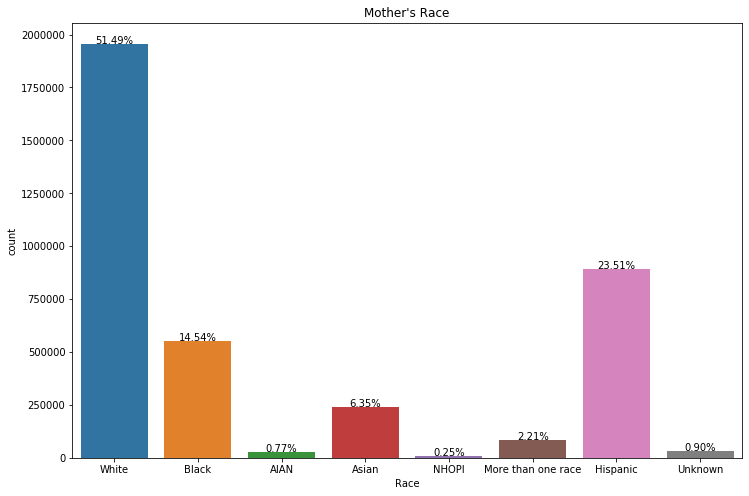

Text(0.5, 0, 'Race')

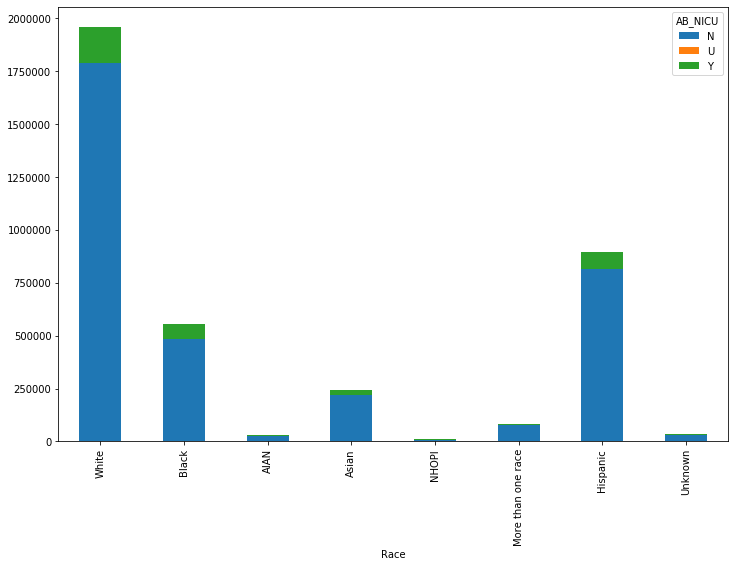

In [113]:
#Mother's race
plt.figure(figsize=(12,8))
ax = sns.countplot(x='MRACEHISP', data=CDC2018s)
plt.title("Mother's Race")
plt.xlabel('Race')

label_text = ['White','Black','AIAN','Asian','NHOPI','More than one race','Hispanic','Unknown']
ax.set_xticklabels(label_text, fontsize=10)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

label_text = ['White','Black','AIAN','Asian','NHOPI','More than one race','Hispanic','Unknown']
MRACEHISP_NICU = pd.crosstab(index=CDC2018s['MRACEHISP'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)
plt.xlabel('Race')

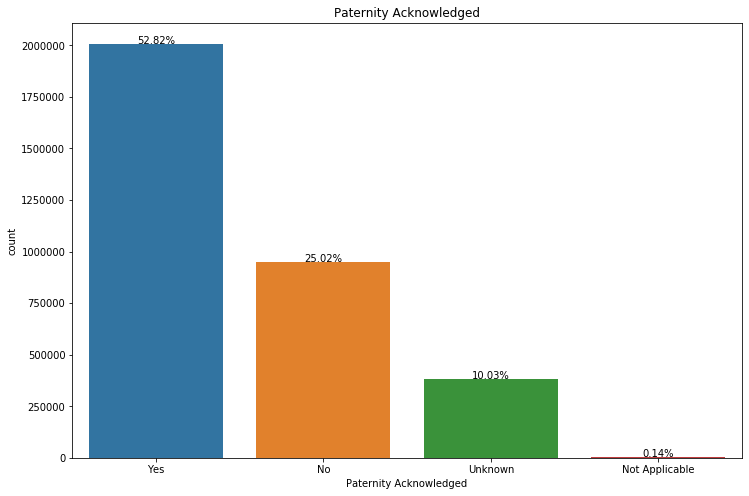

Text(0.5, 0, 'Paternity Acknowledged')

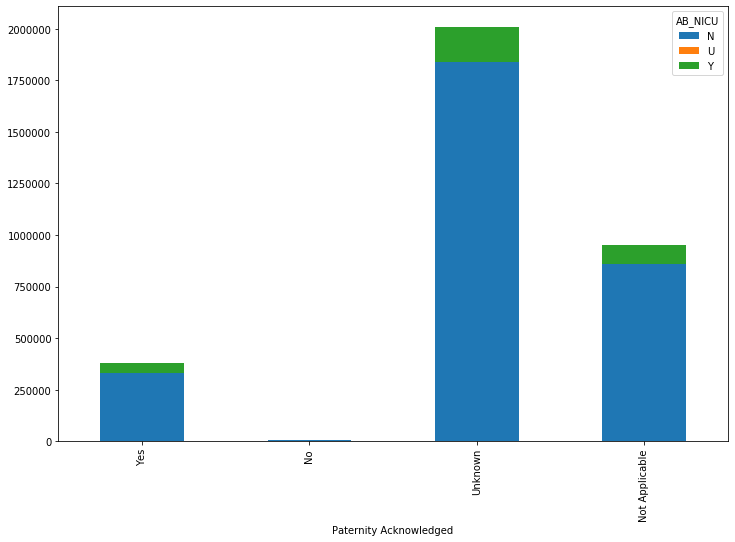

In [114]:
#Paternity acknowledged
plt.figure(figsize=(12,8))
ax = sns.countplot(x='MAR_P', data=CDC2018s)
plt.title("Paternity Acknowledged")

label_text = ['Yes','No','Unknown','Not Applicable']
ax.set_xticklabels(label_text, fontsize=10)
plt.xlabel('Paternity Acknowledged')

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['MAR_P'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)
plt.xlabel('Paternity Acknowledged')

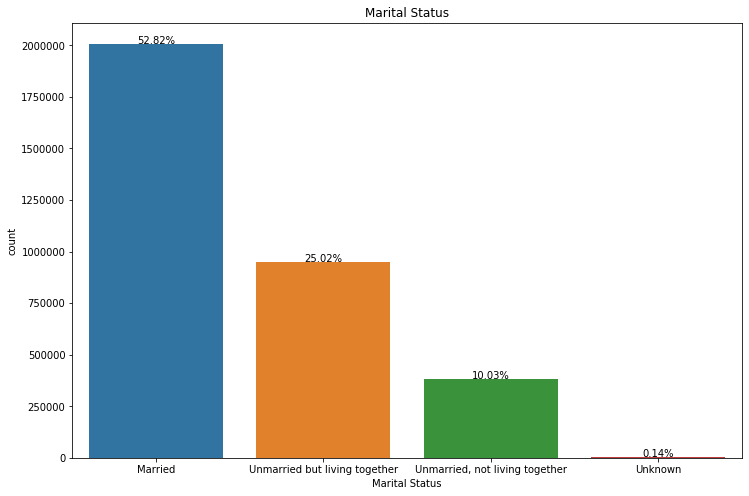

Text(0.5, 0, 'Marital Status')

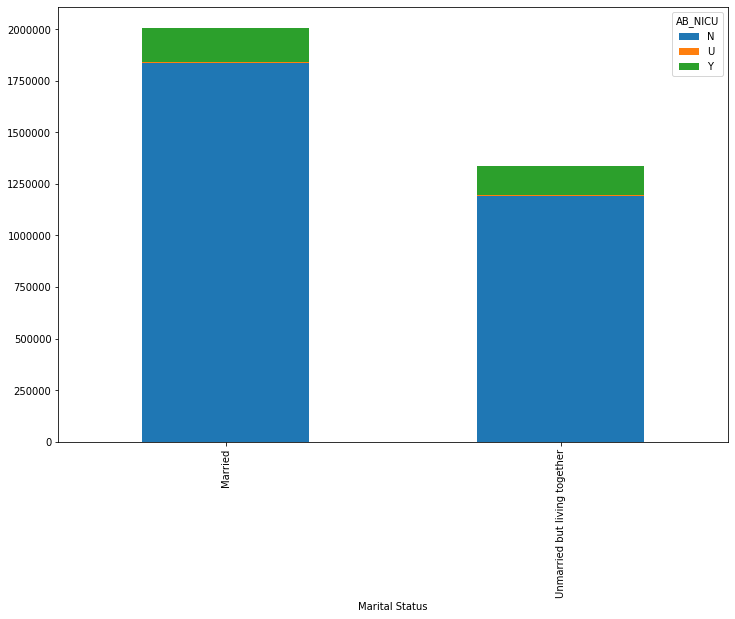

In [115]:
#Marital Status
plt.figure(figsize=(12,8))
ax = sns.countplot(x='MAR_P', data=CDC2018s)
plt.title("Marital Status")

label_text = ['Married','Unmarried but living together','Unmarried, not living together','Unknown']
ax.set_xticklabels(label_text, fontsize=10)
plt.xlabel('Marital Status')

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['DMAR'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)
plt.xlabel('Marital Status')

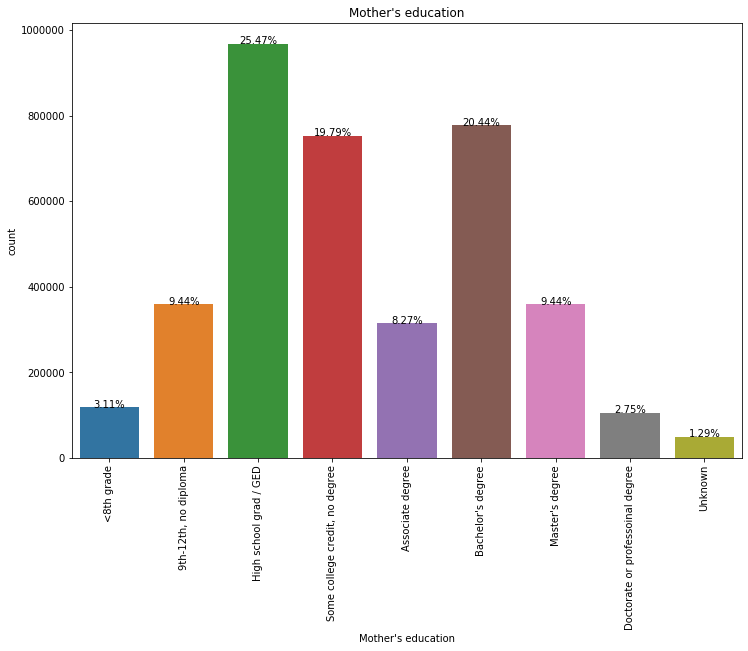

Text(0.5, 0, "Mother's education")

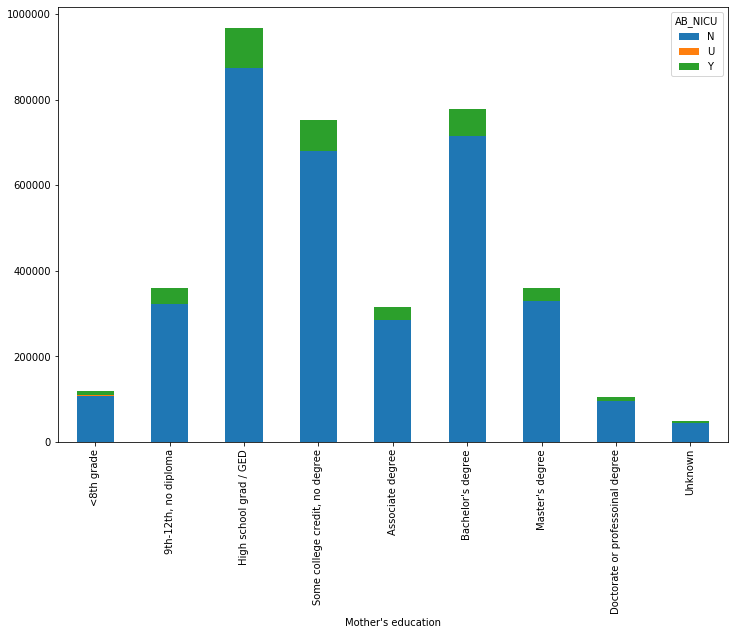

In [118]:
#Mother's education
plt.figure(figsize=(12,8))
ax = sns.countplot(x='MEDUC', data=CDC2018s)
plt.title("Mother's education")

label_text = ['<8th grade','9th-12th, no diploma','High school grad / GED','Some college credit, no degree','Associate degree','Bachelor\'s degree', 'Master\'s degree', 'Doctorate or professoinal degree','Unknown']
ax.set_xticklabels(label_text, fontsize=10)
plt.xticks(rotation=90)
plt.xlabel('Mother\'s education')

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['MEDUC'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)
plt.xlabel('Mother\'s education')

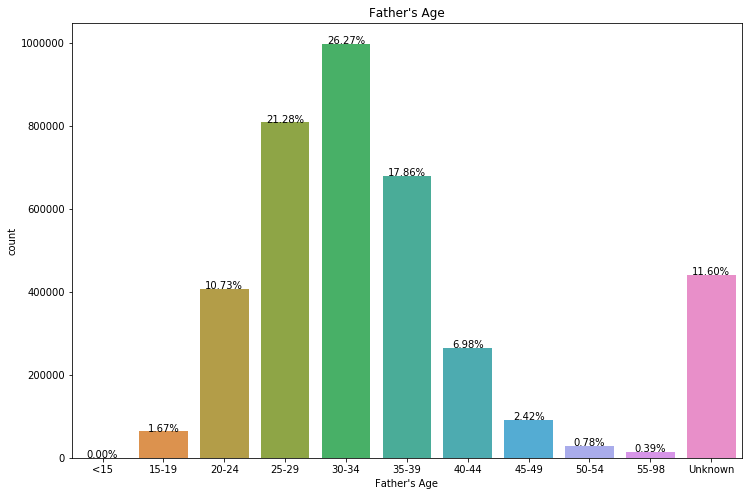

Text(0.5, 0, "Father's Age")

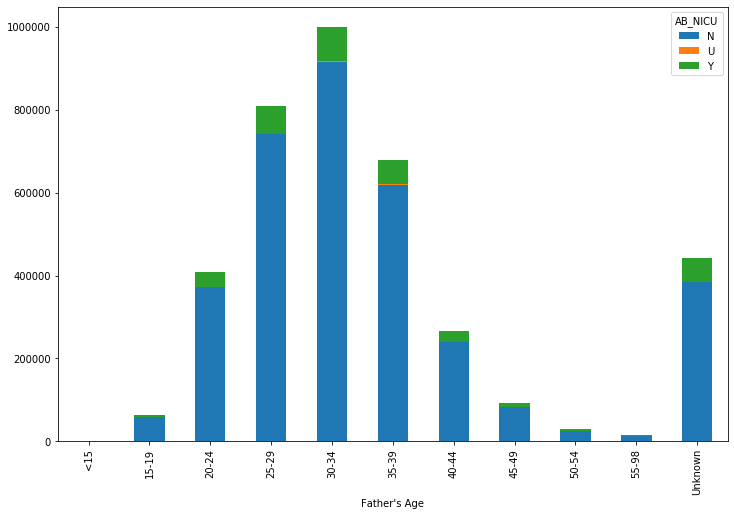

In [119]:
#Father's Age
plt.figure(figsize=(12,8))
ax = sns.countplot(x='FAGEREC11', data=CDC2018s)
plt.title("Father's Age")

label_text = ['<15','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-98','Unknown']
ax.set_xticklabels(label_text, fontsize=10)
plt.xlabel('Father\'s Age')

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['FAGEREC11'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)
plt.xlabel('Father\'s Age')

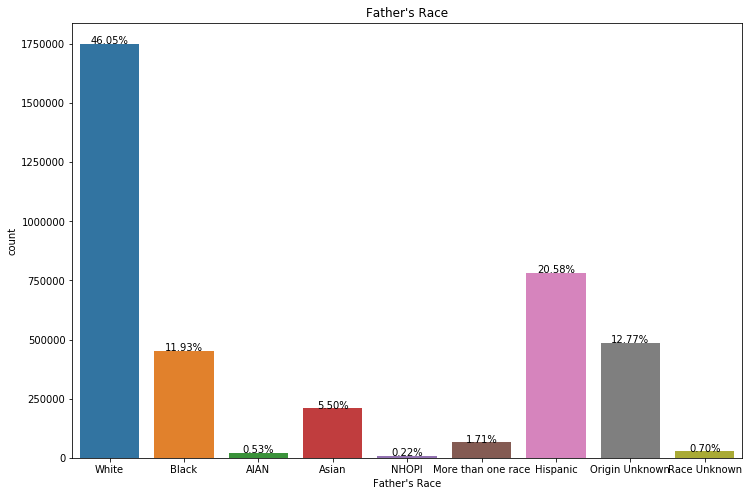

Text(0.5, 0, "Father's Race")

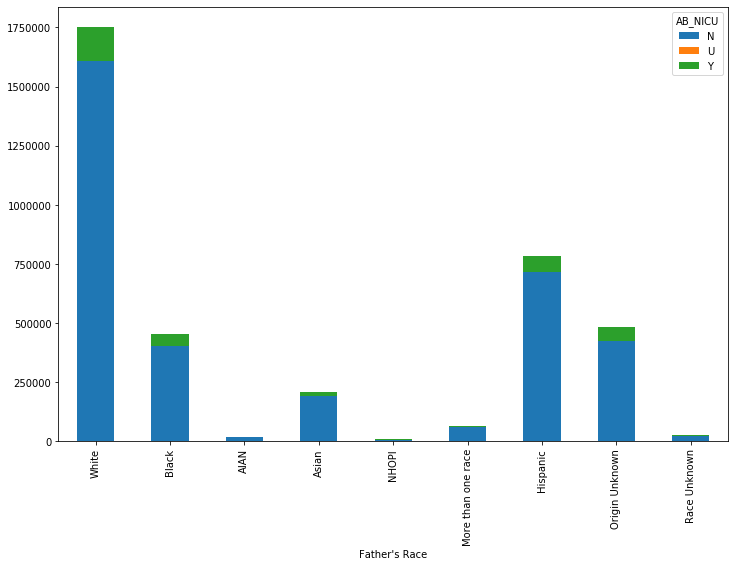

In [120]:
#Father's Race
plt.figure(figsize=(12,8))
ax = sns.countplot(x='FRACEHISP', data=CDC2018s)
plt.title("Father's Race")

label_text = ['White','Black','AIAN','Asian','NHOPI','More than one race','Hispanic','Origin Unknown','Race Unknown']
ax.set_xticklabels(label_text, fontsize=10)
plt.xlabel('Father\'s Race')

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['FRACEHISP'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)
plt.xlabel('Father\'s Race')

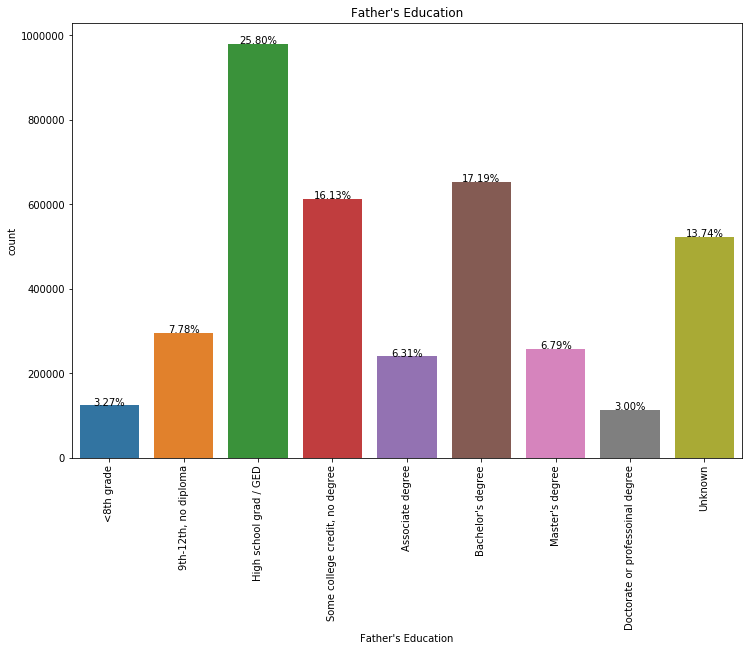

Text(0.5, 0, "Father's Education")

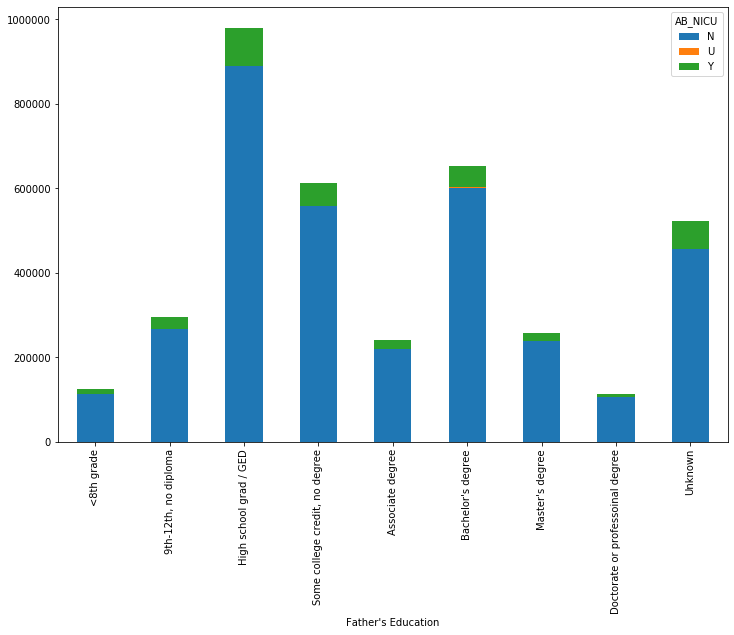

In [121]:
#Father's Education
plt.figure(figsize=(12,8))
ax = sns.countplot(x='FEDUC', data=CDC2018s)
plt.title("Father's Education")

label_text = ['<8th grade','9th-12th, no diploma','High school grad / GED','Some college credit, no degree','Associate degree','Bachelor\'s degree', 'Master\'s degree', 'Doctorate or professoinal degree','Unknown']
ax.set_xticklabels(label_text, fontsize=10)
plt.xticks(rotation=90)
plt.xlabel('Father\'s Education')

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['FEDUC'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)
plt.xlabel('Father\'s Education')

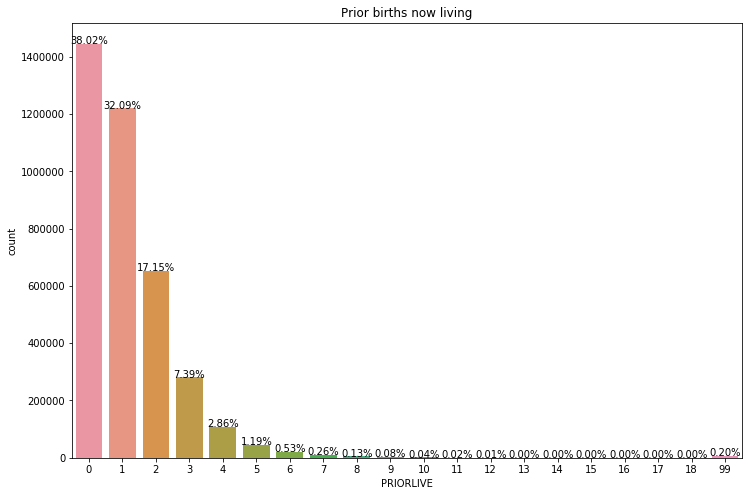

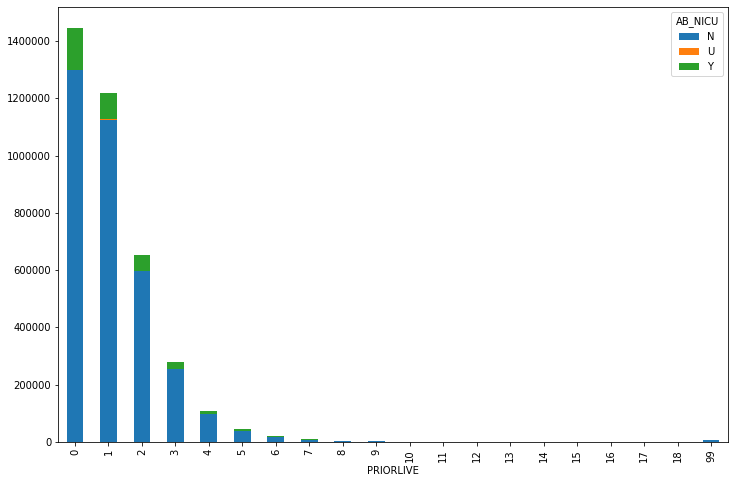

In [125]:
#Prior births now living
plt.figure(figsize=(12,8))
ax = sns.countplot(x='PRIORLIVE', data=CDC2018s)
plt.title("Prior births now living")

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['PRIORLIVE'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

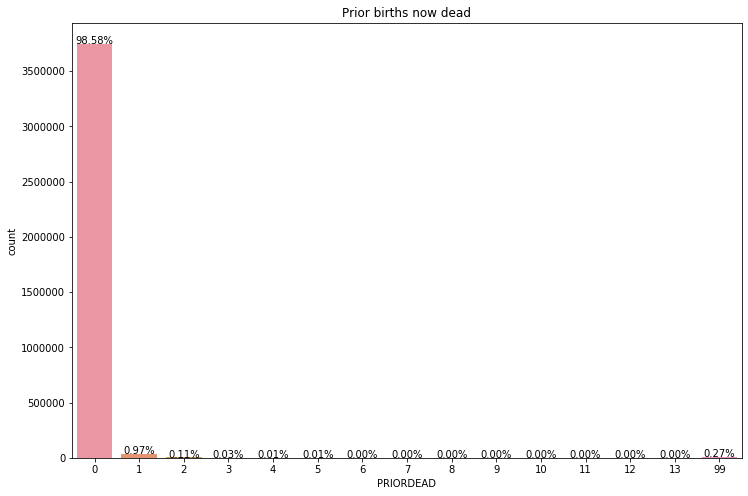

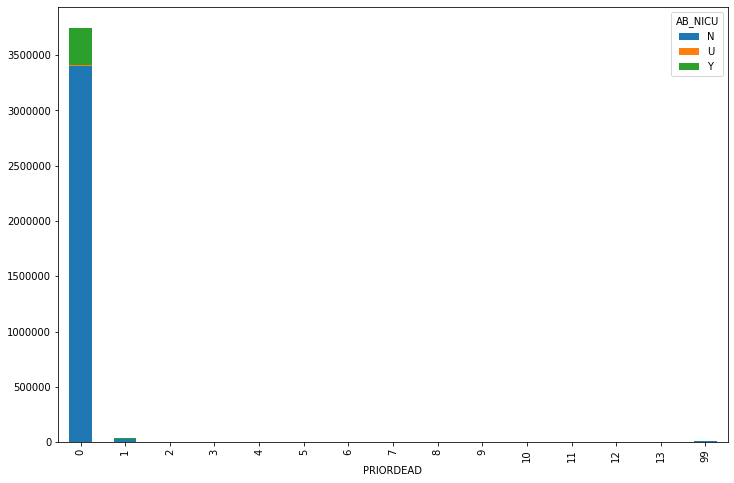

In [127]:
#Prior births now dead
plt.figure(figsize=(12,8))
ax = sns.countplot(x='PRIORDEAD', data=CDC2018s)
plt.title("Prior births now dead")

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['PRIORDEAD'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

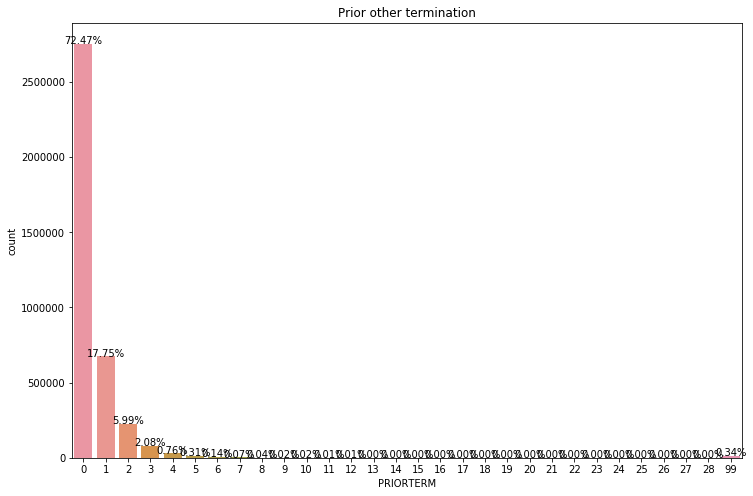

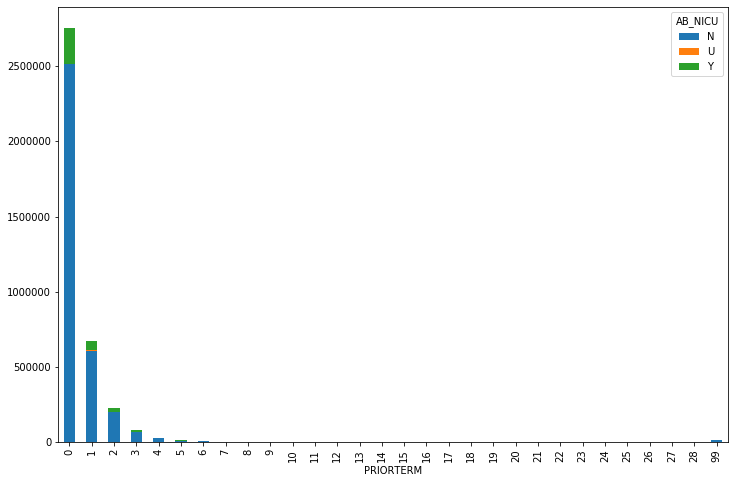

In [128]:
#Prior other termination
plt.figure(figsize=(12,8))
ax = sns.countplot(x='PRIORTERM', data=CDC2018s)
plt.title("Prior other termination")

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['PRIORTERM'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

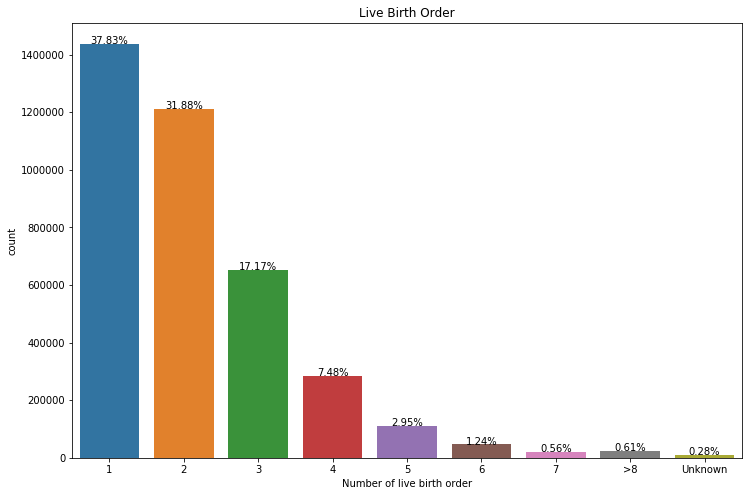

Text(0.5, 0, 'Number of live birth order')

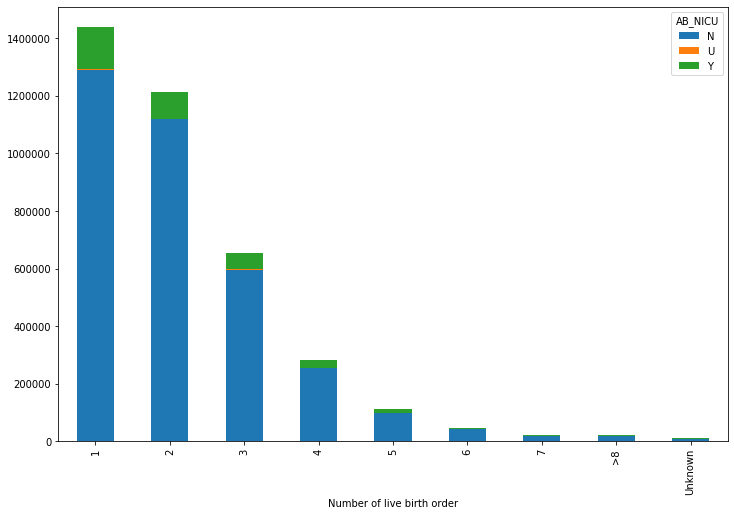

In [129]:
#Live birth order
plt.figure(figsize=(12,8))
ax = sns.countplot(x='LBO_REC', data=CDC2018s)
plt.title("Live Birth Order")

label_text = ['1','2','3','4','5','6','7','>8','Unknown']
ax.set_xticklabels(label_text, fontsize=10)
plt.xlabel('Number of live birth order')

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['LBO_REC'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)
plt.xlabel('Number of live birth order')

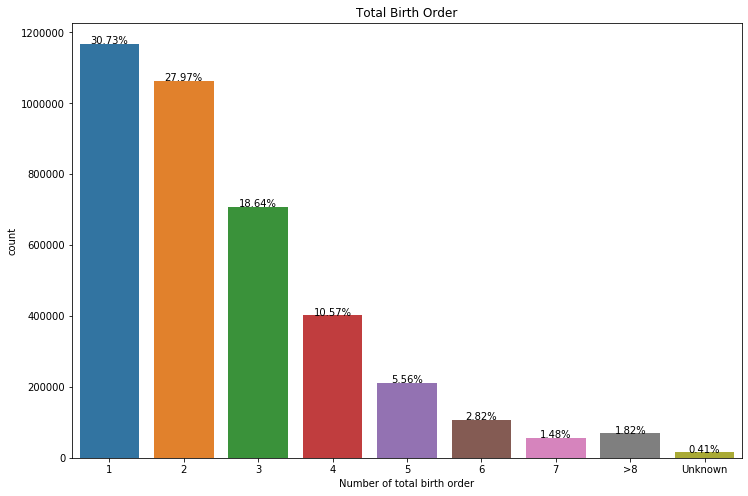

Text(0.5, 0, 'Number of total birth order')

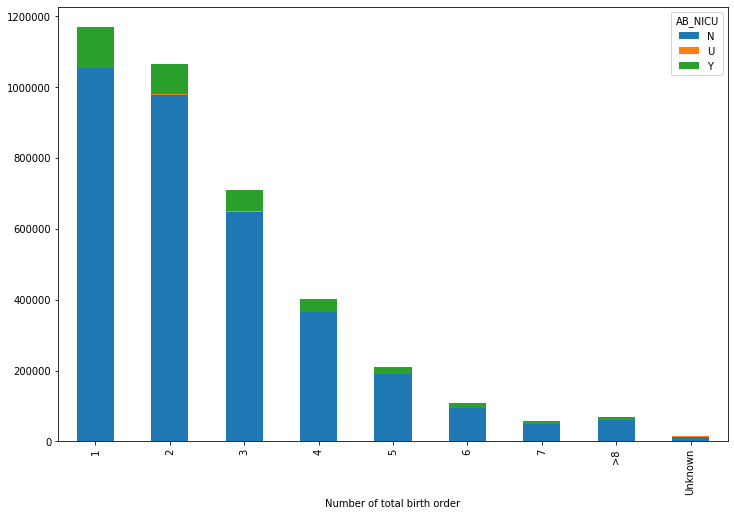

In [130]:
#Total birth order
plt.figure(figsize=(12,8))
ax = sns.countplot(x='TBO_REC', data=CDC2018s)
plt.title("Total Birth Order")

label_text = ['1','2','3','4','5','6','7','>8','Unknown']
ax.set_xticklabels(label_text, fontsize=10)
plt.xlabel('Number of total birth order')

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['TBO_REC'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)
plt.xlabel('Number of total birth order')

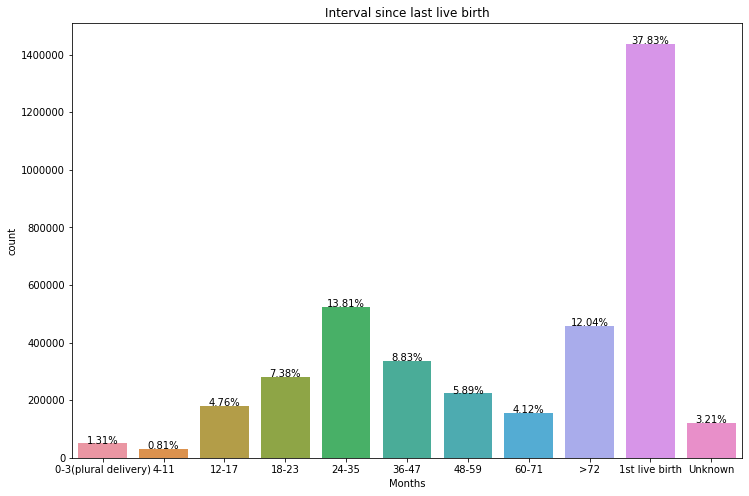

Text(0.5, 0, 'Months')

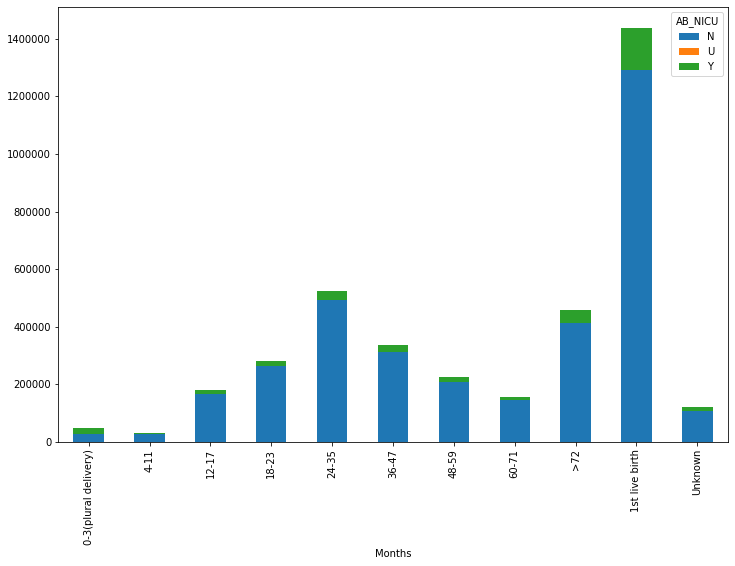

In [132]:
#Interval since last live birth
plt.figure(figsize=(12,8))
ax = sns.countplot(x='ILLB_R11', data=CDC2018s)
plt.title("Interval since last live birth")

label_text = ['0-3(plural delivery)','4-11','12-17','18-23','24-35','36-47','48-59','60-71','>72','1st live birth','Unknown']
ax.set_xticklabels(label_text, fontsize=10)
plt.xlabel('Months')

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['ILLB_R11'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)
plt.xlabel('Months')

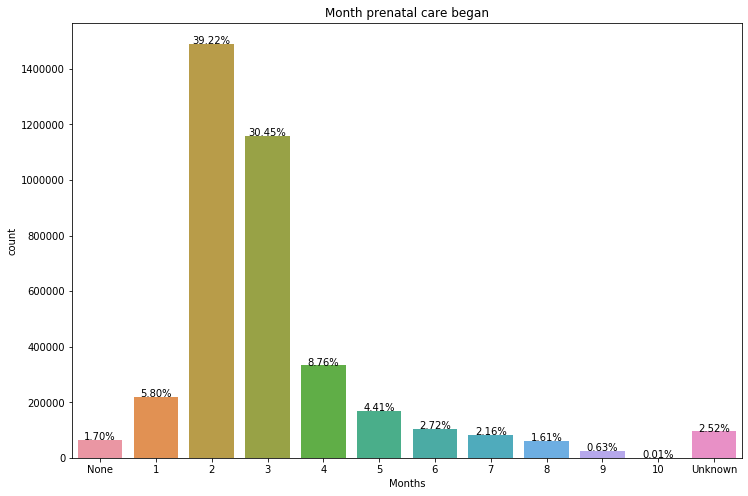

Text(0.5, 0, 'Months')

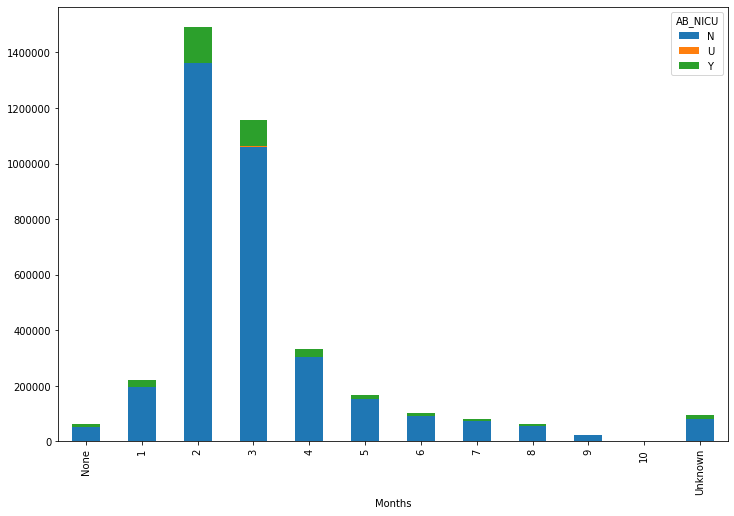

In [133]:
#Month prenatal care began
plt.figure(figsize=(12,8))
ax = sns.countplot(x='PRECARE', data=CDC2018s)
plt.title("Month prenatal care began")

label_text = ['None','1','2','3','4','5','6','7','8','9','10','Unknown']
ax.set_xticklabels(label_text, fontsize=10)
plt.xlabel('Months')

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['PRECARE'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)
plt.xlabel('Months')

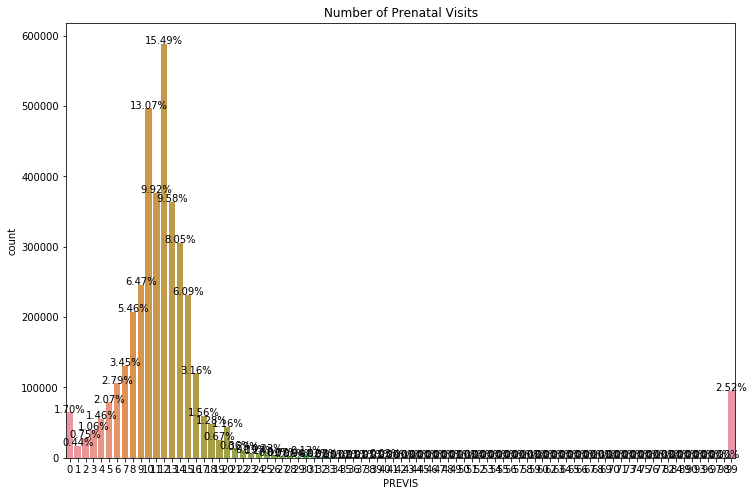

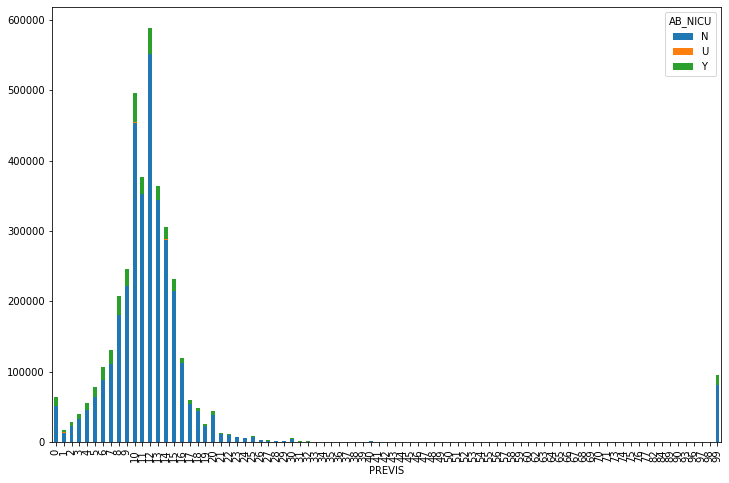

In [134]:
#Number of Prenatal Visits
plt.figure(figsize=(12,8))
ax = sns.countplot(x='PREVIS', data=CDC2018s)
plt.title("Number of Prenatal Visits")

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['PREVIS'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

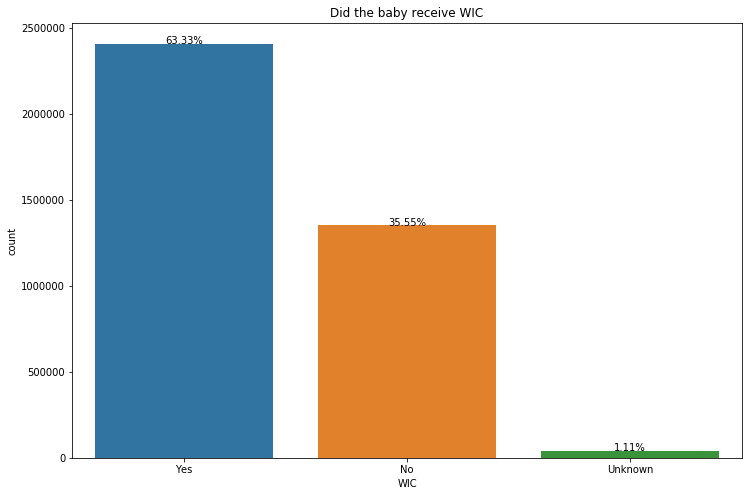

Text(0.5, 0, 'WIC')

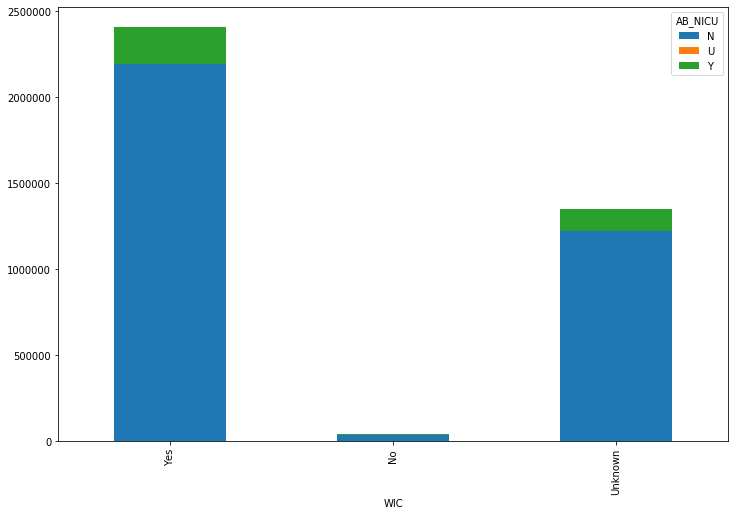

In [135]:
#WIC
plt.figure(figsize=(12,8))
ax = sns.countplot(x='WIC', data=CDC2018s)
plt.title("Did the baby receive WIC")

label_text = ['Yes','No','Unknown']
ax.set_xticklabels(label_text, fontsize=10)
plt.xlabel('WIC')

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['WIC'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)
plt.xlabel('WIC')

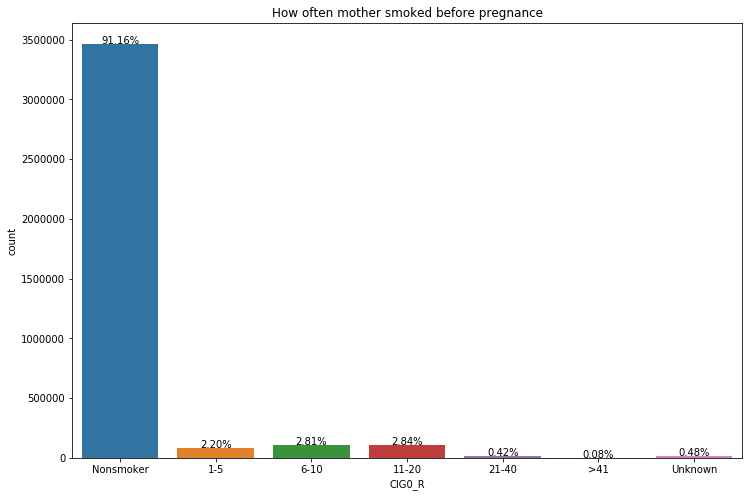

[Text(0, 0, 'Nonsmoker'),
 Text(0, 0, '1-5'),
 Text(0, 0, '6-10'),
 Text(0, 0, '11-20'),
 Text(0, 0, '21-40'),
 Text(0, 0, '>41'),
 Text(0, 0, 'Unknown')]

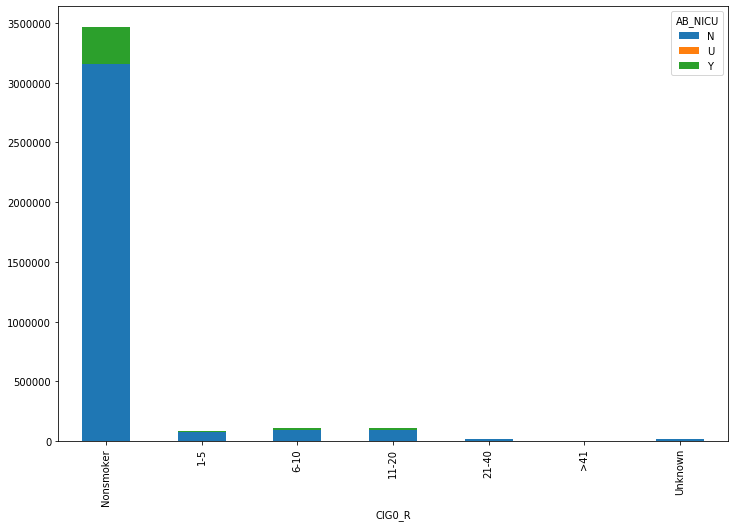

In [137]:
#Ciagarettes before pregnancy
plt.figure(figsize=(12,8))
ax = sns.countplot(x='CIG0_R', data=CDC2018s)
plt.title("How often mother smoked before pregnance")

label_text = ['Nonsmoker','1-5','6-10','11-20','21-40','>41','Unknown']
ax.set_xticklabels(label_text, fontsize=10)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['CIG0_R'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)

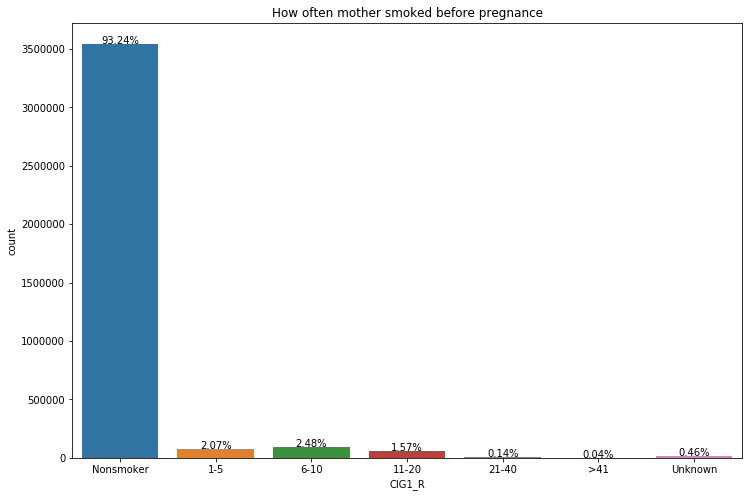

[Text(0, 0, 'Nonsmoker'),
 Text(0, 0, '1-5'),
 Text(0, 0, '6-10'),
 Text(0, 0, '11-20'),
 Text(0, 0, '21-40'),
 Text(0, 0, '>41'),
 Text(0, 0, 'Unknown')]

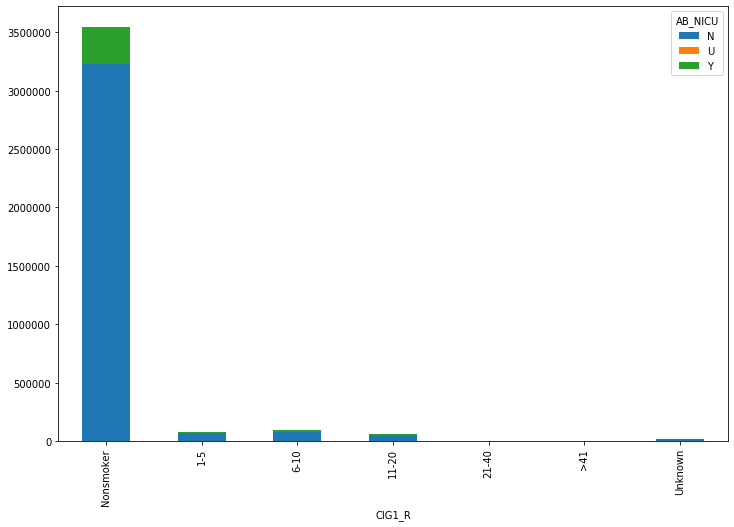

In [138]:
#Ciagarettes 1st trimester
plt.figure(figsize=(12,8))
ax = sns.countplot(x='CIG1_R', data=CDC2018s)
plt.title("How often mother smoked during 1st trimester")

label_text = ['Nonsmoker','1-5','6-10','11-20','21-40','>41','Unknown']
ax.set_xticklabels(label_text, fontsize=10)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['CIG1_R'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)

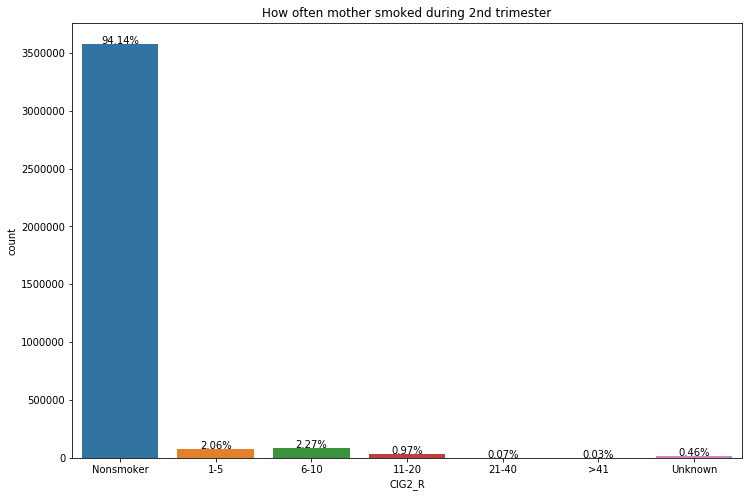

[Text(0, 0, 'Nonsmoker'),
 Text(0, 0, '1-5'),
 Text(0, 0, '6-10'),
 Text(0, 0, '11-20'),
 Text(0, 0, '21-40'),
 Text(0, 0, '>41'),
 Text(0, 0, 'Unknown')]

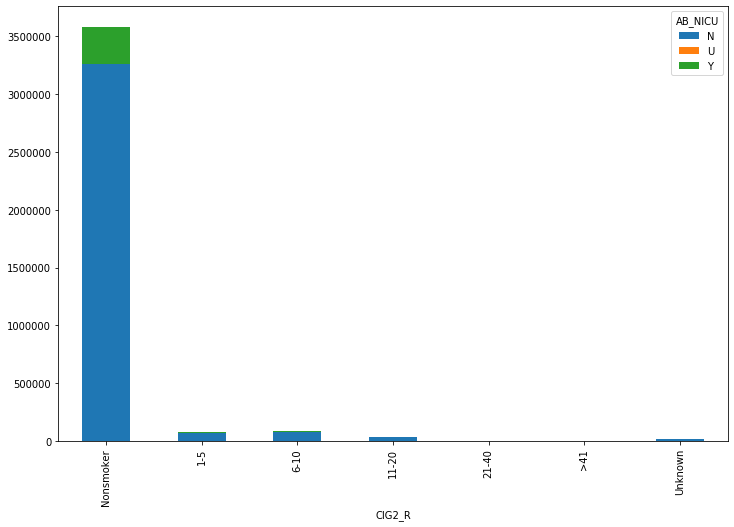

In [139]:
#Ciagarettes 2nd trimester 
plt.figure(figsize=(12,8))
ax = sns.countplot(x='CIG2_R', data=CDC2018s)
plt.title("How often mother smoked during 2nd trimester")

label_text = ['Nonsmoker','1-5','6-10','11-20','21-40','>41','Unknown']
ax.set_xticklabels(label_text, fontsize=10)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['CIG2_R'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)

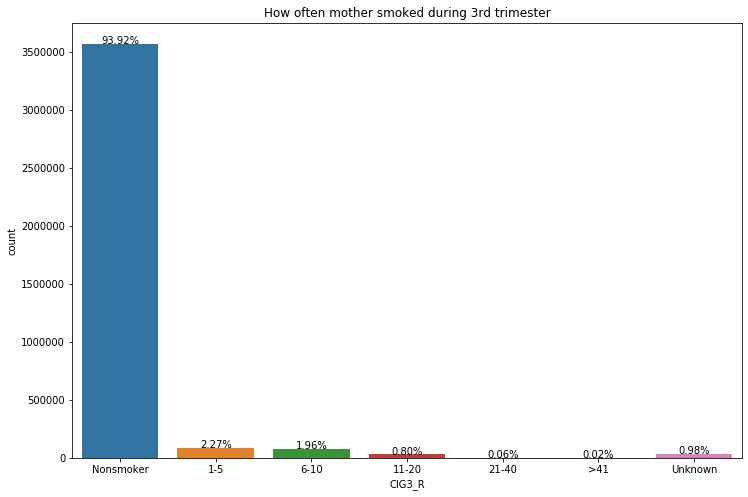

[Text(0, 0, 'Nonsmoker'),
 Text(0, 0, '1-5'),
 Text(0, 0, '6-10'),
 Text(0, 0, '11-20'),
 Text(0, 0, '21-40'),
 Text(0, 0, '>41'),
 Text(0, 0, 'Unknown')]

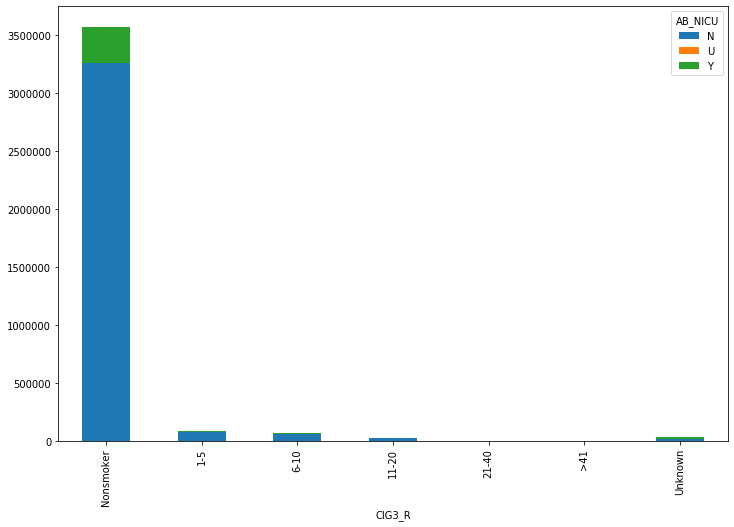

In [140]:
#Ciagarettes 3rd trimester 
plt.figure(figsize=(12,8))
ax = sns.countplot(x='CIG3_R', data=CDC2018s)
plt.title("How often mother smoked during 3rd trimester")

label_text = ['Nonsmoker','1-5','6-10','11-20','21-40','>41','Unknown']
ax.set_xticklabels(label_text, fontsize=10)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['CIG3_R'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)

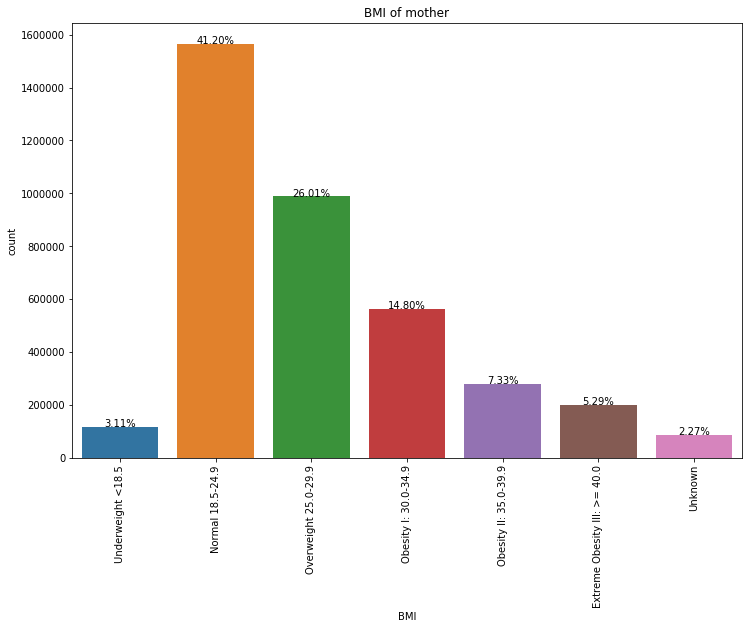

Text(0.5, 0, 'BMI')

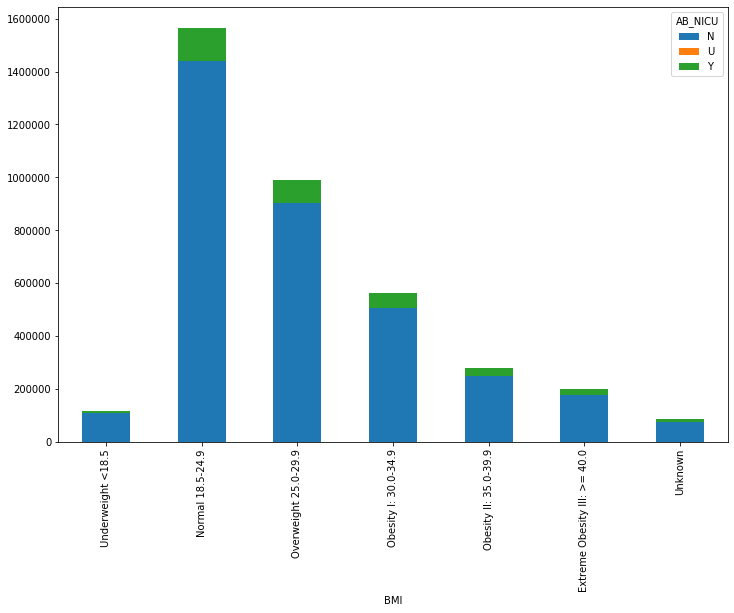

In [150]:
#BMI
plt.figure(figsize=(12,8))
ax = sns.countplot(x='BMI_R', data=CDC2018s)
plt.title("BMI of mother")

label_text = ['Underweight <18.5','Normal 18.5-24.9','Overweight 25.0-29.9','Obesity I: 30.0-34.9','Obesity II: 35.0-39.9','Extreme Obesity III: >= 40.0','Unknown']
ax.set_xticklabels(label_text, fontsize=10)
plt.xticks(rotation=90)
plt.xlabel('BMI')

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['BMI_R'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)
plt.xlabel('BMI')

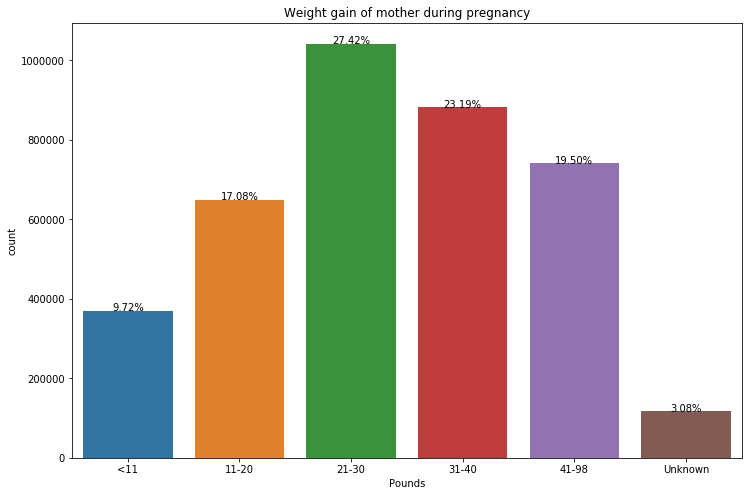

Text(0.5, 0, 'Pounds')

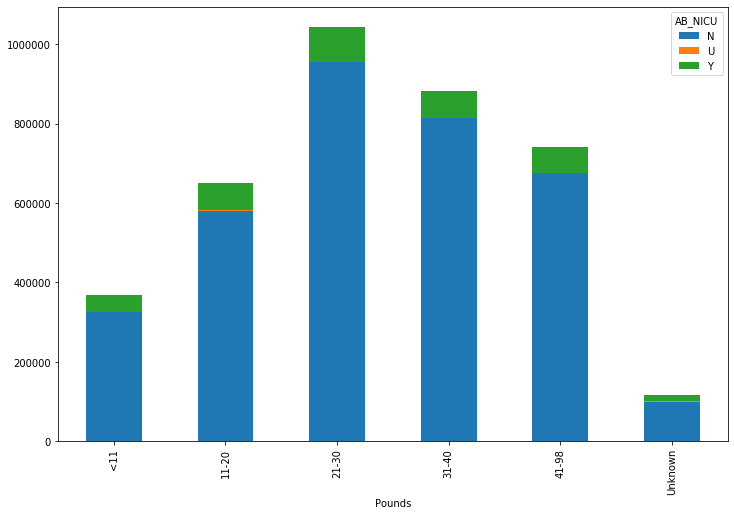

In [151]:
#weight gain
plt.figure(figsize=(12,8))
ax = sns.countplot(x='WTGAIN_REC', data=CDC2018s)
plt.title("Weight gain of mother during pregnancy")

label_text = ['<11','11-20','21-30','31-40','41-98','Unknown']
ax.set_xticklabels(label_text, fontsize=10)
plt.xlabel('Pounds')

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['WTGAIN_REC'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)
plt.xlabel('Pounds')

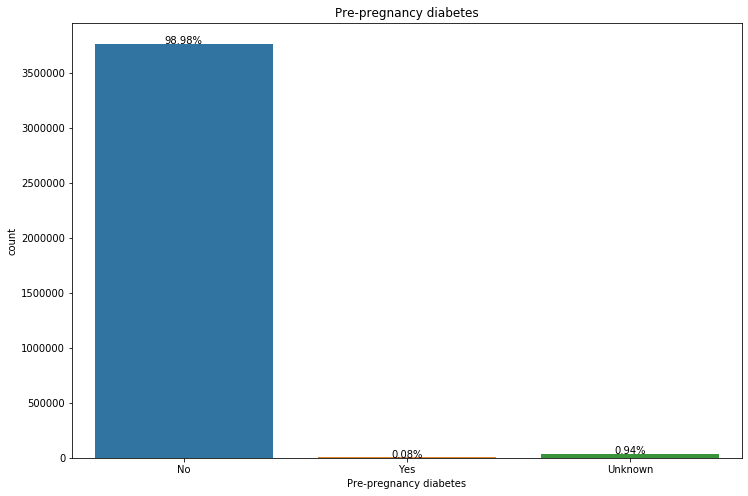

Text(0.5, 0, 'Pre-pregnancy diabetes')

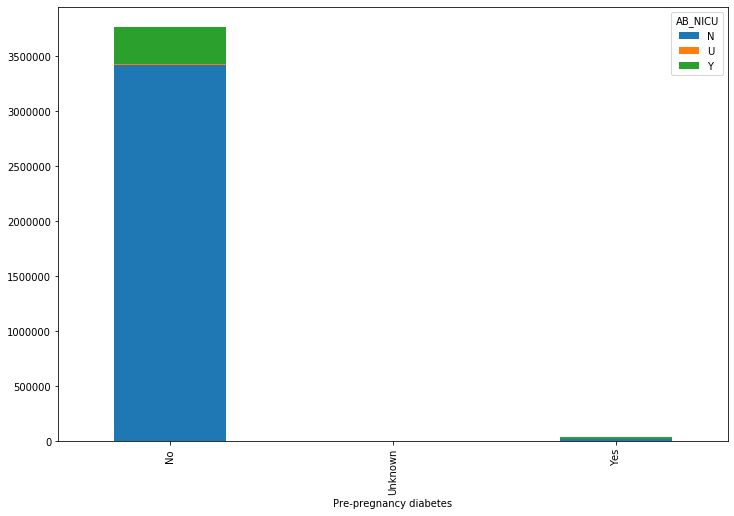

In [167]:
#Pre-pregnancy diabetes
plt.figure(figsize=(12,8))
ax = sns.countplot(x='RF_PDIAB', data=CDC2018s)
plt.title("Pre-pregnancy diabetes")

label_text = ['No','Yes','Unknown']
ax.set_xticklabels(label_text, fontsize=10)
plt.xlabel('Pre-pregnancy diabetes')

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

label_text2 = ['No','Unknown','Yes']
MRACEHISP_NICU = pd.crosstab(index=CDC2018s['RF_PDIAB'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text2, fontsize=10)
plt.xlabel('Pre-pregnancy diabetes')

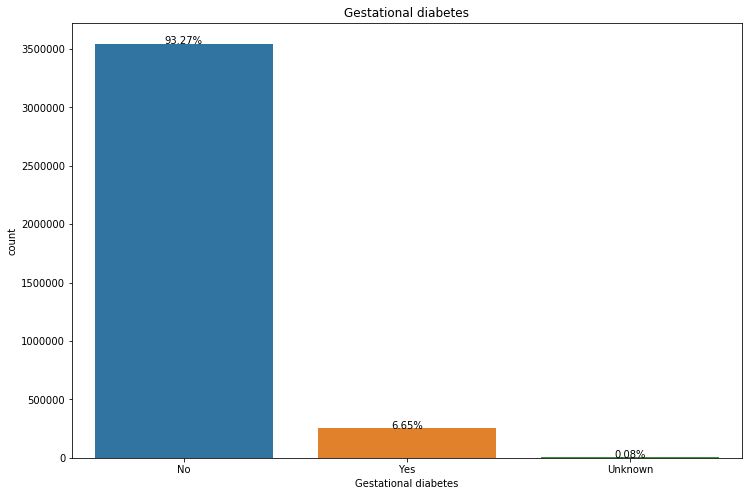

Text(0.5, 0, 'Gestational diabetes')

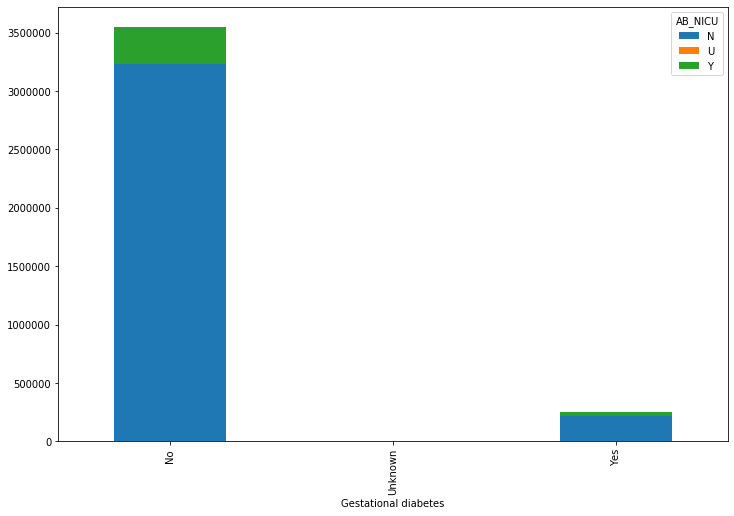

In [166]:
#Gestational diabetes
plt.figure(figsize=(12,8))
ax = sns.countplot(x='RF_GDIAB', data=CDC2018s)
plt.title("Gestational diabetes")

label_text = ['No','Yes','Unknown']
ax.set_xticklabels(label_text, fontsize=10)
plt.xlabel('Gestational diabetes')

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

label_text2 = ['No','Unknown','Yes']
MRACEHISP_NICU = pd.crosstab(index=CDC2018s['RF_GDIAB'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text2, fontsize=10)
plt.xlabel('Gestational diabetes')

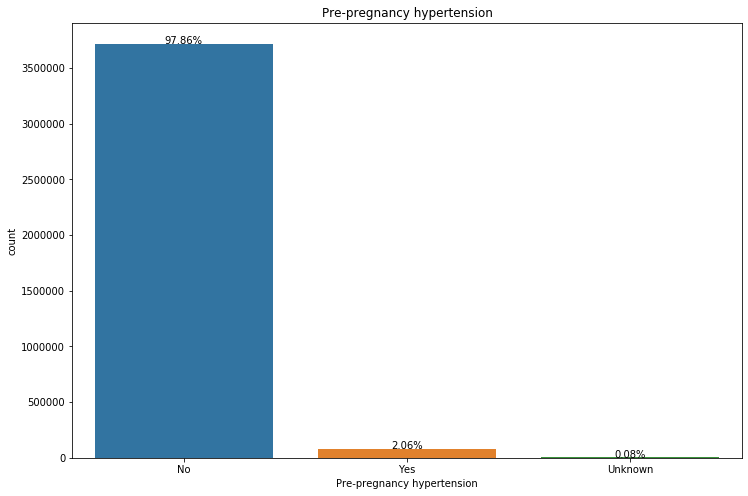

Text(0.5, 0, 'Pre-pregnancy hypertension')

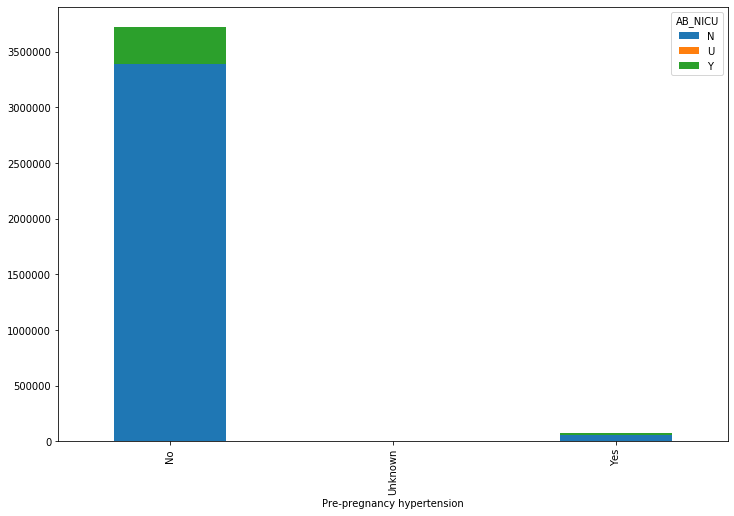

In [165]:
#Pre-pregnancy Hypertension
plt.figure(figsize=(12,8))
ax = sns.countplot(x='RF_PHYPE', data=CDC2018s)
plt.title("Pre-pregnancy hypertension")

label_text = ['No','Yes','Unknown']
ax.set_xticklabels(label_text, fontsize=10)
plt.xlabel('Pre-pregnancy hypertension')

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

label_text2 = ['No','Unknown','Yes']
MRACEHISP_NICU = pd.crosstab(index=CDC2018s['RF_PHYPE'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text2, fontsize=10)
plt.xlabel('Pre-pregnancy hypertension')

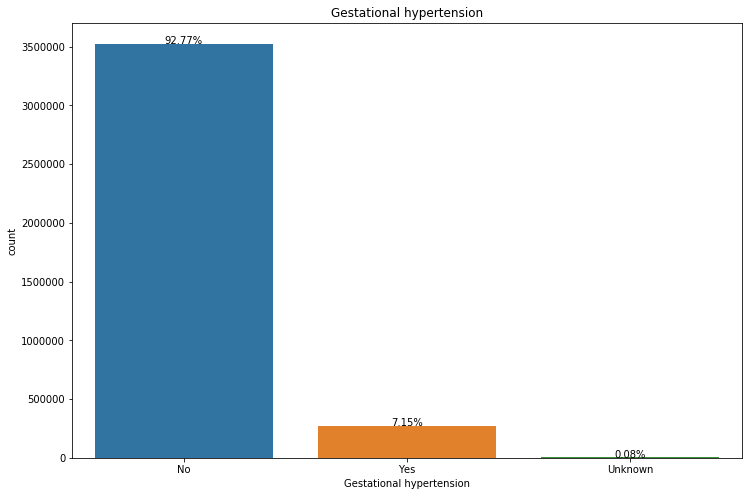

Text(0.5, 0, 'Gestational hypertension')

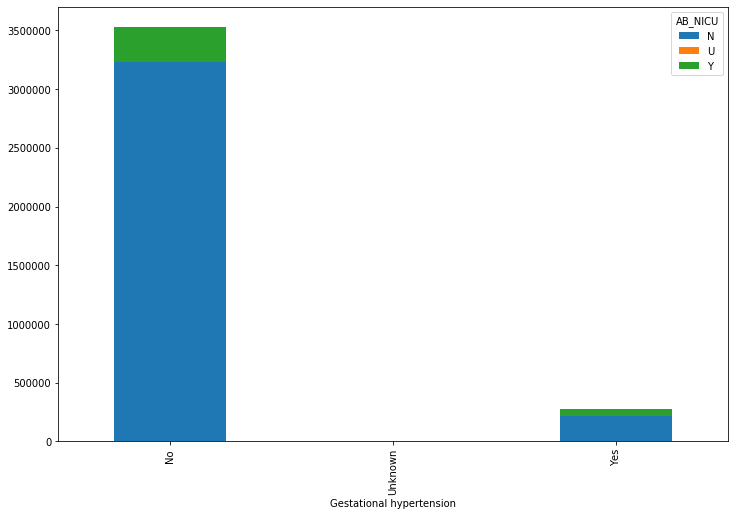

In [164]:
#Pre-pregnancy Hypertension
plt.figure(figsize=(12,8))
ax = sns.countplot(x='RF_GHYPE', data=CDC2018s)
plt.title("Gestational hypertension")

label_text = ['No','Yes','Unknown']
ax.set_xticklabels(label_text, fontsize=10)
plt.xlabel('Gestational hypertension')

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

label_text2 = ['No','Unknown','Yes']
MRACEHISP_NICU = pd.crosstab(index=CDC2018s['RF_GHYPE'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text2, fontsize=10)
plt.xlabel('Gestational hypertension')

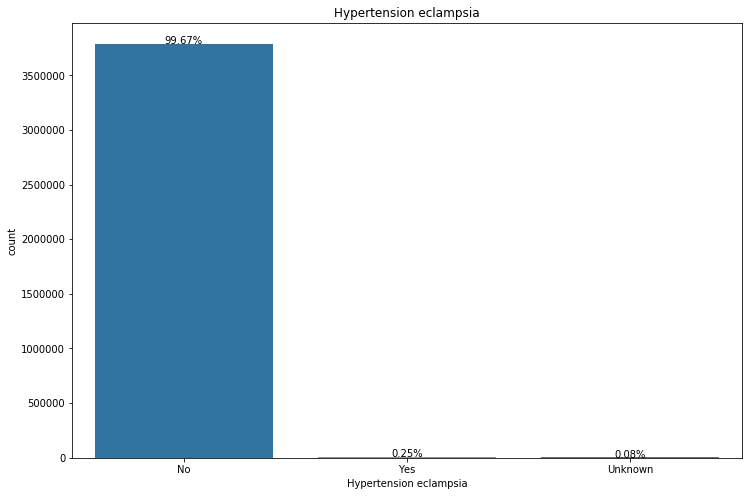

Text(0.5, 0, 'Hypertension eclampsian')

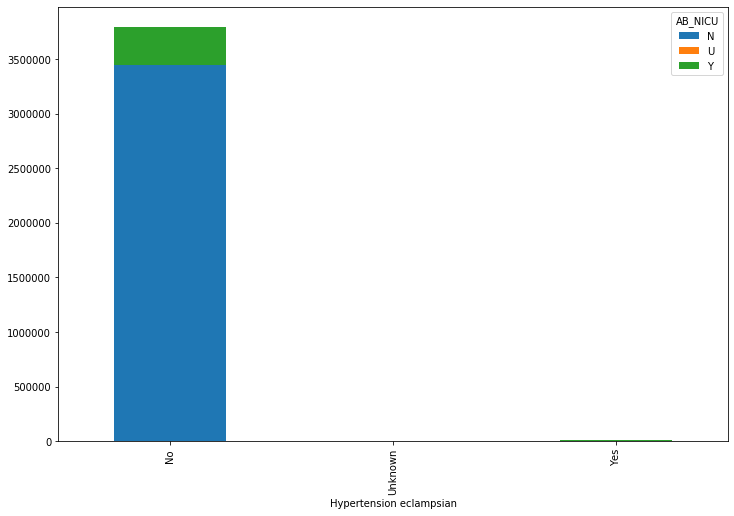

In [162]:
#Hypertension eclampsia
plt.figure(figsize=(12,8))
ax = sns.countplot(x='RF_EHYPE', data=CDC2018s)
plt.title("Hypertension eclampsia")

label_text = ['No','Yes','Unknown']
ax.set_xticklabels(label_text, fontsize=10)
plt.xlabel('Hypertension eclampsia')

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

label_text2 = ['No','Unknown','Yes']
MRACEHISP_NICU = pd.crosstab(index=CDC2018s['RF_EHYPE'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text2, fontsize=10)
plt.xlabel('Hypertension eclampsian')

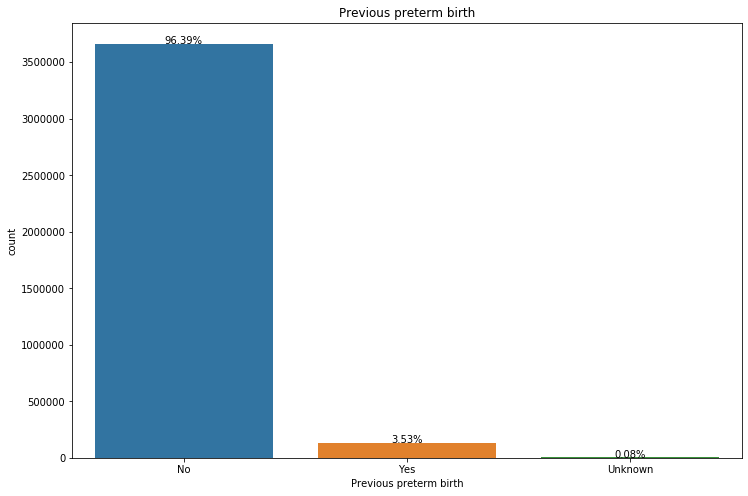

Text(0.5, 0, 'Previous preterm birth')

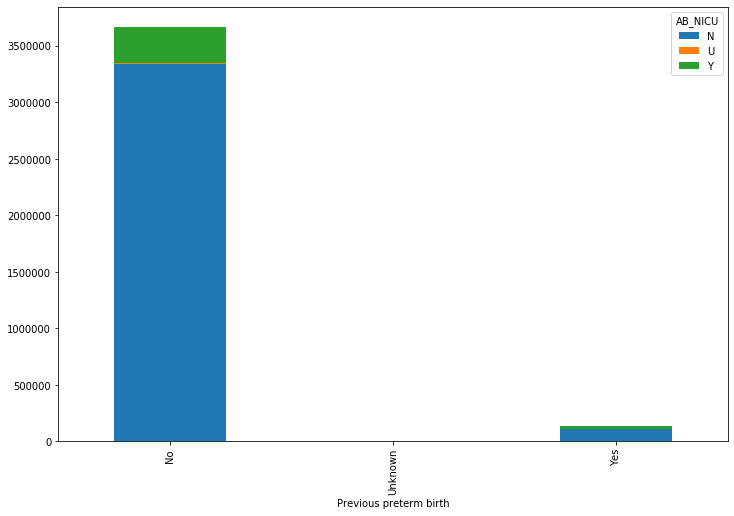

In [163]:
#Previous preterm birth
plt.figure(figsize=(12,8))
ax = sns.countplot(x='RF_PPTERM', data=CDC2018s)
plt.title("Previous preterm birth")

label_text = ['No','Yes','Unknown']
ax.set_xticklabels(label_text, fontsize=10)
plt.xlabel('Previous preterm birth')

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

label_text2 = ['No','Unknown','Yes']
MRACEHISP_NICU = pd.crosstab(index=CDC2018s['RF_PPTERM'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text2, fontsize=10)
plt.xlabel('Previous preterm birth')

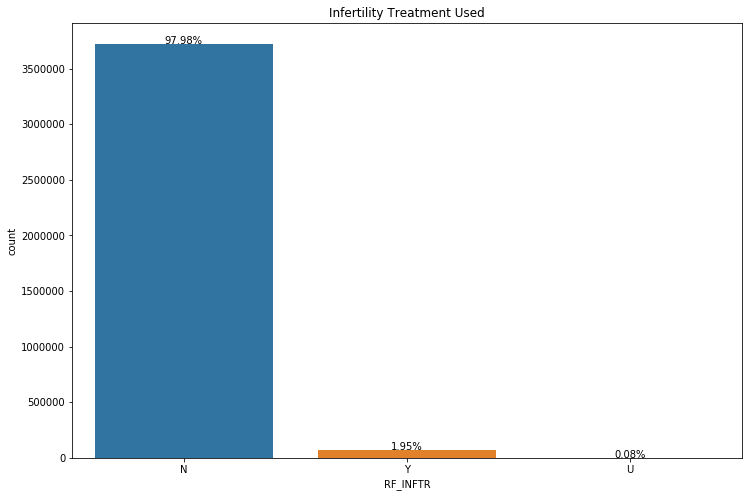

Text(0.5, 0, 'Infertility Treatment Used')

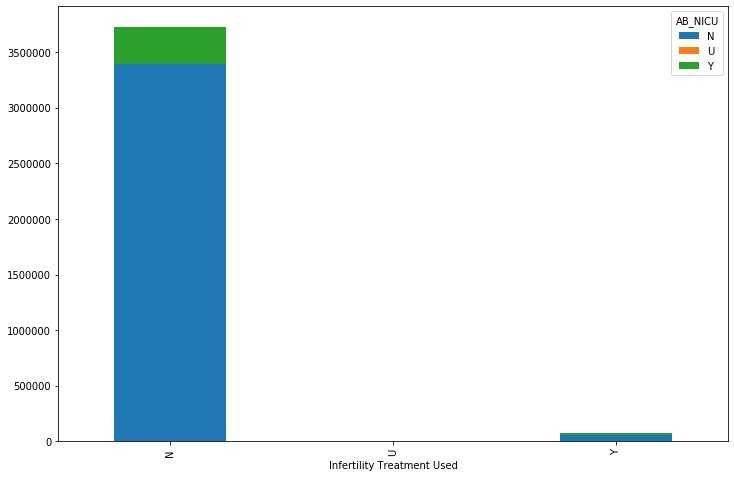

In [168]:
#Infertility Treatment Used
plt.figure(figsize=(12,8))
ax = sns.countplot(x='RF_INFTR', data=CDC2018s)
plt.title("Infertility Treatment Used")

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['RF_INFTR'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)
plt.xlabel('Infertility Treatment Used')

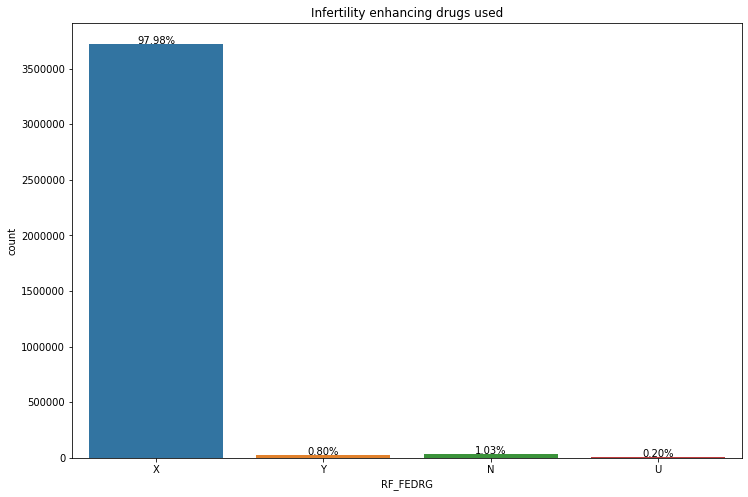

Text(0.5, 0, 'Infertility enhancing drugs used')

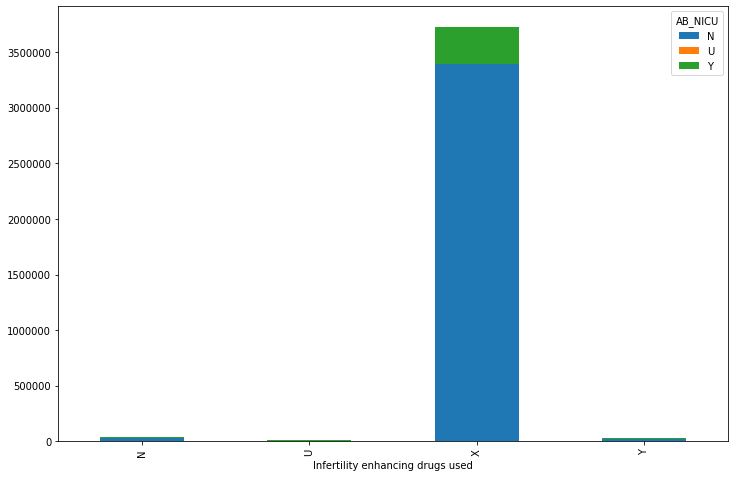

In [169]:
#Infertility enhancing drugs used
plt.figure(figsize=(12,8))
ax = sns.countplot(x='RF_FEDRG', data=CDC2018s)
plt.title("Infertility enhancing drugs used")

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['RF_FEDRG'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)
plt.xlabel('Infertility enhancing drugs used')

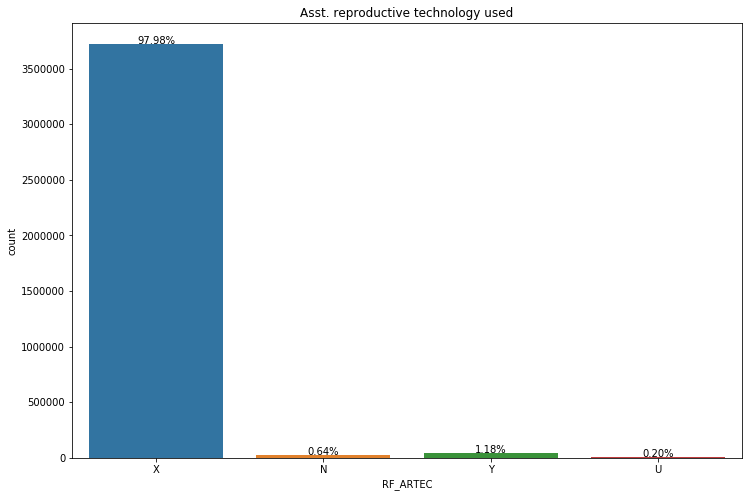

Text(0.5, 0, 'Asst. reproductive technology used')

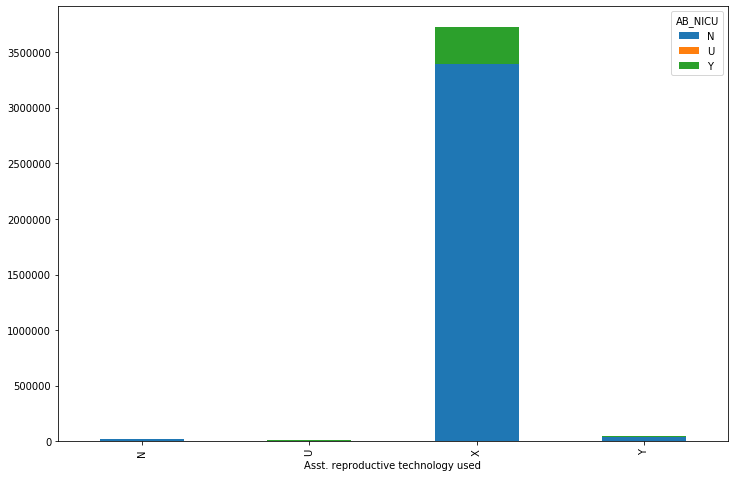

In [170]:
#Asst. Reproductive technology
plt.figure(figsize=(12,8))
ax = sns.countplot(x='RF_ARTEC', data=CDC2018s)
plt.title("Asst. reproductive technology used")

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['RF_ARTEC'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)
plt.xlabel('Asst. reproductive technology used')

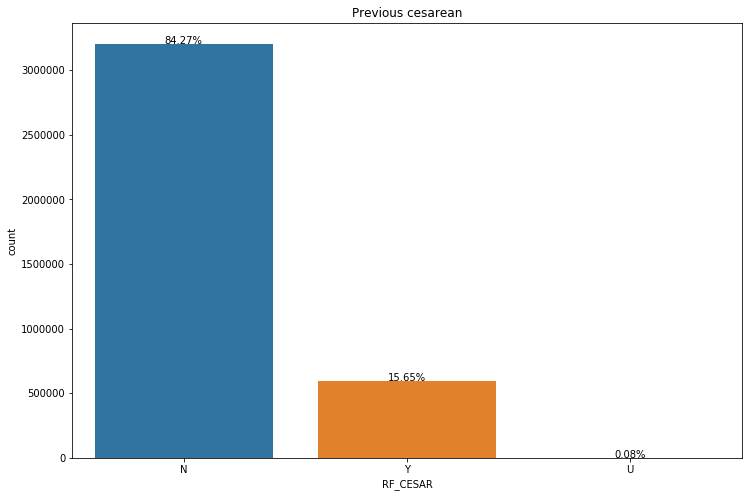

Text(0.5, 0, 'Previous cesarean')

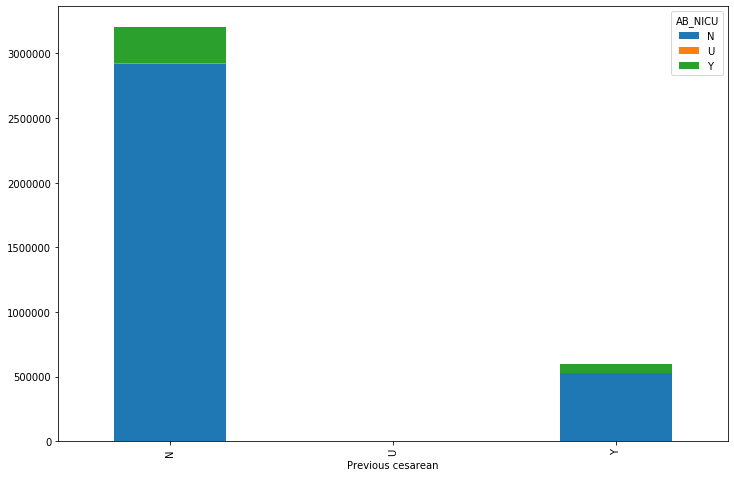

In [171]:
#Previous cesarean
plt.figure(figsize=(12,8))
ax = sns.countplot(x='RF_CESAR', data=CDC2018s)
plt.title("Previous cesarean")

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['RF_CESAR'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)
plt.xlabel('Previous cesarean')

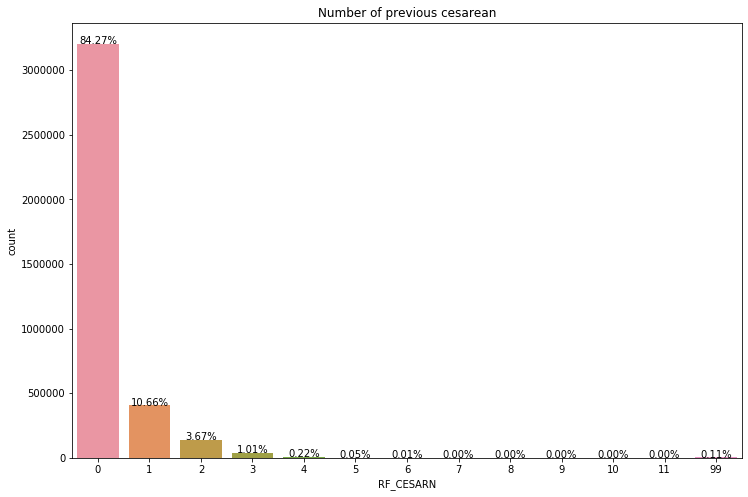

Text(0.5, 0, 'Number of previous cesarean')

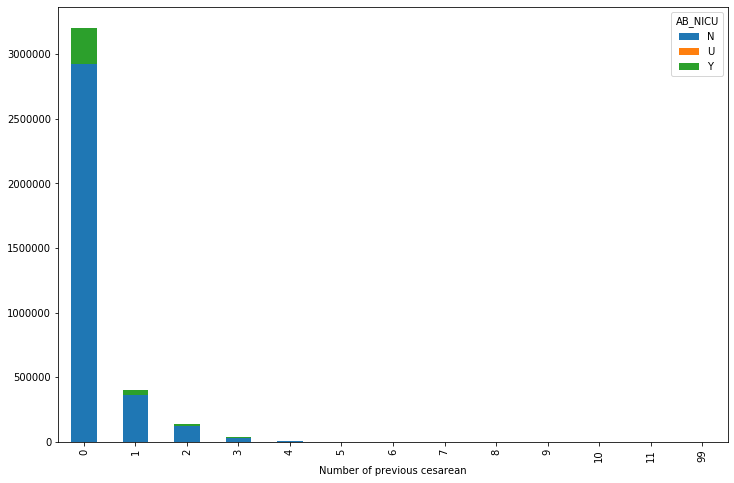

In [172]:
# num of Previous cesarean
plt.figure(figsize=(12,8))
ax = sns.countplot(x='RF_CESARN', data=CDC2018s)
plt.title("Number of previous cesarean")

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['RF_CESARN'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)
plt.xlabel('Number of previous cesarean')

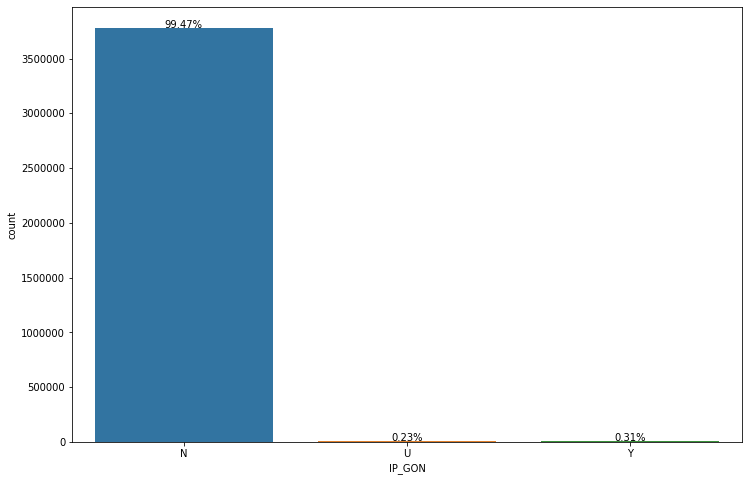

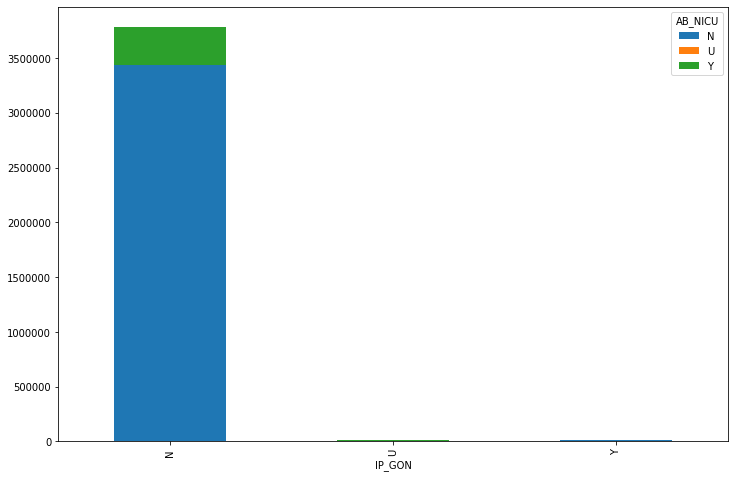

In [173]:
#Gonorrhea
plt.figure(figsize=(12,8))
ax = sns.countplot(x='IP_GON', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['IP_GON'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

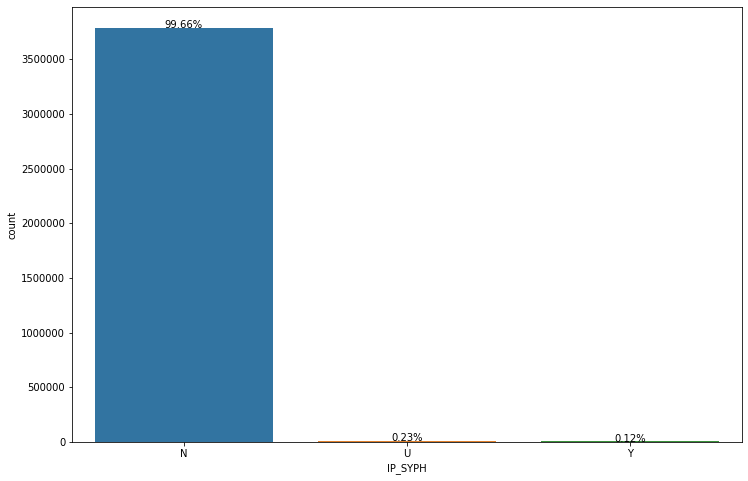

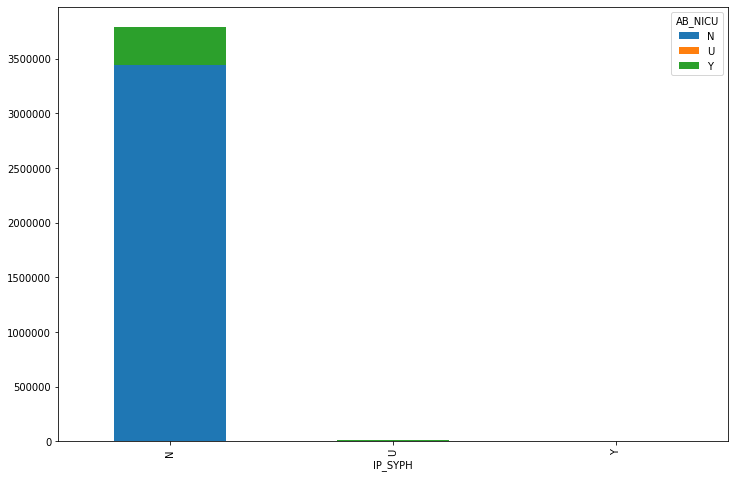

In [174]:
#Syphilis
plt.figure(figsize=(12,8))
ax = sns.countplot(x='IP_SYPH', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['IP_SYPH'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

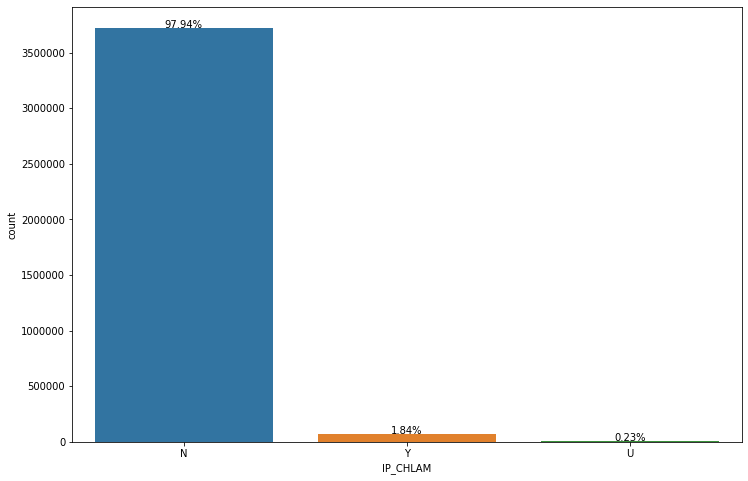

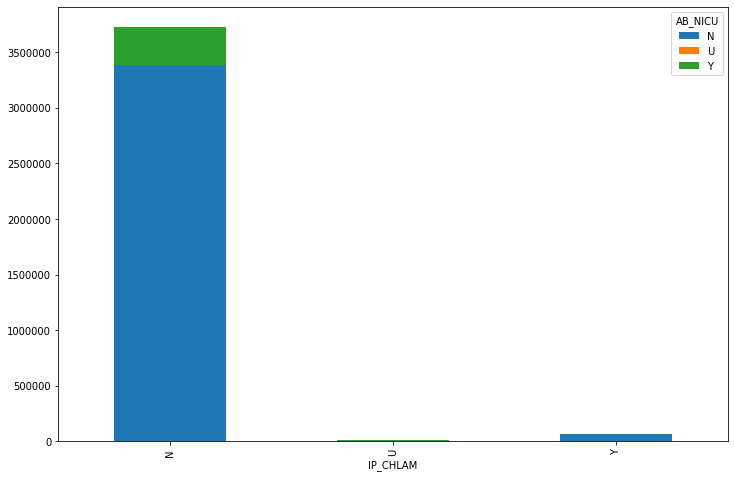

In [175]:
#Chlamydia
plt.figure(figsize=(12,8))
ax = sns.countplot(x='IP_CHLAM', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['IP_CHLAM'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

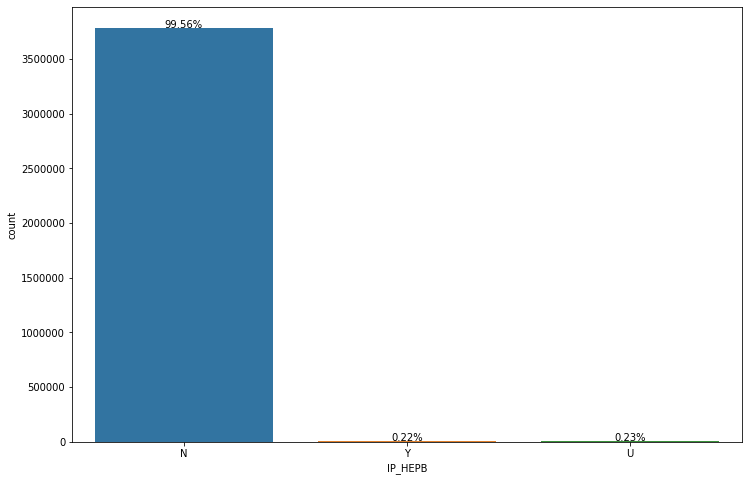

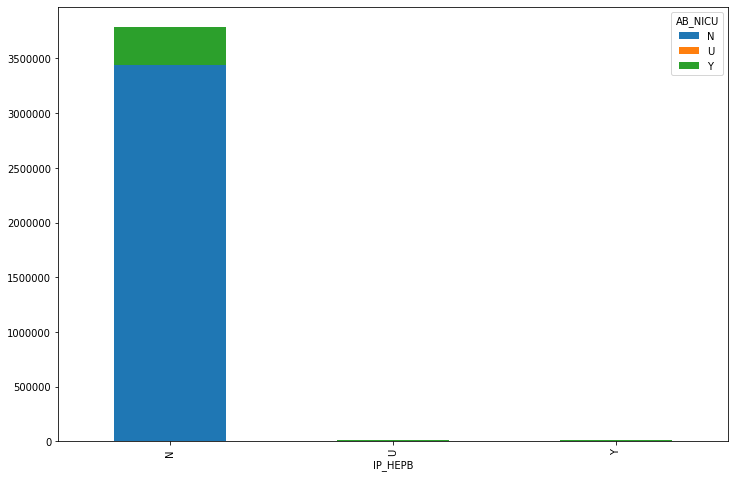

In [176]:
#Hep B
plt.figure(figsize=(12,8))
ax = sns.countplot(x='IP_HEPB', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['IP_HEPB'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

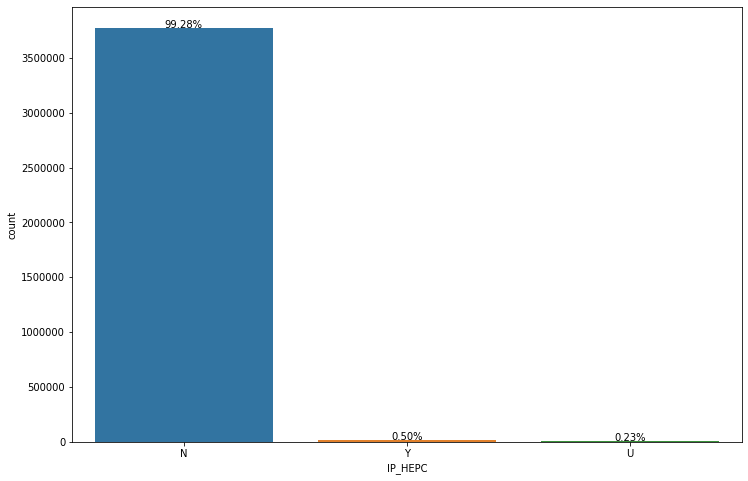

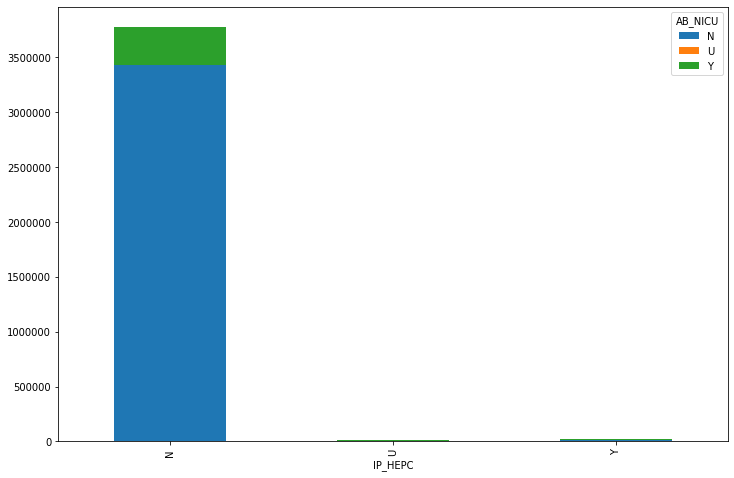

In [177]:
#Hep C
plt.figure(figsize=(12,8))
ax = sns.countplot(x='IP_HEPC', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['IP_HEPC'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

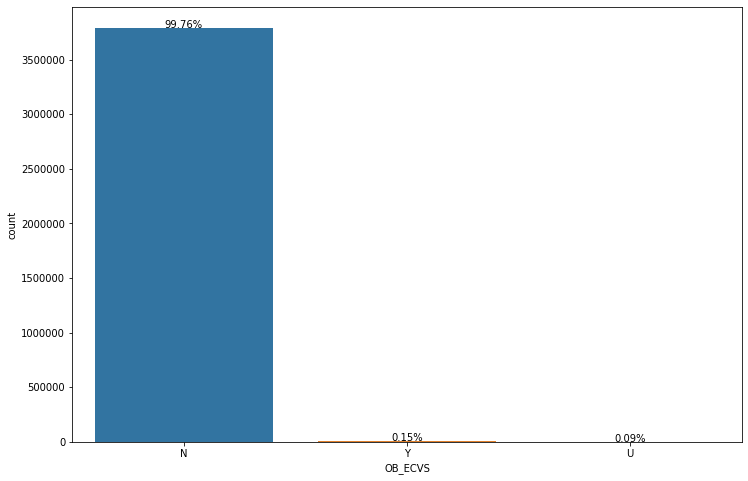

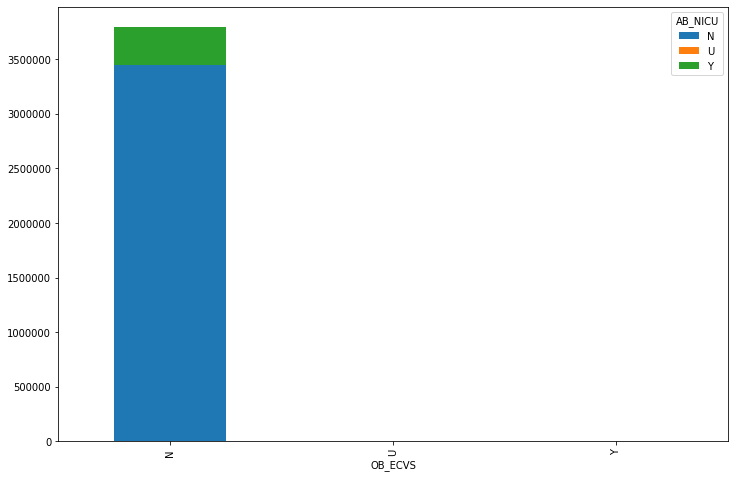

In [178]:
#Successful External Cephalic Version
plt.figure(figsize=(12,8))
ax = sns.countplot(x='OB_ECVS', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['OB_ECVS'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

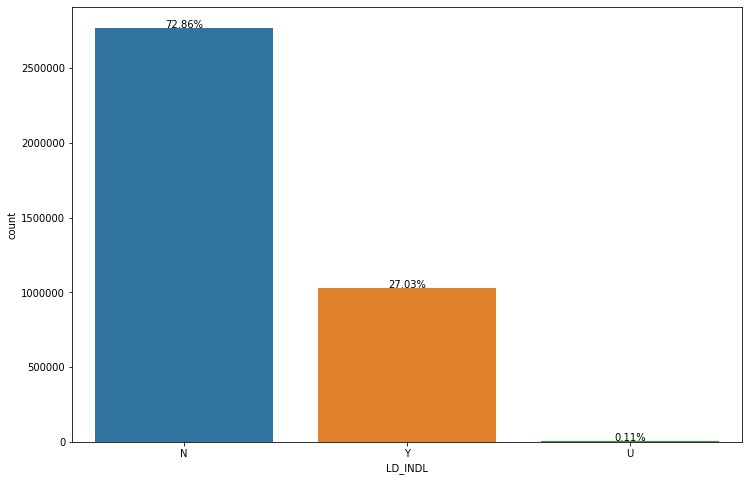

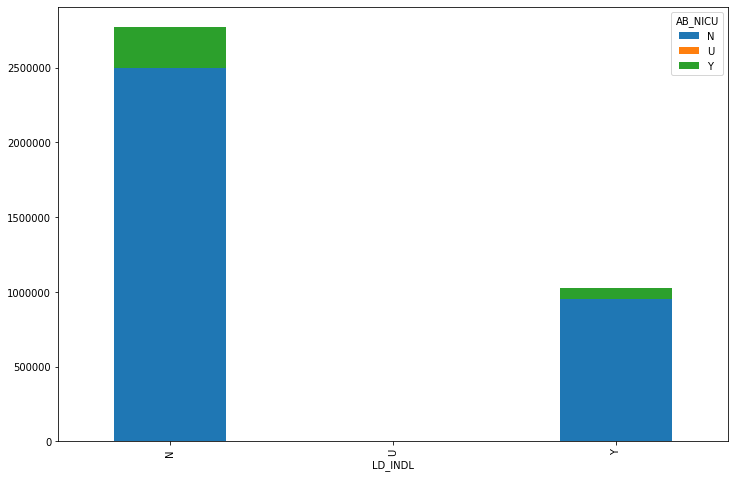

In [179]:
#Induction of labor
plt.figure(figsize=(12,8))
ax = sns.countplot(x='LD_INDL', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['LD_INDL'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

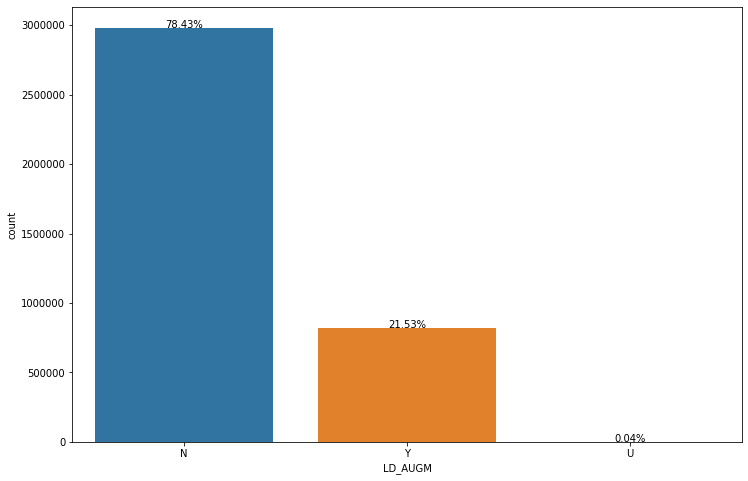

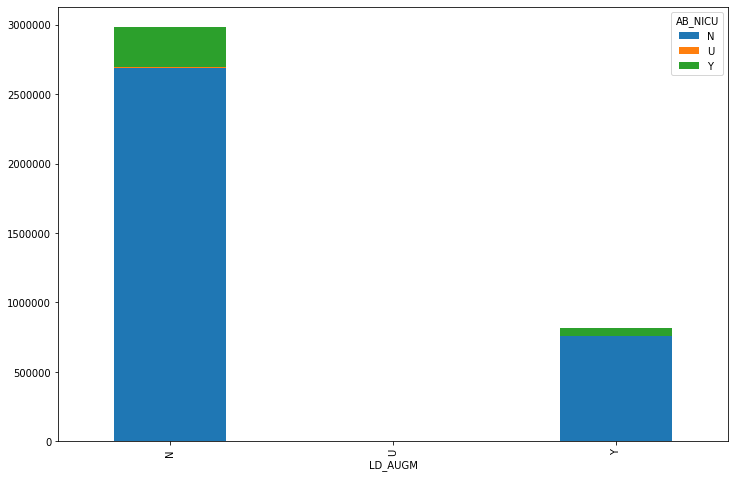

In [180]:
#Augmentation of labor
plt.figure(figsize=(12,8))
ax = sns.countplot(x='LD_AUGM', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['LD_AUGM'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

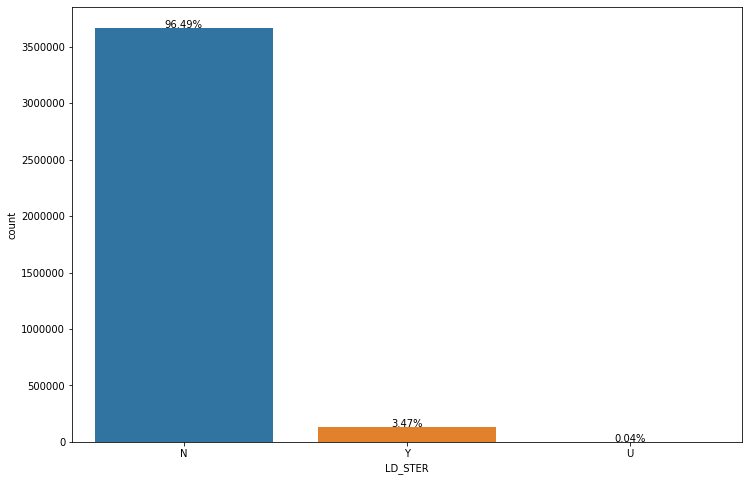

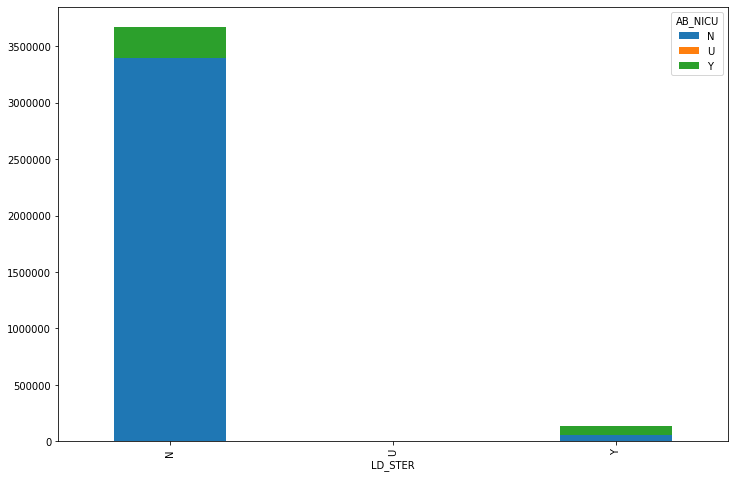

In [181]:
#Steroids
plt.figure(figsize=(12,8))
ax = sns.countplot(x='LD_STER', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['LD_STER'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

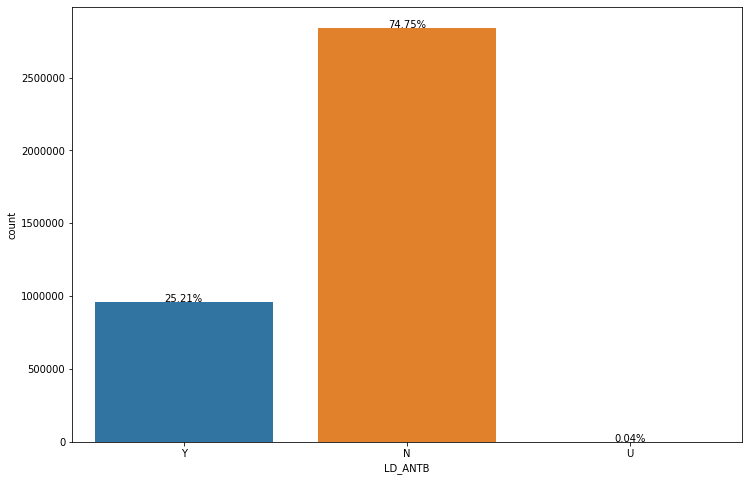

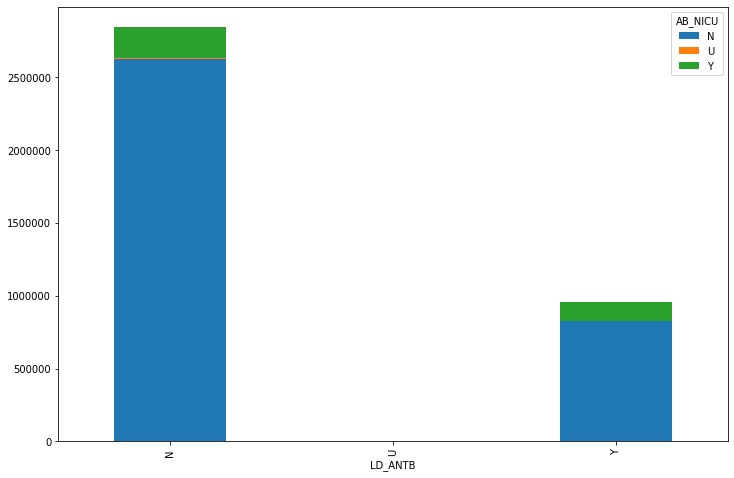

In [183]:
#antibioticx
plt.figure(figsize=(12,8))
ax = sns.countplot(x='LD_ANTB', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['LD_ANTB'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

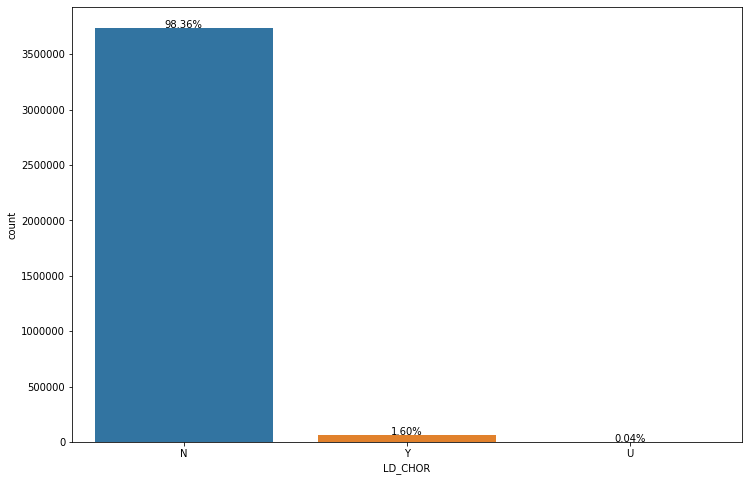

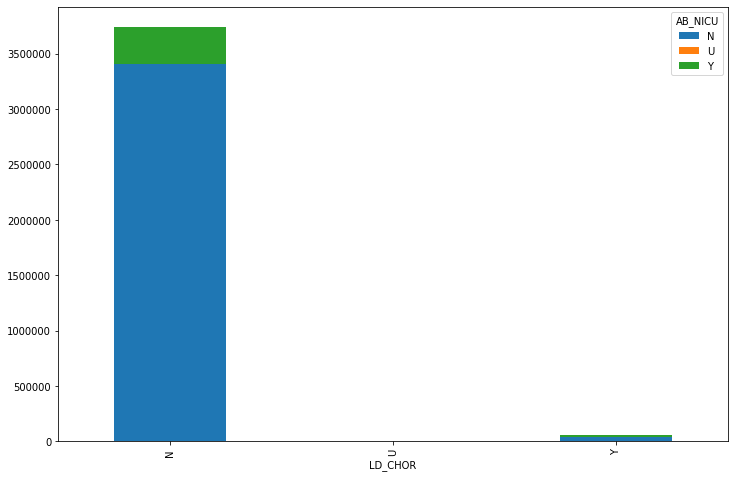

In [184]:
#chorioamnionitis
plt.figure(figsize=(12,8))
ax = sns.countplot(x='LD_CHOR', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['LD_CHOR'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

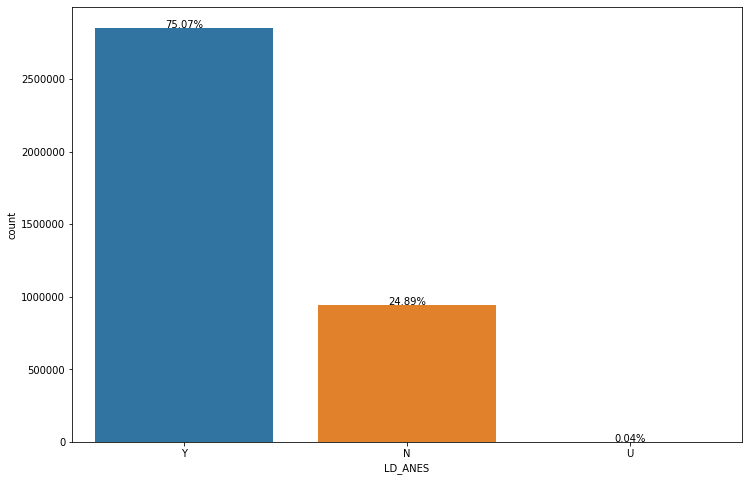

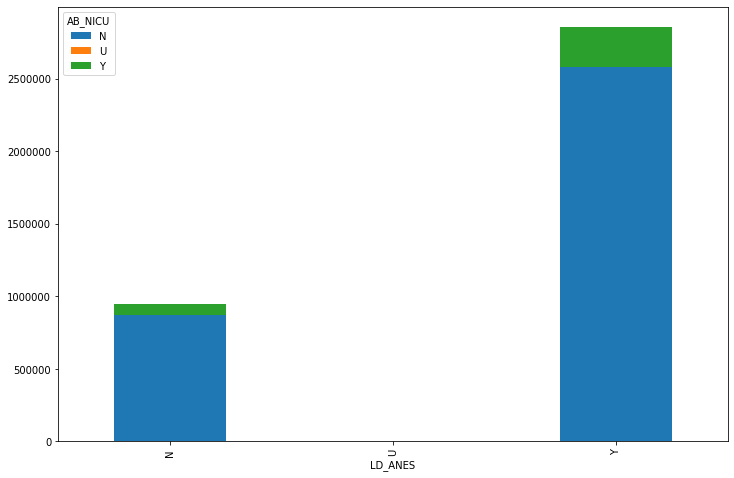

In [185]:
#Anestesia
plt.figure(figsize=(12,8))
ax = sns.countplot(x='LD_ANES', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['LD_ANES'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

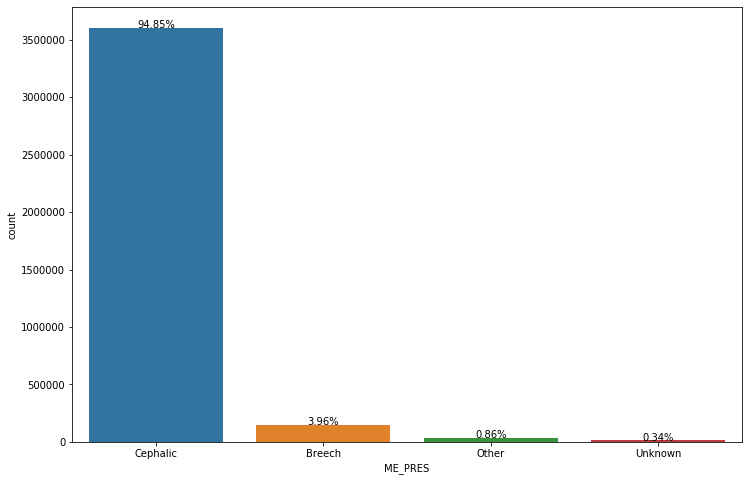

[Text(0, 0, 'Cephalic'),
 Text(0, 0, 'Breech'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Unknown')]

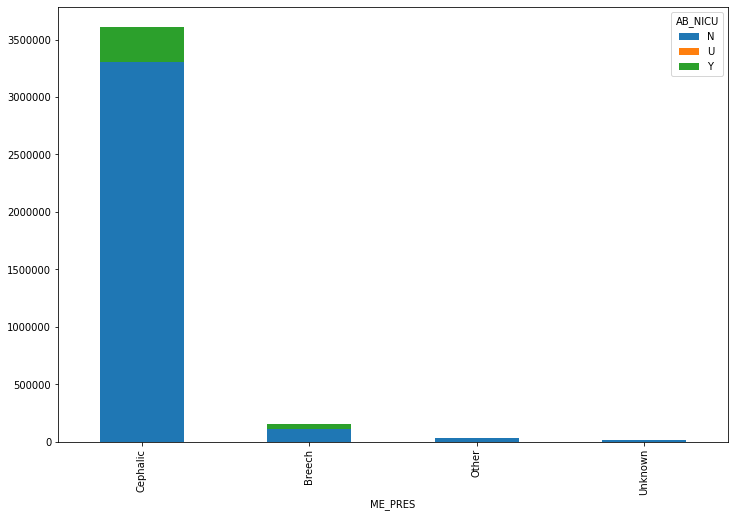

In [187]:
#Fetal presentation at delivery
plt.figure(figsize=(12,8))
ax = sns.countplot(x='ME_PRES', data=CDC2018s)
label_text = ['Cephalic','Breech','Other','Unknown']
ax.set_xticklabels(label_text, fontsize=10)
total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['ME_PRES'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)



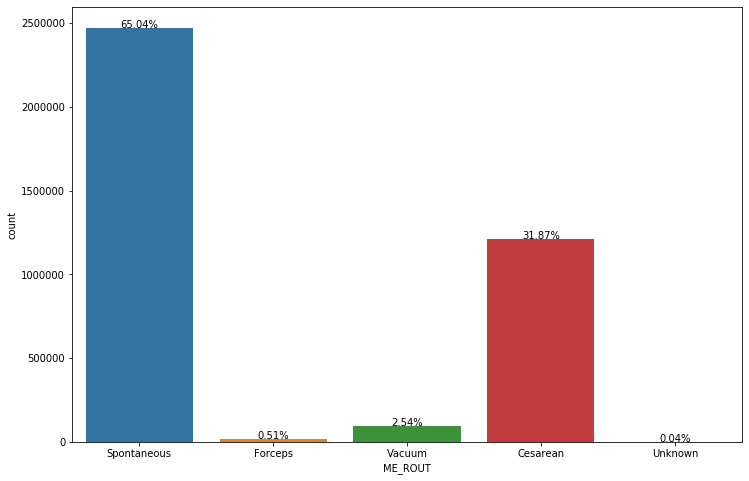

[Text(0, 0, 'Spontaneous'),
 Text(0, 0, 'Forceps'),
 Text(0, 0, 'Vacuum'),
 Text(0, 0, 'Cesarean'),
 Text(0, 0, 'Unknown')]

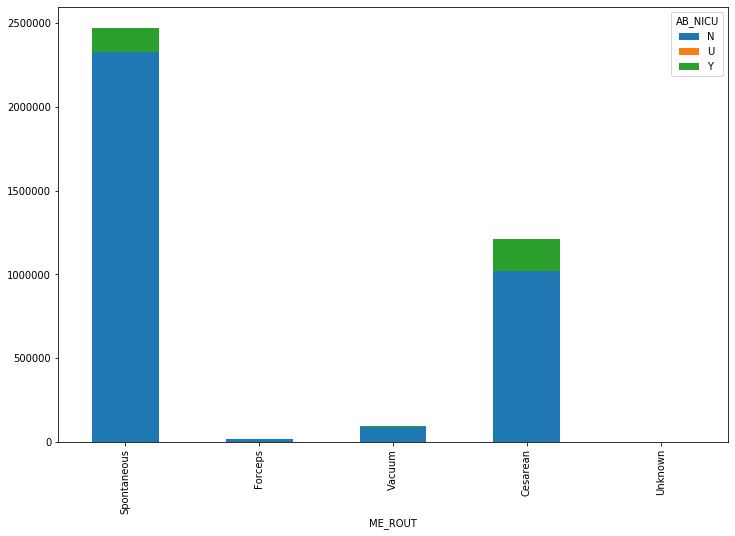

In [188]:
#Final route and method of delivery
plt.figure(figsize=(12,8))
ax = sns.countplot(x='ME_ROUT', data=CDC2018s)
label_text = ['Spontaneous', 'Forceps','Vacuum','Cesarean','Unknown']
ax.set_xticklabels(label_text, fontsize=10)
total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['ME_ROUT'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)

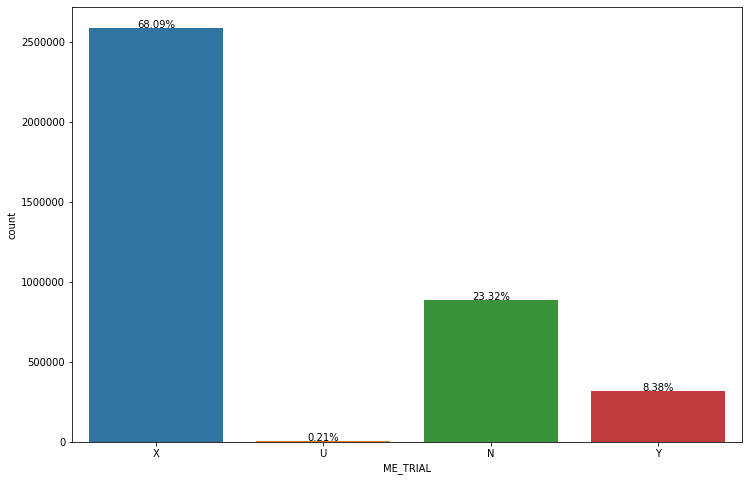

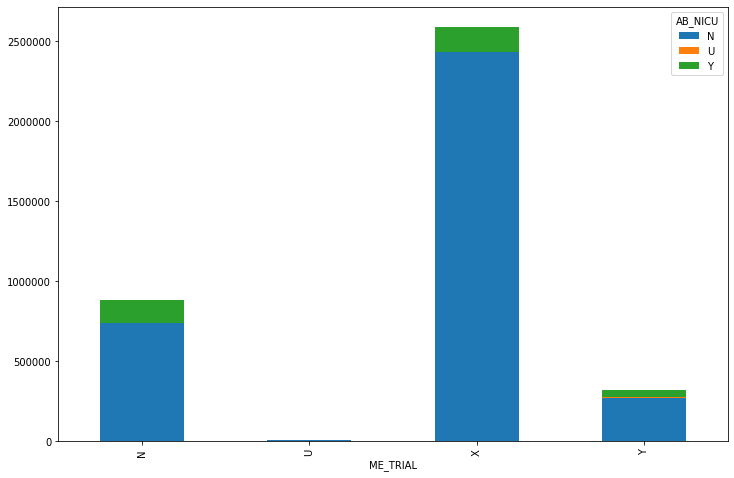

In [189]:
#Trial of labor attempted
plt.figure(figsize=(12,8))
ax = sns.countplot(x='ME_TRIAL', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['ME_TRIAL'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

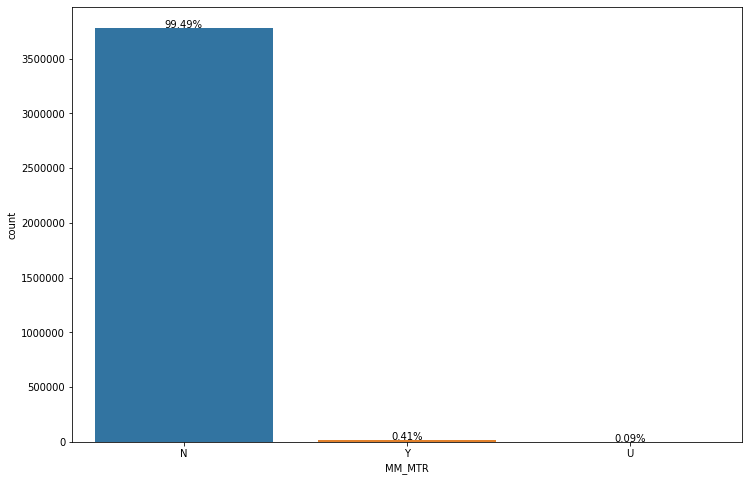

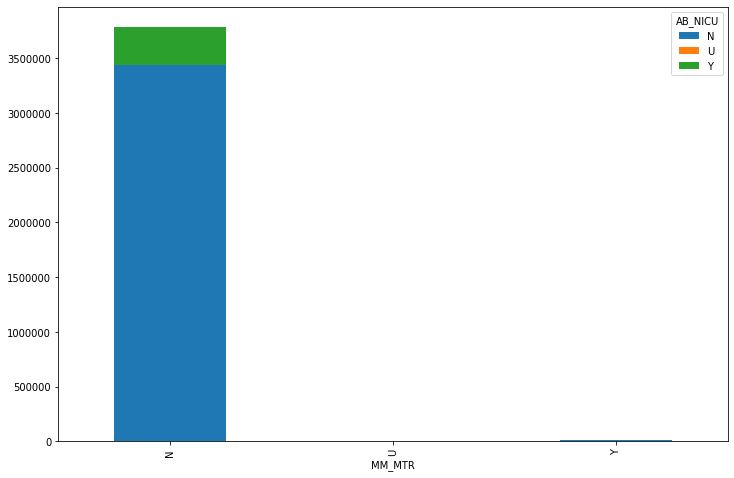

In [190]:
#Maternal transfusion
plt.figure(figsize=(12,8))
ax = sns.countplot(x='MM_MTR', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['MM_MTR'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

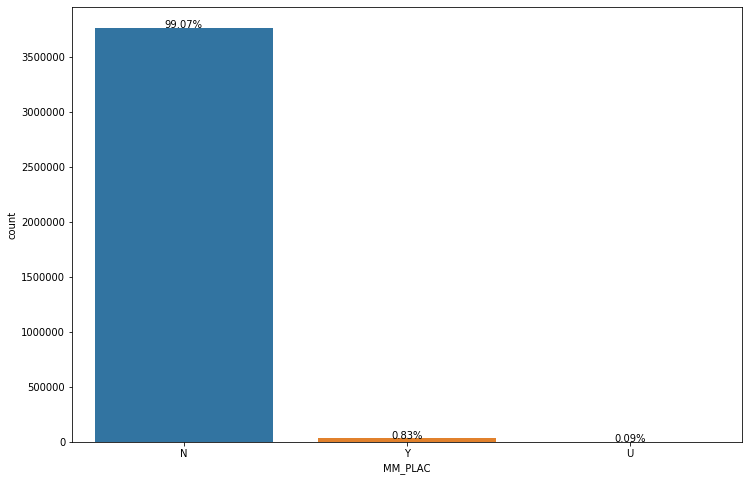

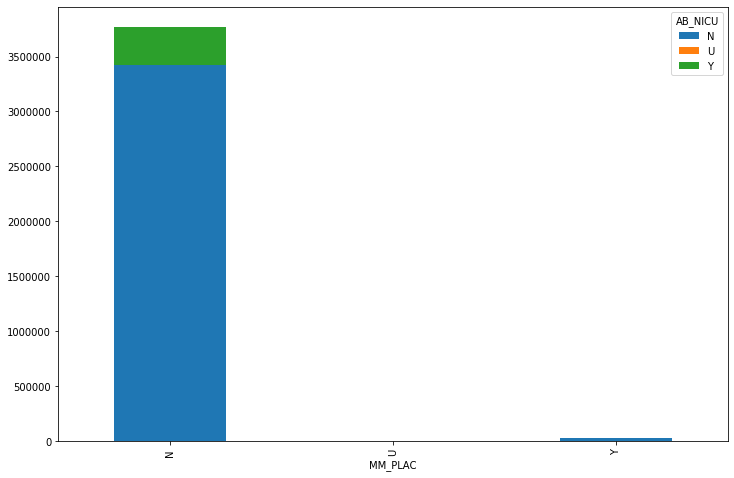

In [191]:
#Perineale Laceration
plt.figure(figsize=(12,8))
ax = sns.countplot(x='MM_PLAC', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['MM_PLAC'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

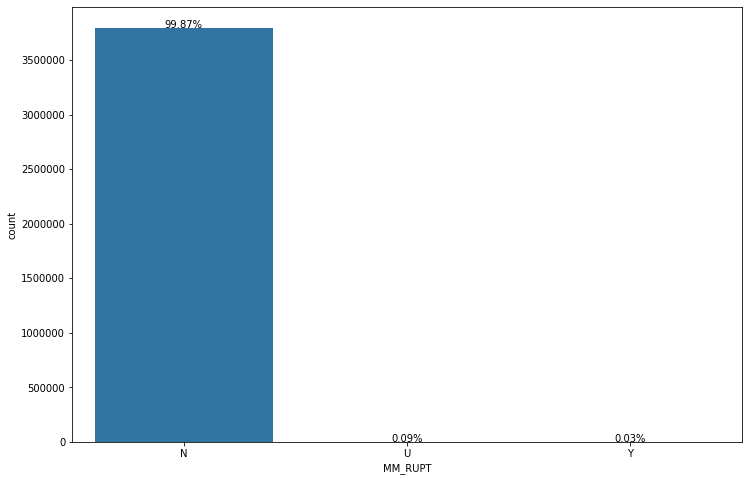

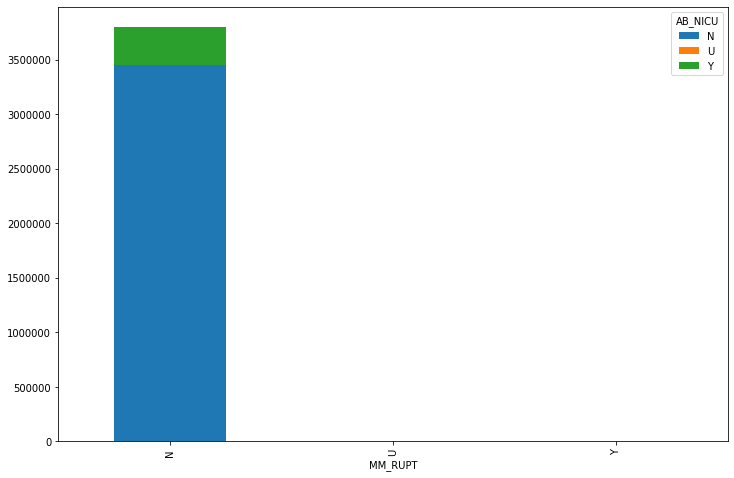

In [192]:
#Ruptured uterus
plt.figure(figsize=(12,8))
ax = sns.countplot(x='MM_RUPT', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['MM_RUPT'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

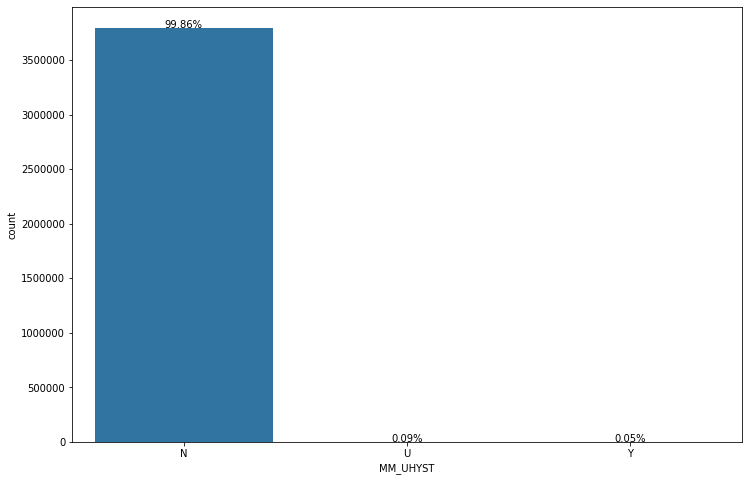

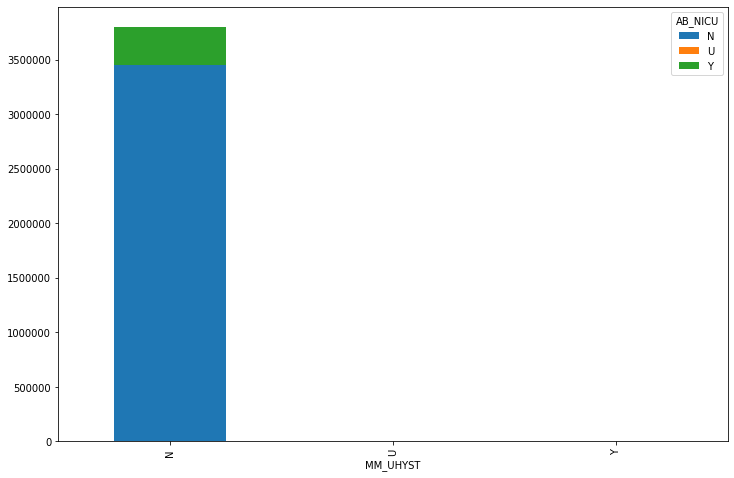

In [193]:
#Unplanned hysterectomy
plt.figure(figsize=(12,8))
ax = sns.countplot(x='MM_UHYST', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['MM_UHYST'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

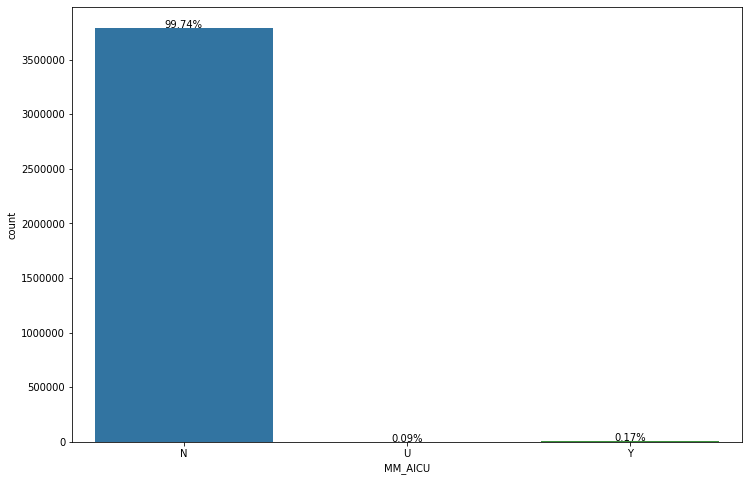

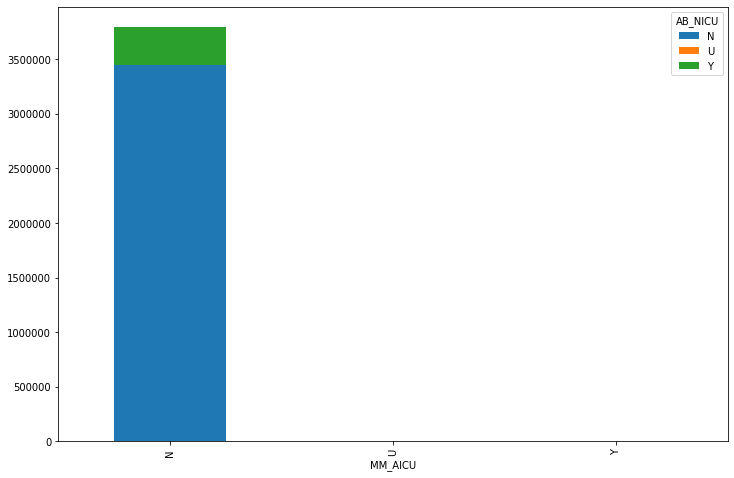

In [194]:
#Admitted to intensive care
plt.figure(figsize=(12,8))
ax = sns.countplot(x='MM_AICU', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['MM_AICU'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

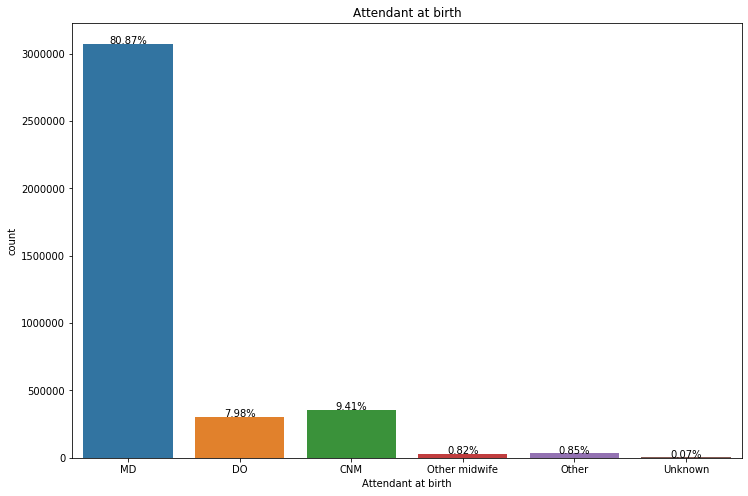

Text(0.5, 0, 'Attendant at birth')

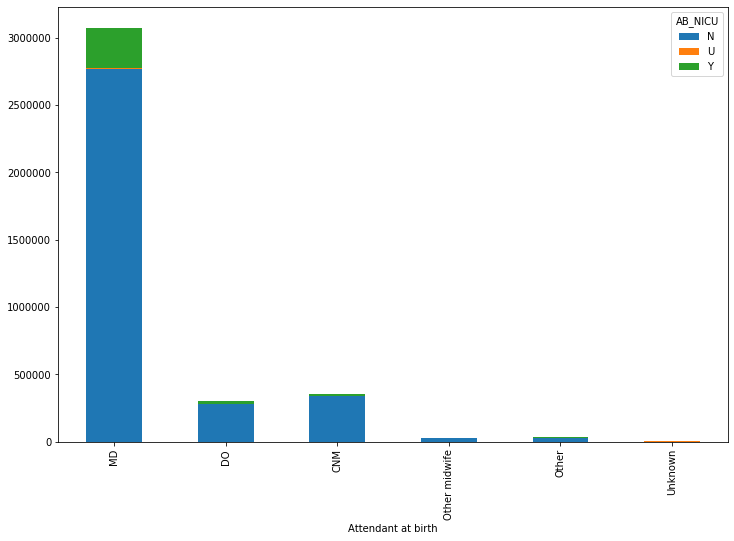

In [195]:
#Attendant at birth
plt.figure(figsize=(12,8))
ax = sns.countplot(x='ATTEND', data=CDC2018s)
plt.title("Attendant at birth")

label_text = ['MD','DO','CNM','Other midwife','Other','Unknown']
ax.set_xticklabels(label_text, fontsize=10)
plt.xlabel('Attendant at birth')

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['ATTEND'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)
plt.xlabel('Attendant at birth')

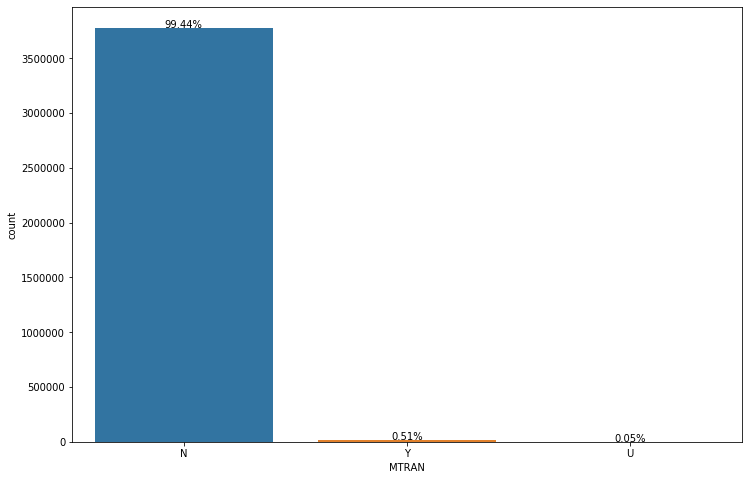

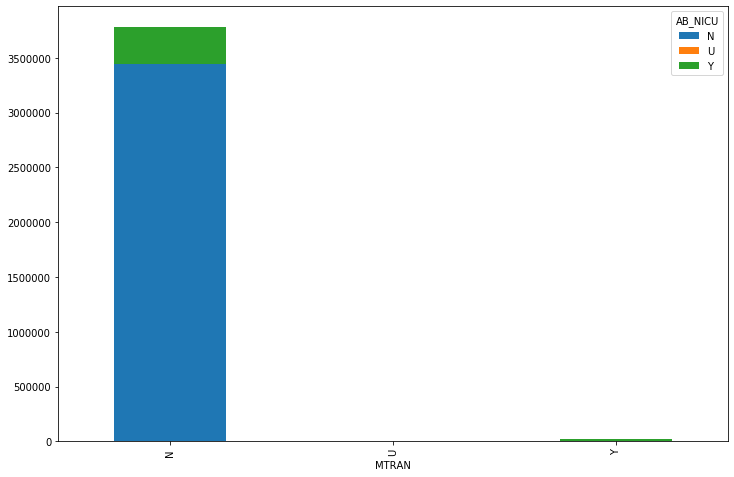

In [196]:
#Mother transferred
plt.figure(figsize=(12,8))
ax = sns.countplot(x='MTRAN', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['MTRAN'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

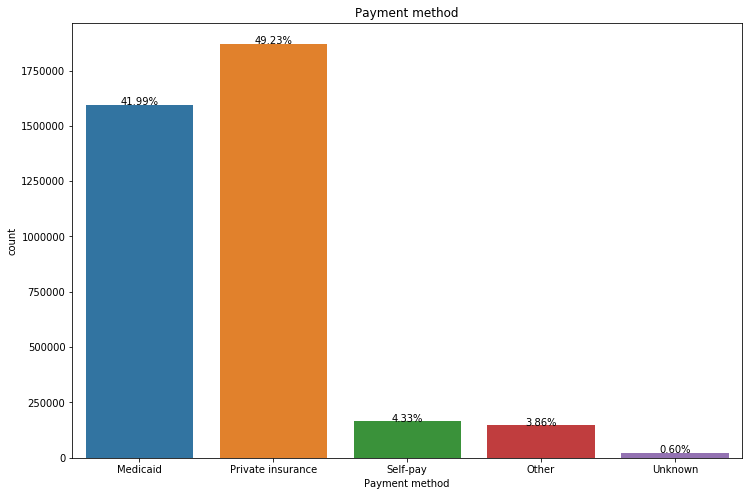

Text(0.5, 0, 'Payment method')

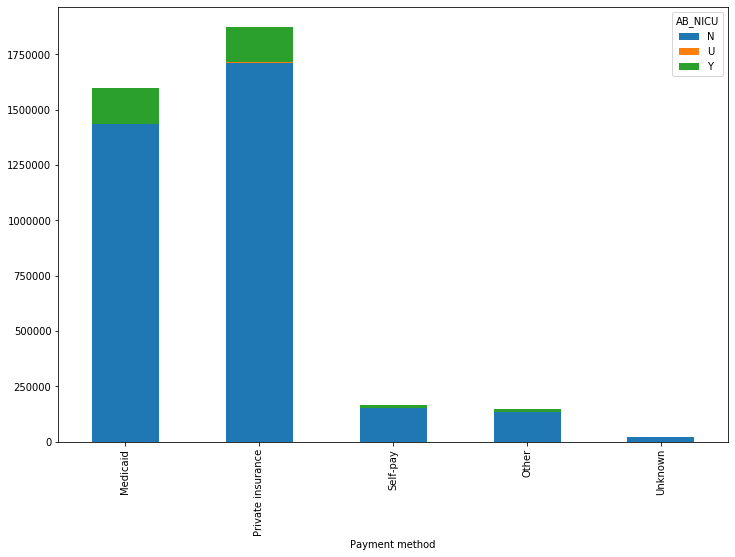

In [197]:
#Payment source for delivery
plt.figure(figsize=(12,8))
ax = sns.countplot(x='PAY_REC', data=CDC2018s)
plt.title("Payment method")

label_text = ['Medicaid','Private insurance','Self-pay','Other','Unknown']
ax.set_xticklabels(label_text, fontsize=10)
plt.xlabel('Payment method')

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['PAY_REC'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)
plt.xlabel('Payment method')

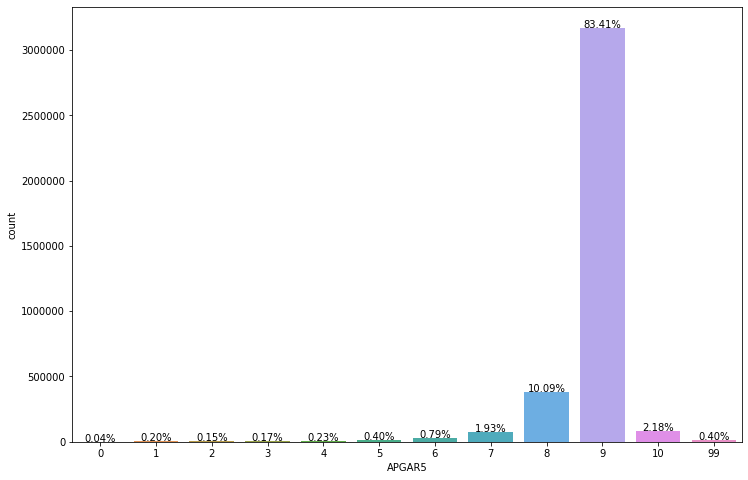

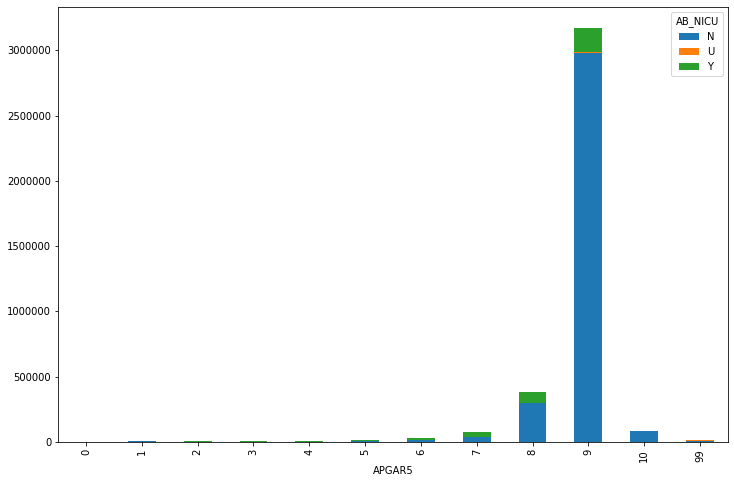

In [201]:
#APGAR score - 5 minutes
plt.figure(figsize=(12,8))
ax = sns.countplot(x='APGAR5', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['APGAR5'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

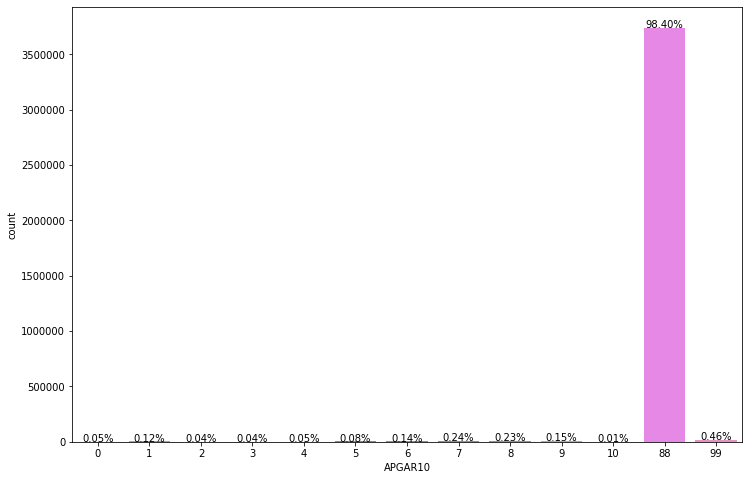

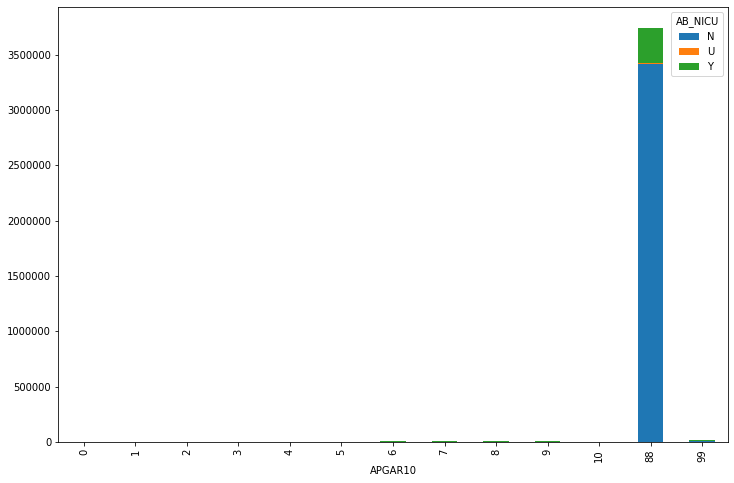

In [200]:
#APGAR score - 10 minutes
plt.figure(figsize=(12,8))
ax = sns.countplot(x='APGAR10', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['APGAR10'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

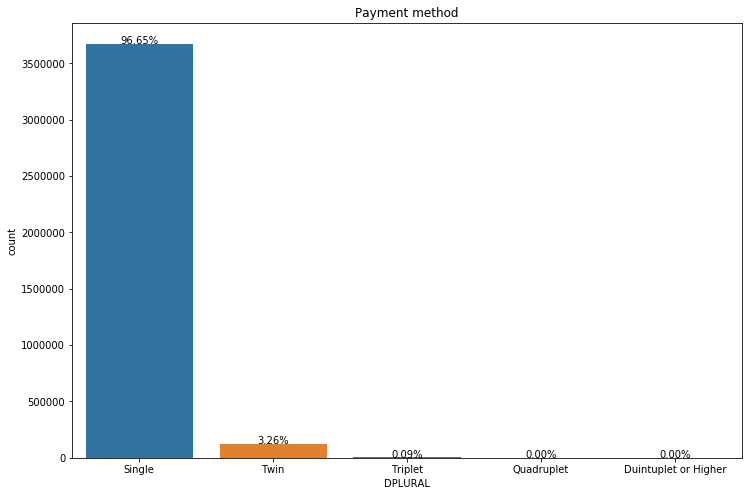

[Text(0, 0, 'Single'),
 Text(0, 0, 'Twin'),
 Text(0, 0, 'Triplet'),
 Text(0, 0, 'Quadruplet'),
 Text(0, 0, 'Duintuplet or Higher')]

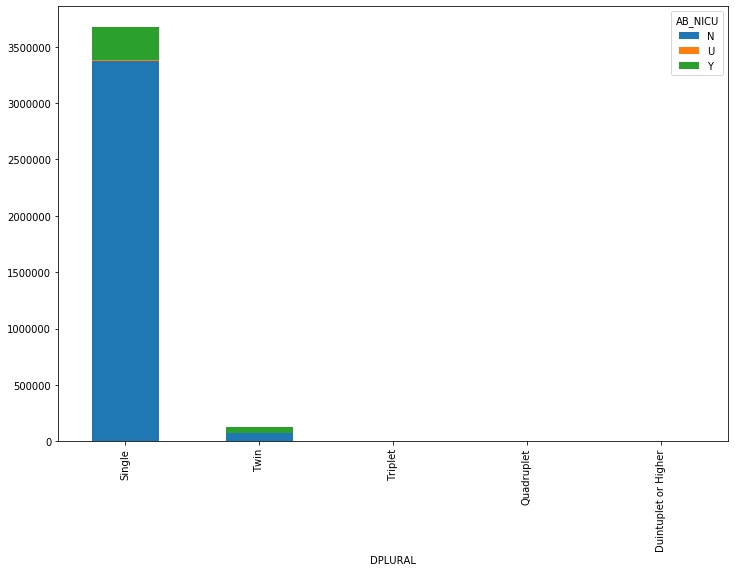

In [202]:
#Plurality
plt.figure(figsize=(12,8))
ax = sns.countplot(x='DPLURAL', data=CDC2018s)
plt.title("Payment method")

label_text = ['Single','Twin','Triplet','Quadruplet','Duintuplet or Higher']
ax.set_xticklabels(label_text, fontsize=10)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['DPLURAL'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)

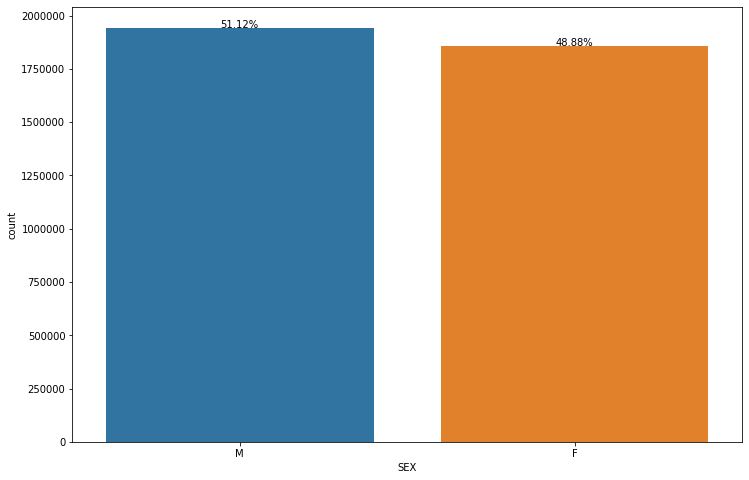

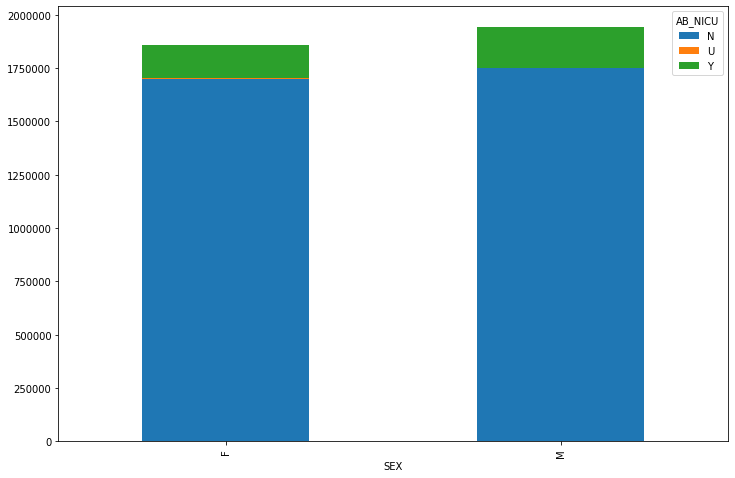

In [203]:
#Sex of the baby
plt.figure(figsize=(12,8))
ax = sns.countplot(x='SEX', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['SEX'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

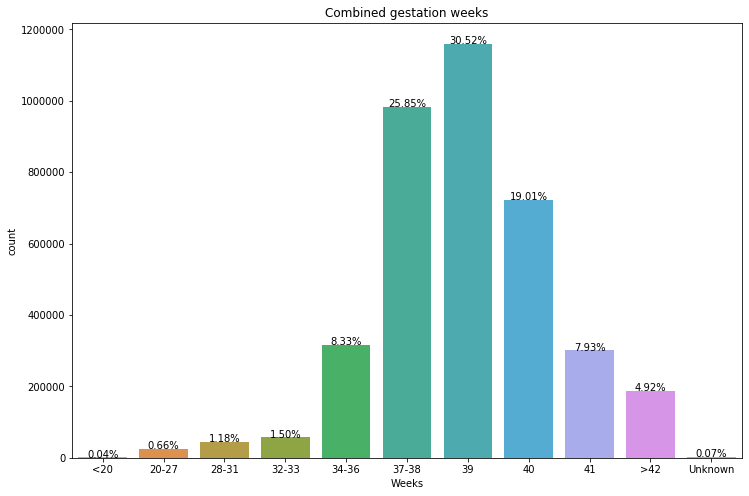

Text(0.5, 0, 'Weeks')

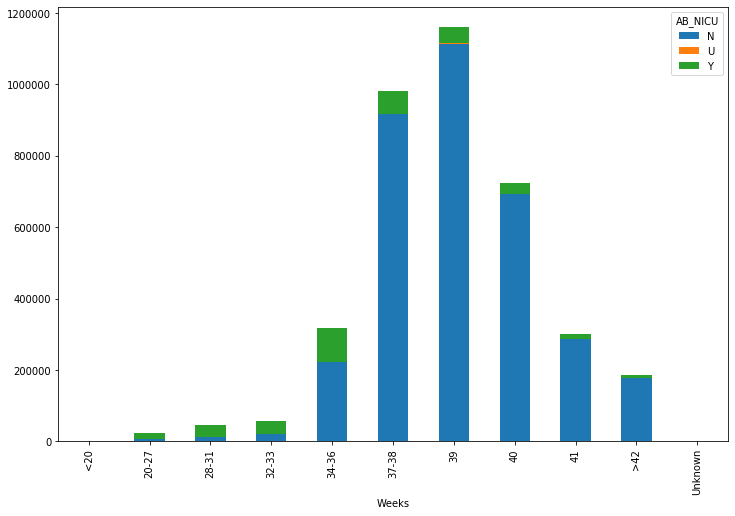

In [204]:
#Combined gestation weeks
plt.figure(figsize=(12,8))
ax = sns.countplot(x='GESTREC10', data=CDC2018s)
plt.title("Combined gestation weeks")

label_text = ['<20','20-27','28-31','32-33','34-36','37-38','39','40','41','>42','Unknown']
ax.set_xticklabels(label_text, fontsize=10)
plt.xlabel('Weeks')

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['GESTREC10'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)
plt.xlabel('Weeks')

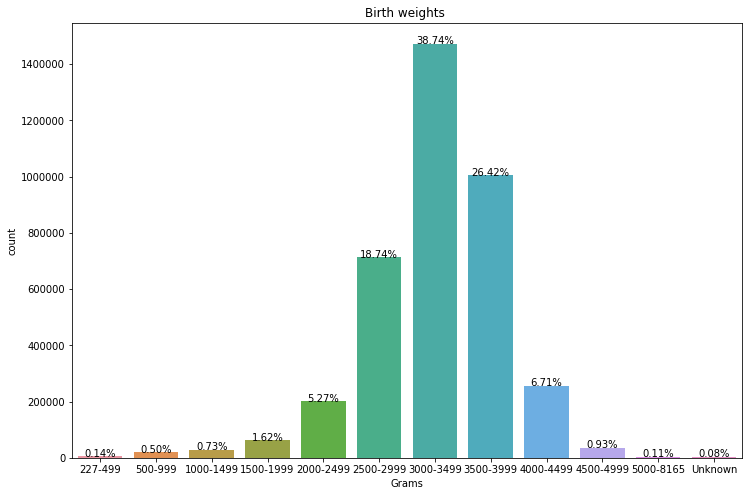

Text(0.5, 0, 'Grams')

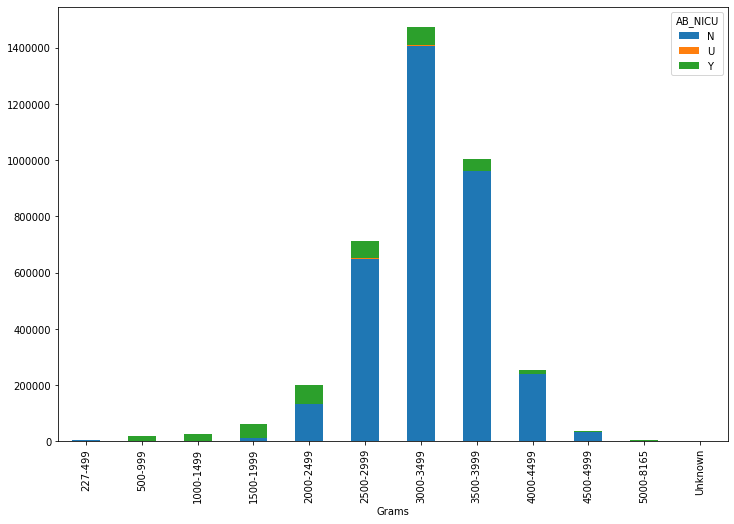

In [205]:
#Birth weights 
plt.figure(figsize=(12,8))
ax = sns.countplot(x='BWTR12', data=CDC2018s)
plt.title("Birth weights ")

label_text = ['227-499','500-999','1000-1499','1500-1999','2000-2499','2500-2999','3000-3499','3500-3999','4000-4499','4500-4999','5000-8165','Unknown','Unknown']
ax.set_xticklabels(label_text, fontsize=10)
plt.xlabel('Grams')

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['BWTR12'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True).set_xticklabels(label_text, fontsize=10)
plt.xlabel('Grams')

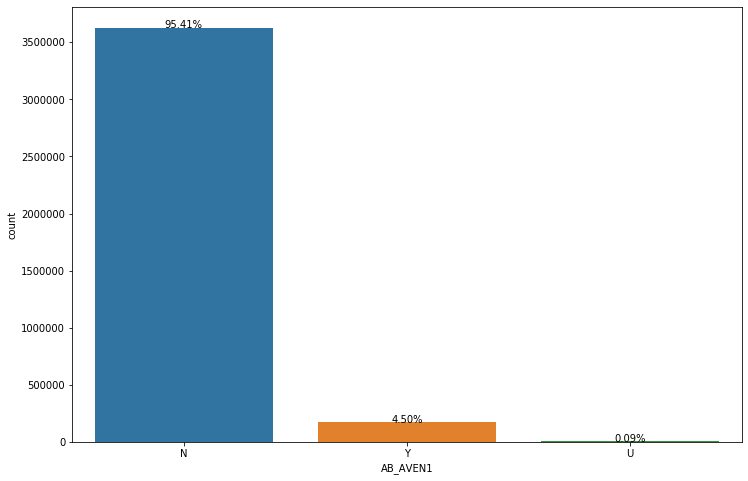

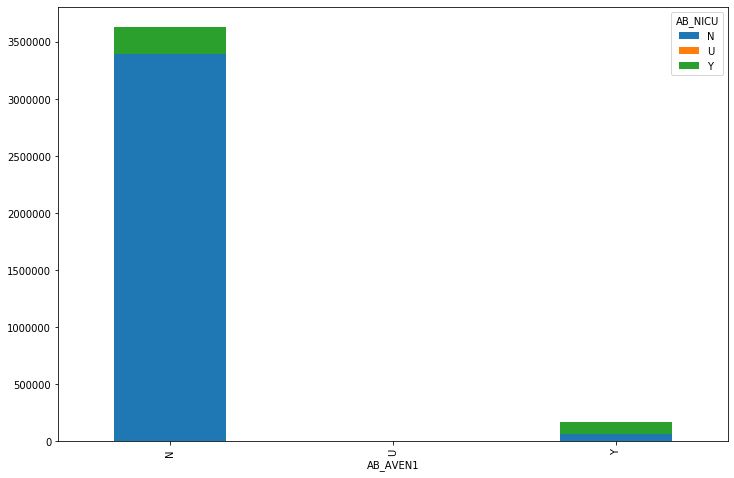

In [206]:
#Assisted ventilation
plt.figure(figsize=(12,8))
ax = sns.countplot(x='AB_AVEN1', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['AB_AVEN1'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

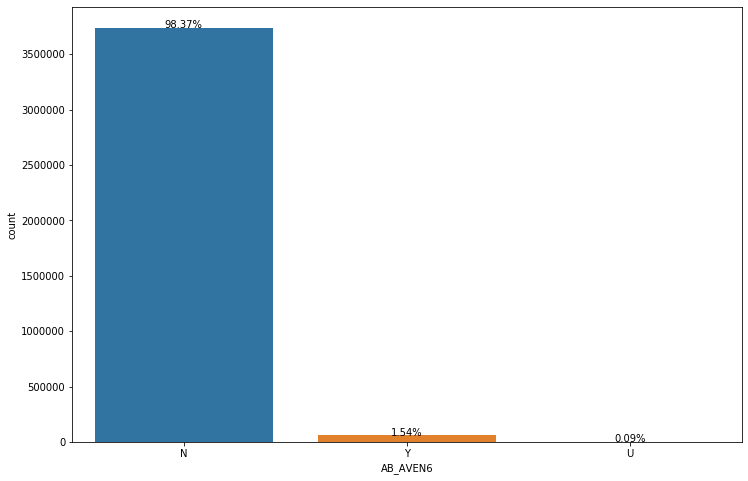

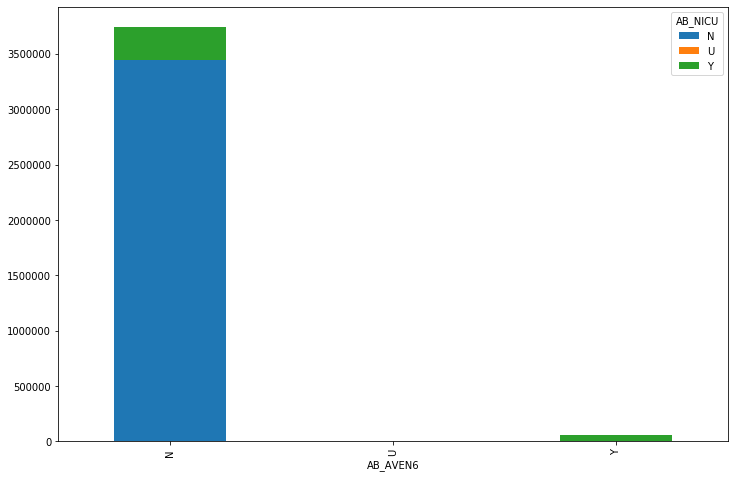

In [207]:
#Assisted ventilation > 6hrs
plt.figure(figsize=(12,8))
ax = sns.countplot(x='AB_AVEN6', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['AB_AVEN6'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

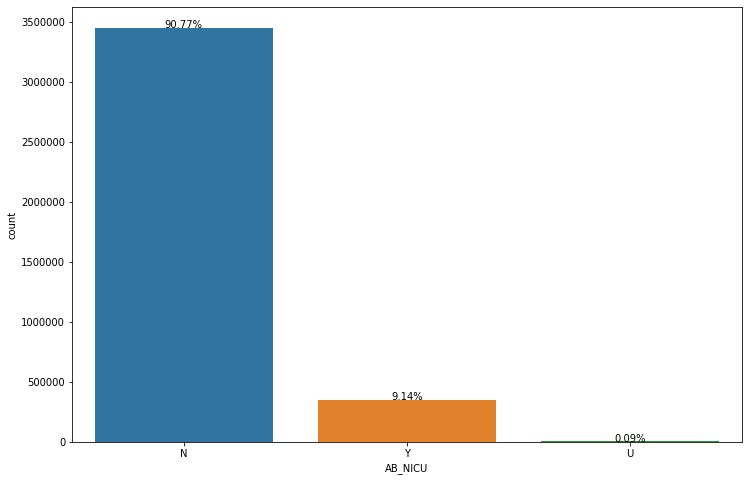

In [209]:
#Admission to NICU
plt.figure(figsize=(12,8))
ax = sns.countplot(x='AB_NICU', data=CDC2018s)
total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

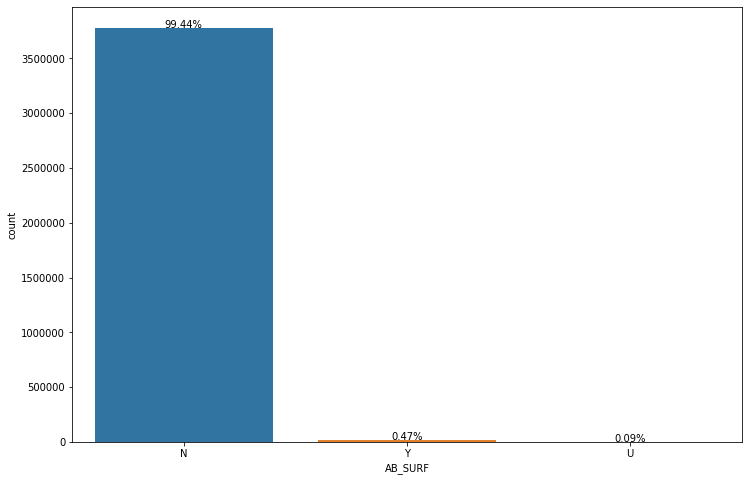

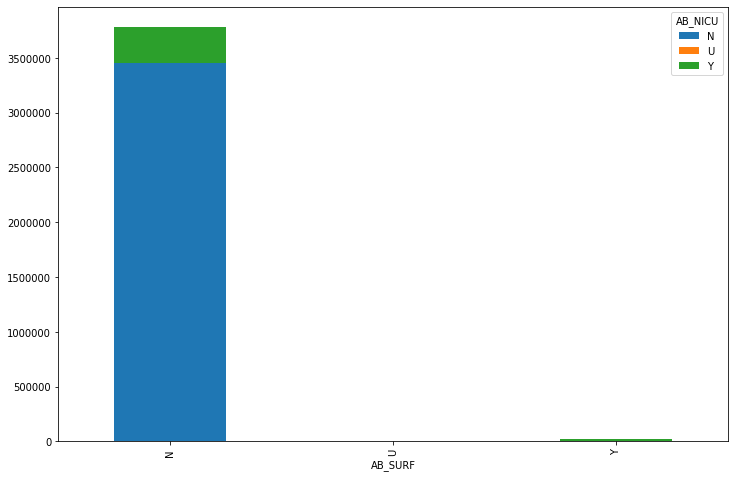

In [210]:
#Surfactant
plt.figure(figsize=(12,8))
ax = sns.countplot(x='AB_SURF', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['AB_SURF'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

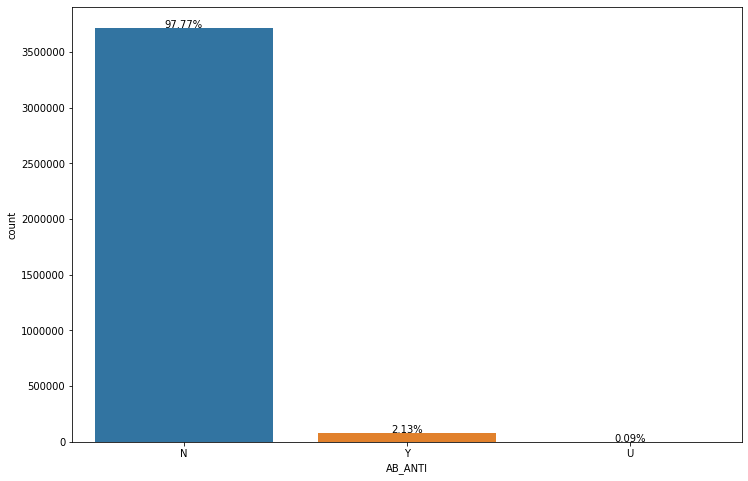

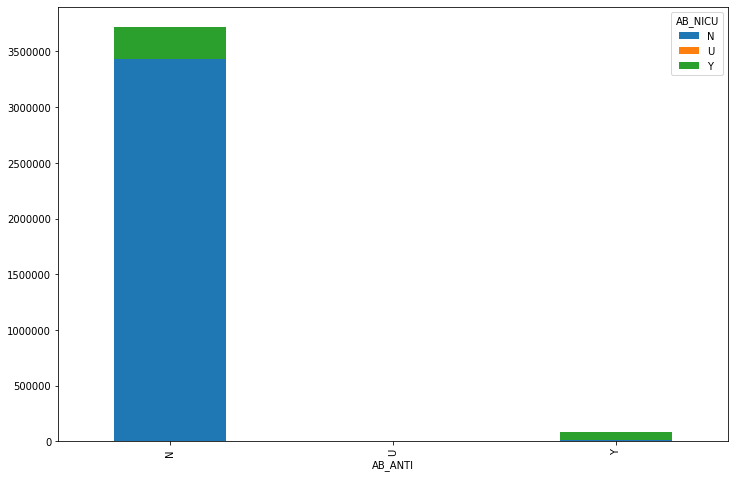

In [211]:
#Antibiotics for new born
plt.figure(figsize=(12,8))
ax = sns.countplot(x='AB_ANTI', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['AB_ANTI'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

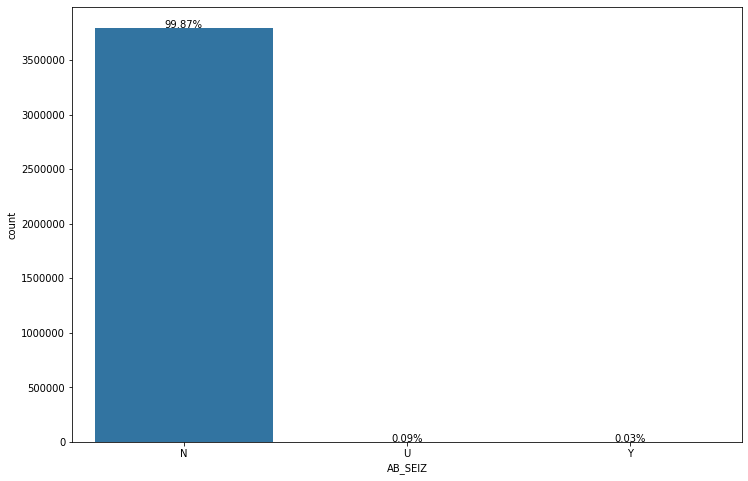

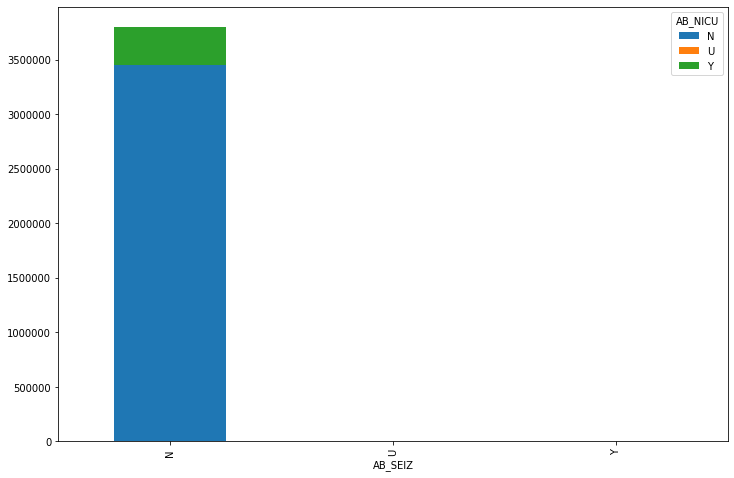

In [212]:
#seizures
plt.figure(figsize=(12,8))
ax = sns.countplot(x='AB_SEIZ', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['AB_SEIZ'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

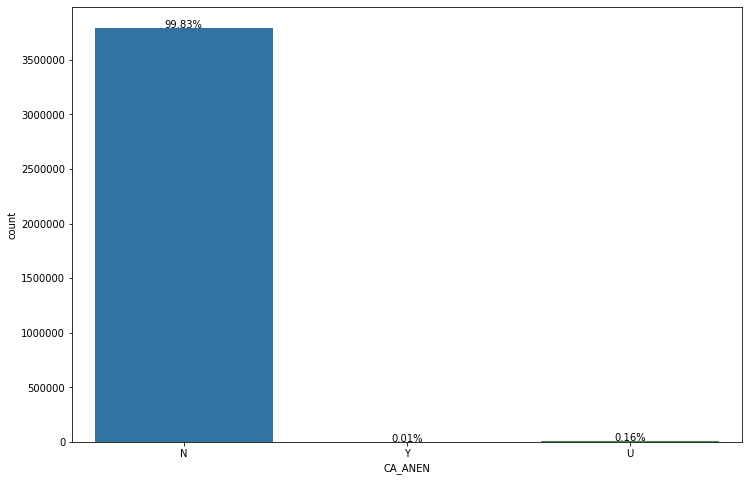

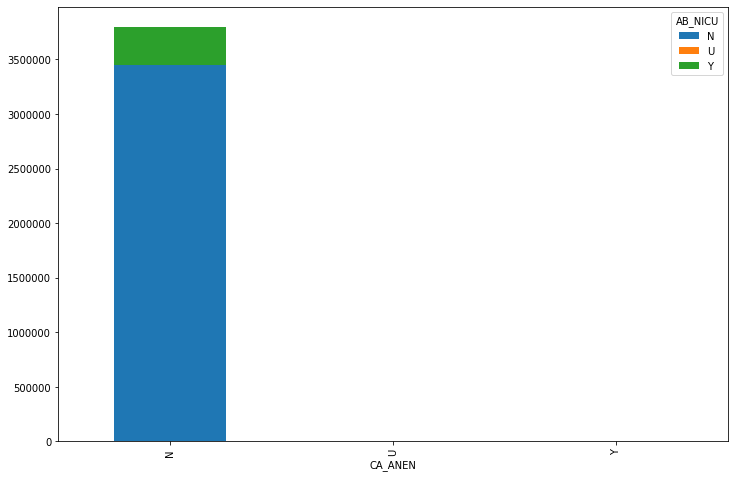

In [213]:
#anencephaly
plt.figure(figsize=(12,8))
ax = sns.countplot(x='CA_ANEN', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['CA_ANEN'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

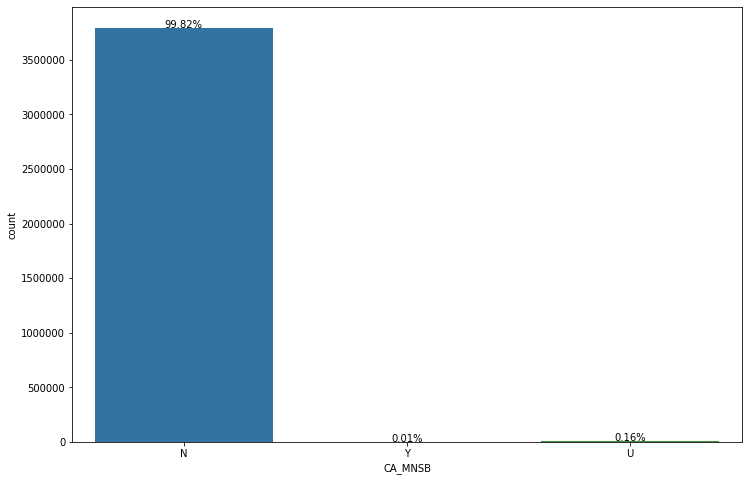

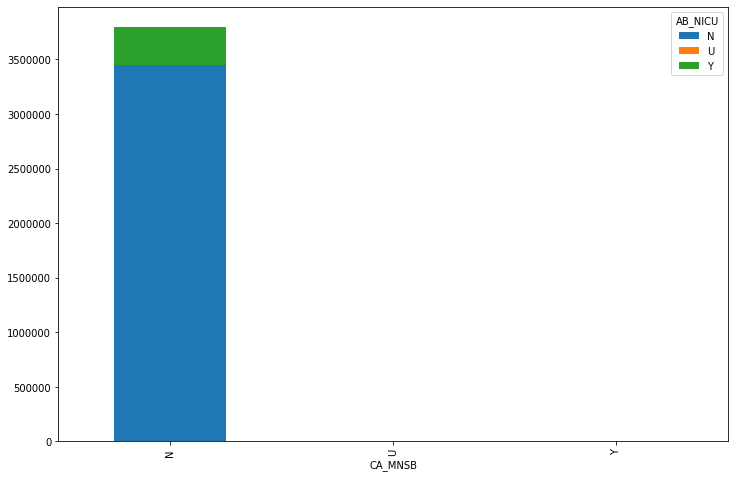

In [214]:
#meningomyelocele / spina bifida
plt.figure(figsize=(12,8))
ax = sns.countplot(x='CA_MNSB', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['CA_MNSB'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

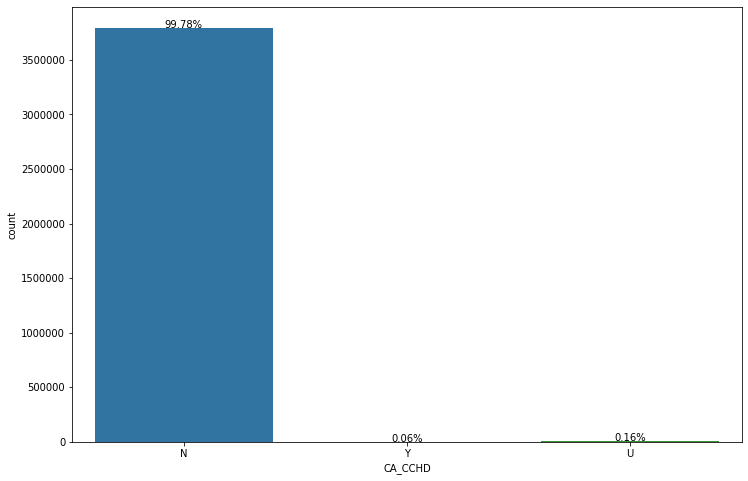

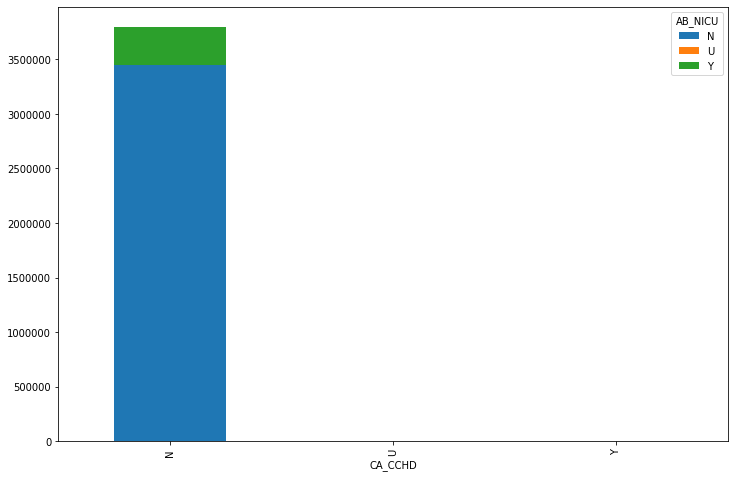

In [215]:
#cyanotic congenital heart disease
plt.figure(figsize=(12,8))
ax = sns.countplot(x='CA_CCHD', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['CA_CCHD'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

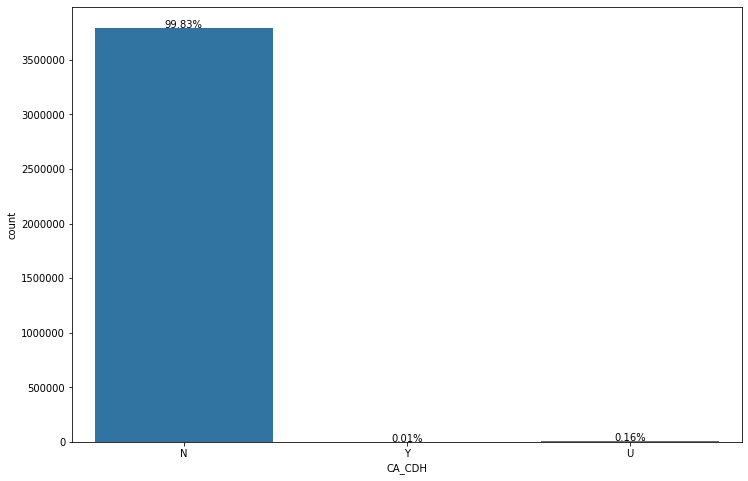

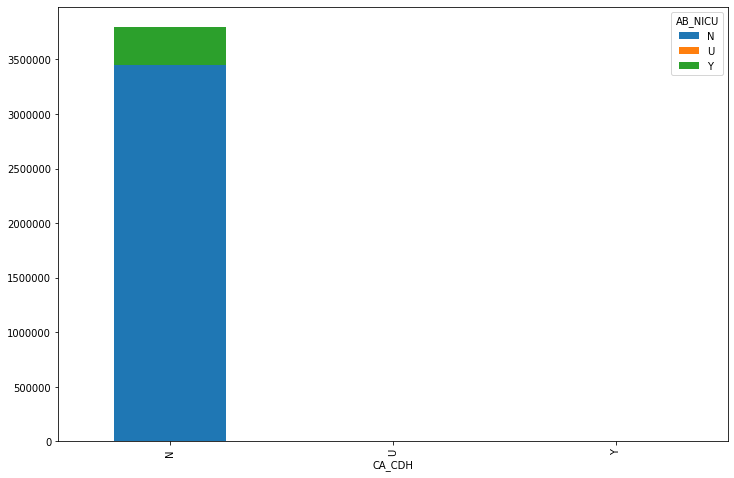

In [216]:
#congenital diaphragmatic hernia
plt.figure(figsize=(12,8))
ax = sns.countplot(x='CA_CDH', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['CA_CDH'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

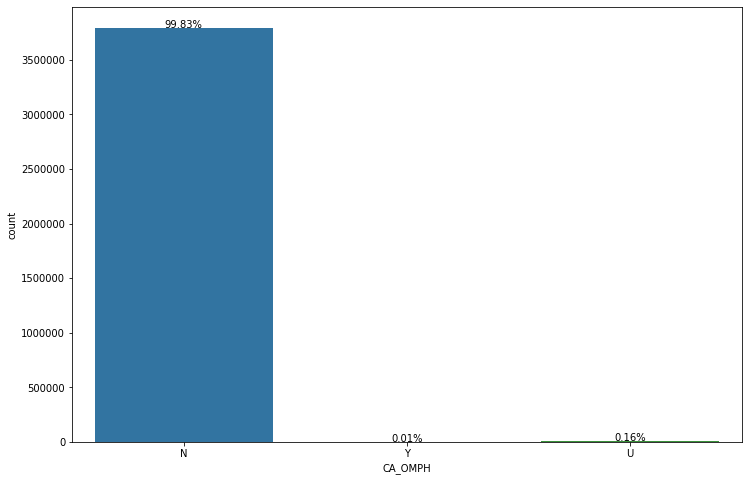

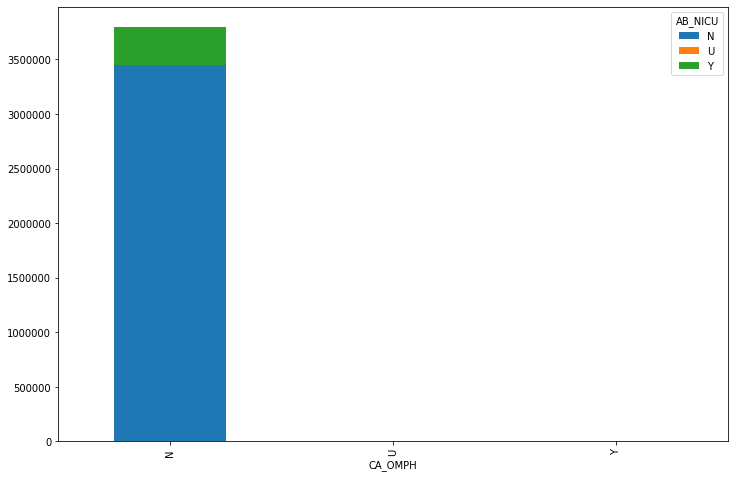

In [217]:
#omphaloccele
plt.figure(figsize=(12,8))
ax = sns.countplot(x='CA_OMPH', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['CA_OMPH'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

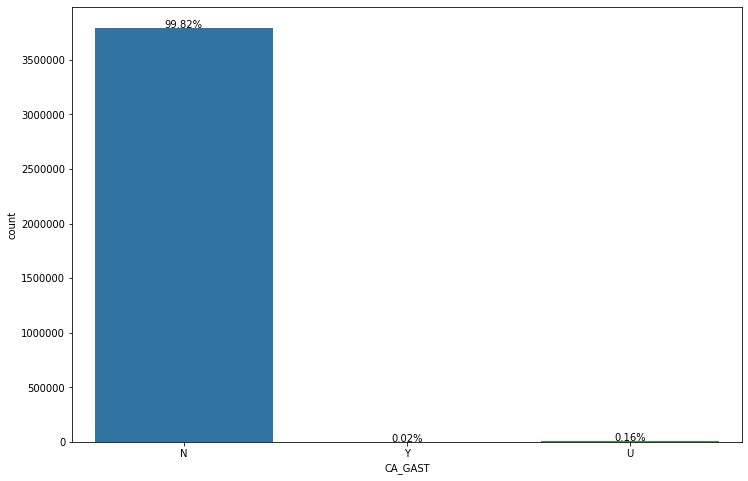

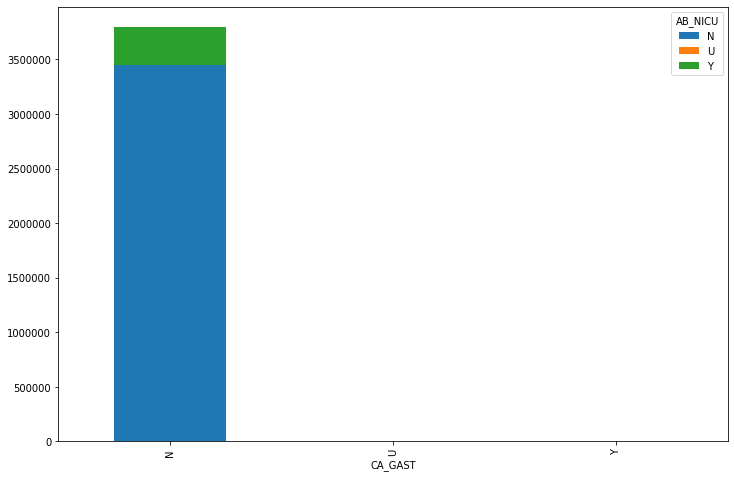

In [218]:
#gastroschisis
plt.figure(figsize=(12,8))
ax = sns.countplot(x='CA_GAST', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['CA_GAST'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

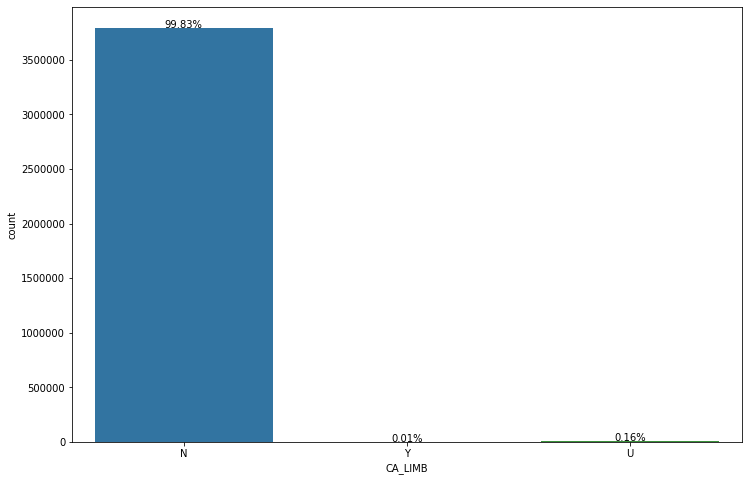

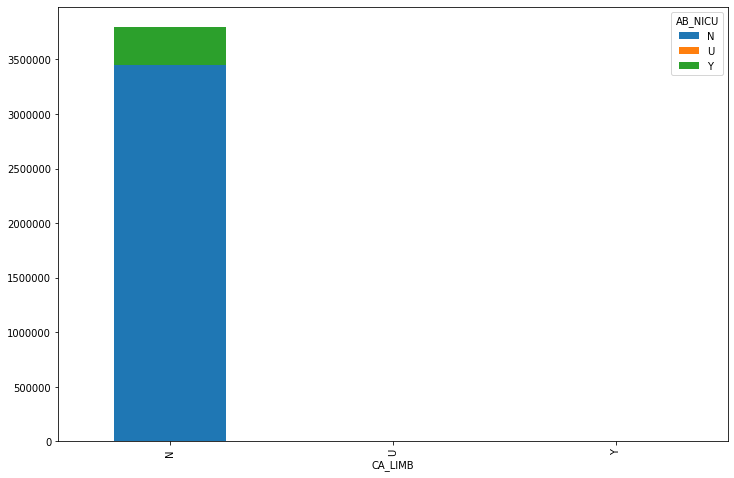

In [219]:
#Limbd reduction defect
plt.figure(figsize=(12,8))
ax = sns.countplot(x='CA_LIMB', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['CA_LIMB'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

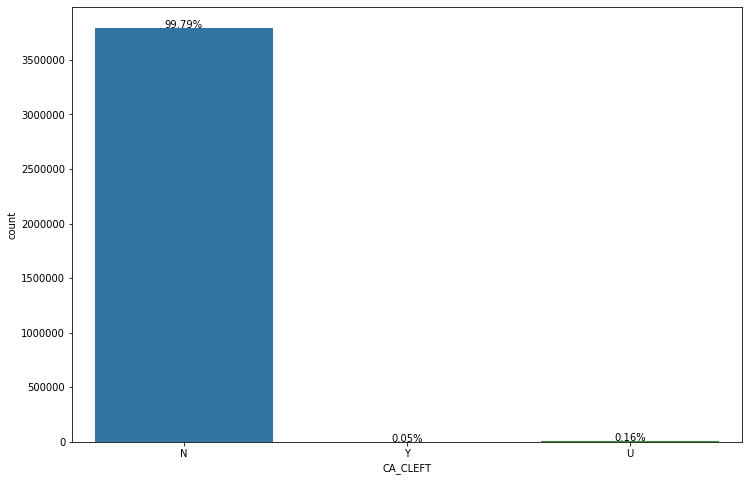

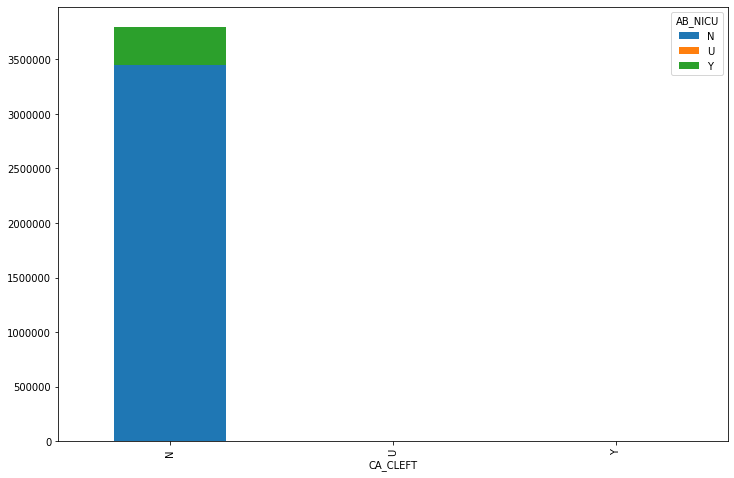

In [220]:
#cleft lip with or without cleft palate
plt.figure(figsize=(12,8))
ax = sns.countplot(x='CA_CLEFT', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['CA_CLEFT'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

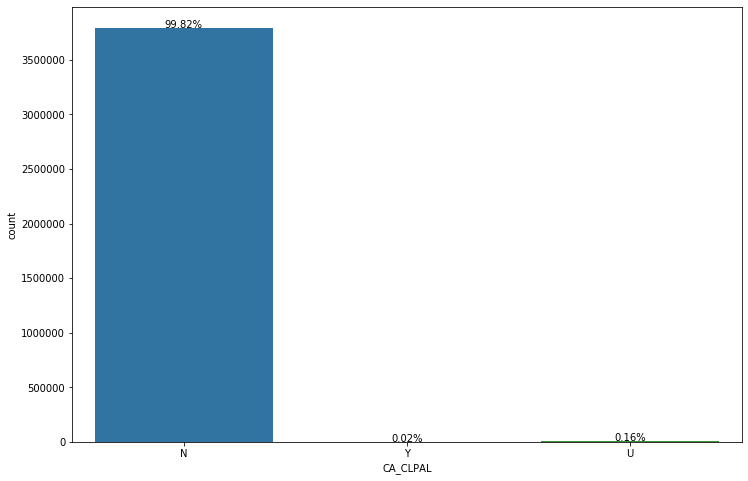

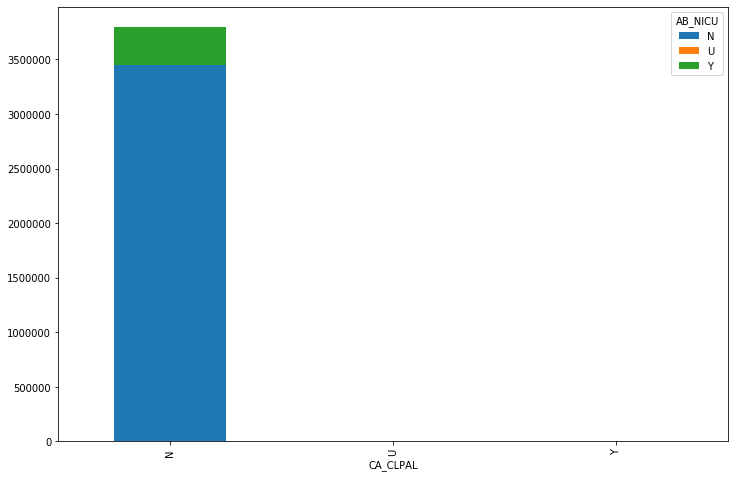

In [221]:
#cleft palate alone
plt.figure(figsize=(12,8))
ax = sns.countplot(x='CA_CLPAL', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['CA_CLPAL'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

In [224]:
CDC2018s.CA_DOWN.value_counts()

N    3793319
U       6107
P       1187
C        921
Name: CA_DOWN, dtype: int64

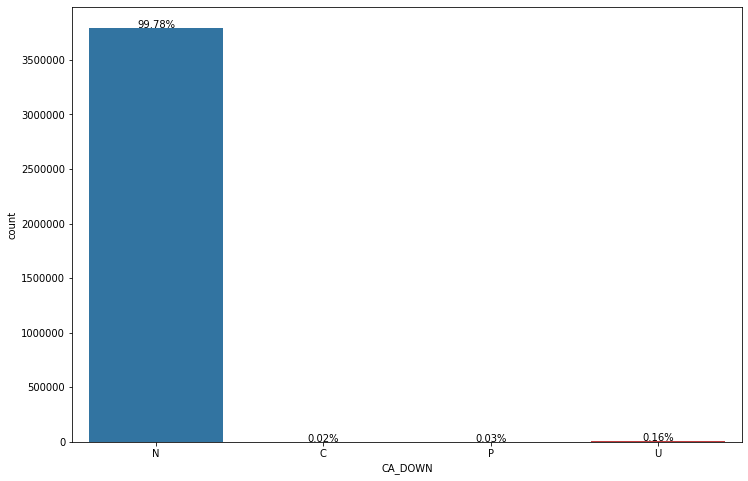

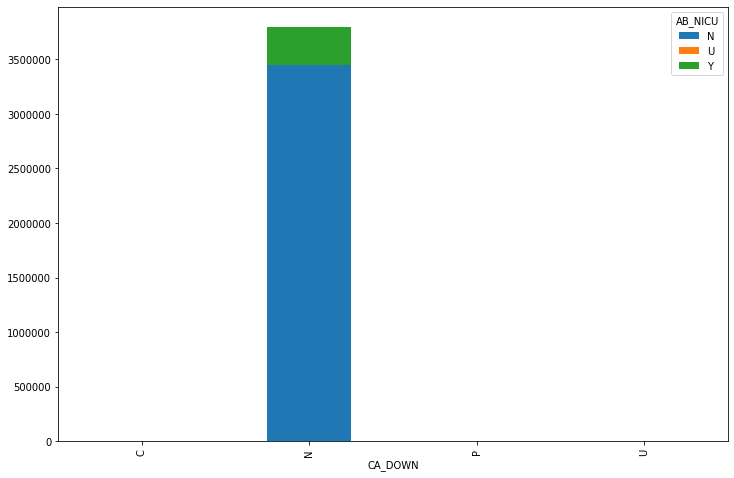

In [225]:
#Down syndrome
plt.figure(figsize=(12,8))
ax = sns.countplot(x='CA_DOWN', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['CA_DOWN'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

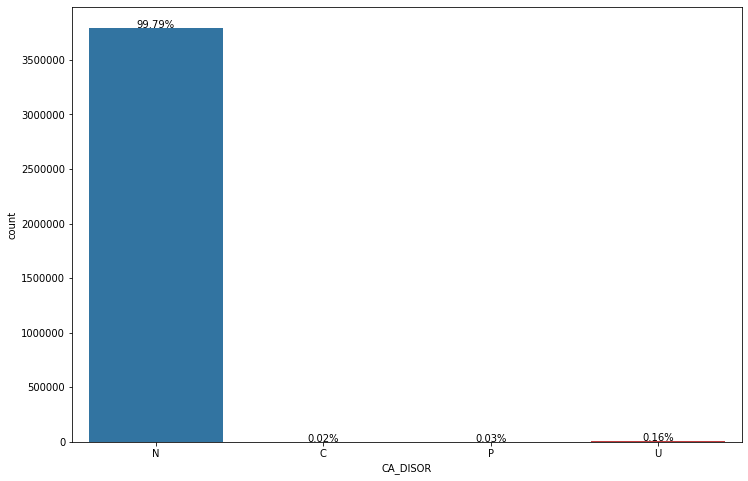

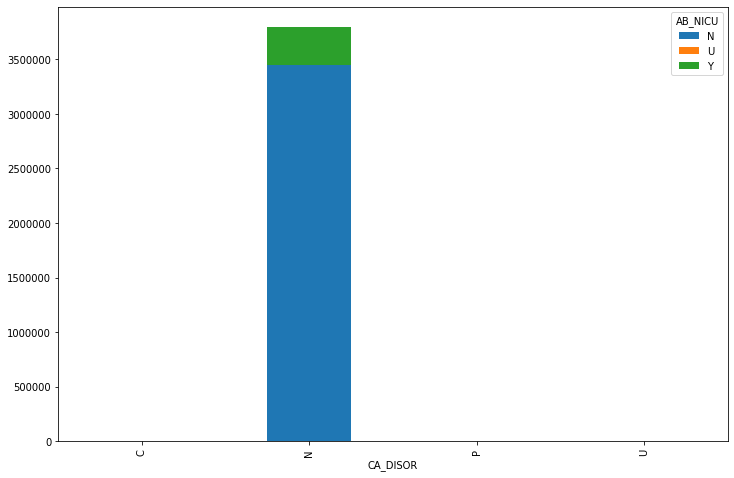

In [226]:
#Suspected chromosomal disorder
plt.figure(figsize=(12,8))
ax = sns.countplot(x='CA_DISOR', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['CA_DISOR'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

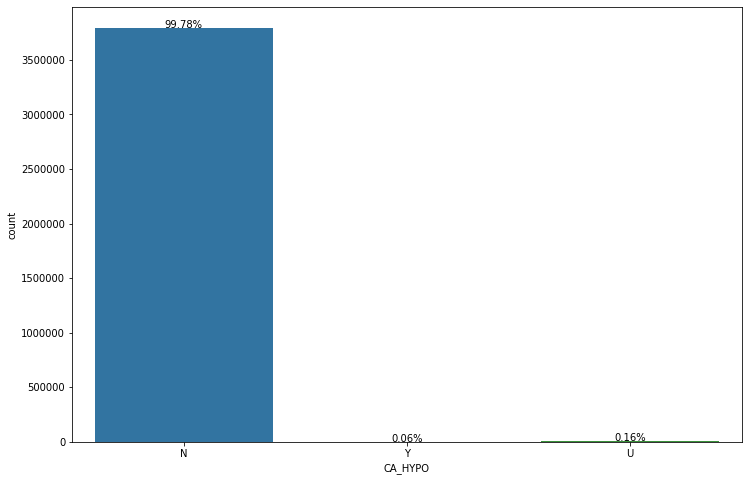

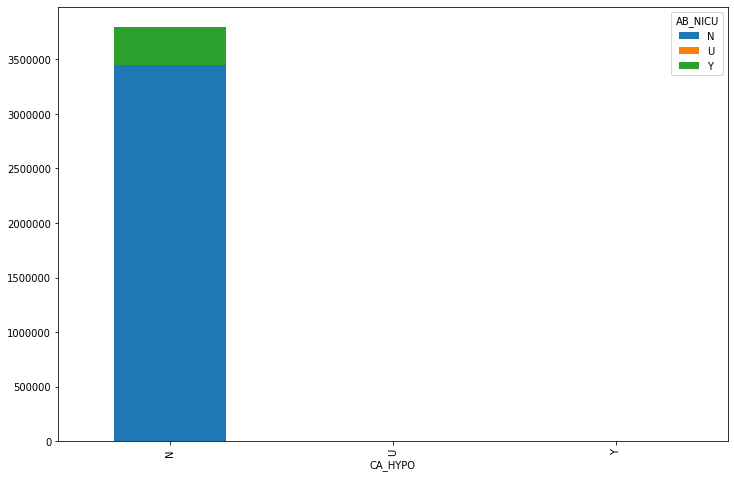

In [227]:
#Hypospadias
plt.figure(figsize=(12,8))
ax = sns.countplot(x='CA_HYPO', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['CA_HYPO'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

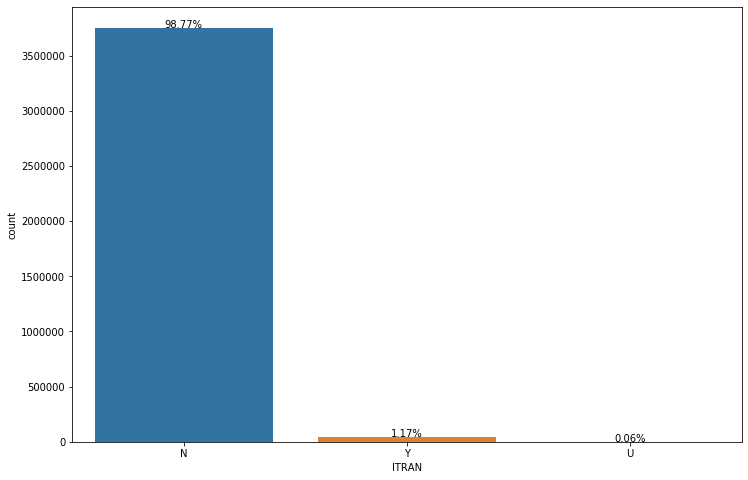

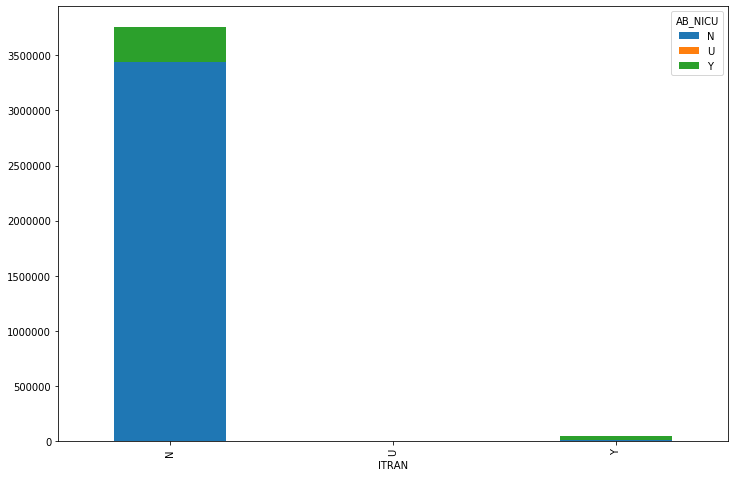

In [228]:
#Infant transferred
plt.figure(figsize=(12,8))
ax = sns.countplot(x='ITRAN', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['ITRAN'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

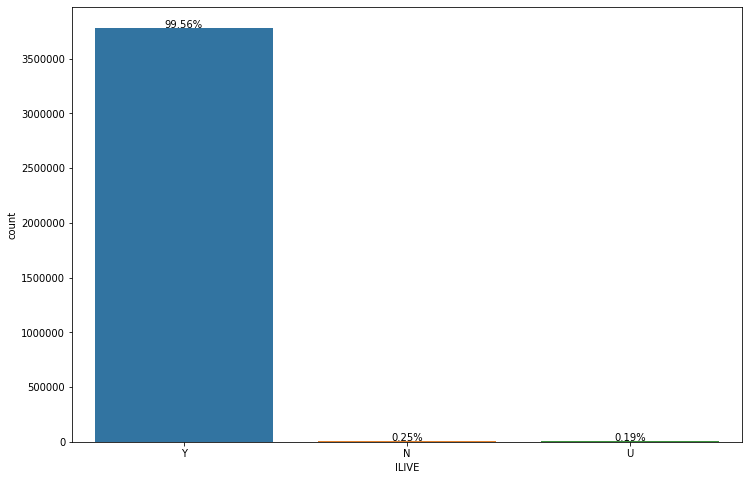

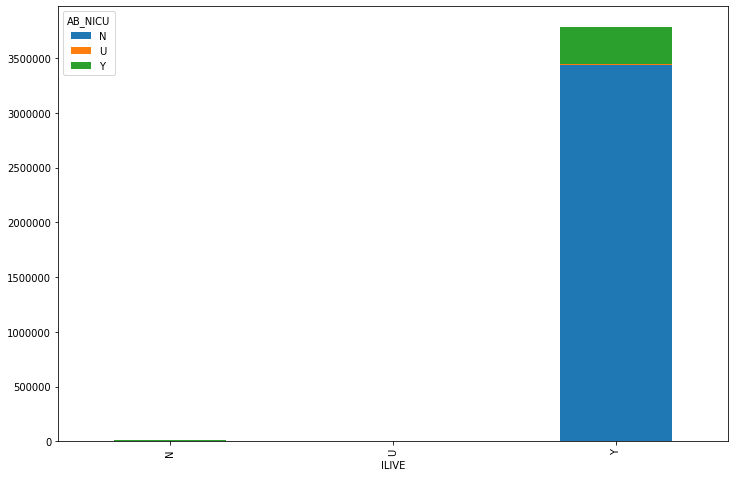

In [229]:
#Infant living at time of report
plt.figure(figsize=(12,8))
ax = sns.countplot(x='ILIVE', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['ILIVE'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)

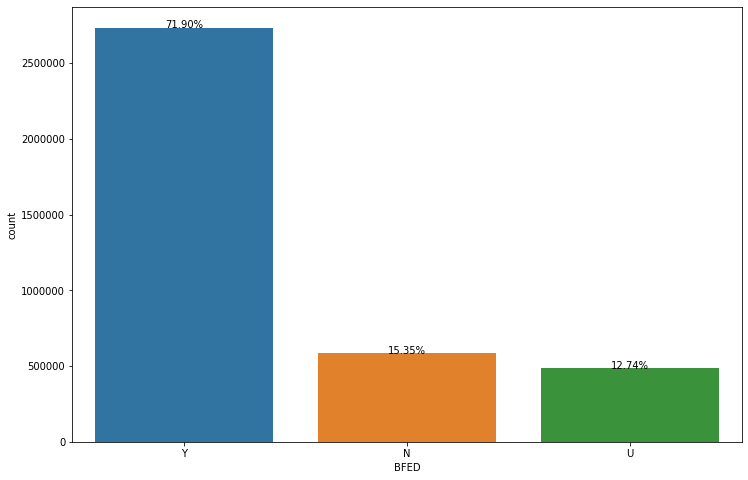

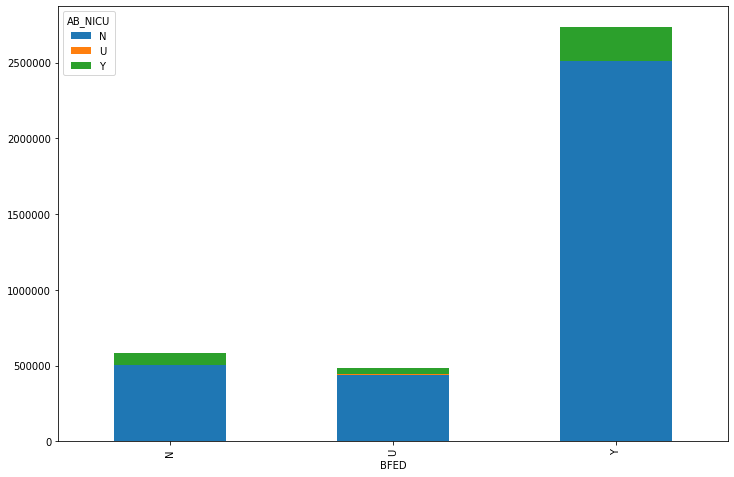

In [230]:
#Infant breastfed at discharge
plt.figure(figsize=(12,8))
ax = sns.countplot(x='BFED', data=CDC2018s)

total = float(len(CDC2018s))
                   
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
show()

MRACEHISP_NICU = pd.crosstab(index=CDC2018s['BFED'],columns=CDC2018s['AB_NICU'])
MRACEHISP_NICU.plot(kind='bar',figsize=(12,8),stacked=True)